# FEAMP20 16S rRNA analysis - Barosa et al. 2024

## Loading required packages and setting up plot preferences and ggplot theme for the Giovannelli Lab

In [3]:
library(tidyverse)
library(ape)
#library(DECIPHER)
library(microbiome)
library(ggpubr)
library(vegan)
#library(repr)
library(ggpmisc) #to use stat_poly_eq
library(gridExtra) # gridding plots
library(viridis)
library(ggrepel)
library(phyloseq)
#library(wesanderson) #new palettes http://www.sthda.com/english/wiki/ggplot2-colors-how-to-change-colors-automatically-and-manually
#library(rioja) # plotting poackages for tabular bubbleplots
#library(reshape2) 
library(gghighlight) # manipulating abundance colors in plots to have gary grouping of low abundance taxa
library(plyr)
library(dplyr)
library(ggh4x)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform



Attaching package: ‘ggpubr’




In [4]:
options(repr.plot.width=12, repr.plot.height=8)

In [6]:
set.seed(10000)

In [5]:
theme_glab <- function(base_size = 20,
                    base_family = "",
                    base_line_size = base_size / 180,
                    base_rect_size = base_size / 180) {
   
    font <- "Helvetica" #assign font family up front
   
    theme_bw(base_size = base_size,
                base_family = base_family,
                base_line_size = base_line_size) %+replace%
    theme(
        legend.background =  element_blank(),
        legend.title =       element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65),
                                         hjust = 0),
        legend.text =        element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65)),
        legend.key.size =    unit(0.8, "lines"),
     
      plot.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        hjust = 0),
       
      axis.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
      axis.text = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
       
      plot.caption = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.7),
        hjust = 1),
       
      panel.grid.major = element_blank(),  
      panel.grid.minor = element_blank(),  
      panel.border = element_rect(fill = NA, colour = rgb(100, 100, 100, maxColorValue = 255)),

     
      complete = TRUE
    )
}

## Starting the microbial analysis 

In [27]:
# loading the environmental dataset
feamp20_df<-read.csv("FEAMP20_Environmental_dataset.csv",header=T, sep=",",row.names=1)
feamp20_df

code   location       type     region                    lat     
4     BC     Gulf of Naples biofilm  Somma-Vesuvius            40.68858
15    BC     Gulf of Naples fluid    Somma-Vesuvius            40.68858
A     BC     Gulf of Naples sediment Somma-Vesuvius            40.68858
16    CM1    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955
1     CM1    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955
7     CM2    Gulf of Naples biofilm  Campi Flegrei Caldera rim 40.77955
13    CM2    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955
11    CM2    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955
17    GB     Gulf of Naples fluid    Campi Flegrei Caldera     40.82375
F     GB     Gulf of Naples sediment Campi Flegrei Caldera     40.82375
blk   NA     NA             NA       NA                              NA
blk-C NA     NA             NA       NA                              NA
blk1  NA     NA             NA       NA                              NA
18    SF_EF2 Gulf of Naples fluid    Campi Flegrei Caldera     40.82306
10    SF_EF2 Gulf of Naples sediment Campi Flegrei Caldera     40.82306
3     SF_G1  Gulf of Naples biofilm  Campi Flegrei Caldera     40.82306
14    SF_G1  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306
12    SF_G2  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306
9     SF_G2  Gulf of Naples sediment Campi Flegrei Caldera     40.82306
5     SF_G2A Gulf of Naples biofilm  Campi Flegrei Caldera     40.82306
6     SF_G2B Gulf of Naples biofilm  Campi Flegrei Caldera     40.82306
      long     depth temp psu   do   ⋯ Mg      Ca     Mn       Fe       
4     14.45475  0.2  26.4 17.65 53.7 ⋯      NA     NA       NA        NA
15    14.45475  0.2  26.4 17.65 53.7 ⋯  650.57 497.79 0.047346  0.097862
A     14.45475  0.2  26.4 17.65 53.7 ⋯  650.57 497.79 0.047346  0.097862
16    14.08835  7.0  26.3 27.54 55.0 ⋯ 1125.29 590.81 0.061217  0.113124
1     14.08835  7.0  26.3 27.54 55.0 ⋯ 1125.29 590.81 0.061217  0.113124
7     14.08835  8.3  27.0 38.37 92.0 ⋯      NA     NA       NA        NA
13    14.08835  8.3  27.0 38.37 92.0 ⋯ 1174.52 557.06 0.003700  0.011037
11    14.08835  8.3  27.0 38.37 92.0 ⋯ 1174.52 557.06 0.003700  0.011037
17    14.07890  5.4  28.0 35.41 43.0 ⋯ 1372.12 443.86 3.099014 11.123430
F     14.07890  5.4  28.0 35.41 43.0 ⋯ 1372.12 443.86 3.099014 11.123430
blk         NA   NA    NA    NA   NA ⋯      NA     NA       NA        NA
blk-C       NA   NA    NA    NA   NA ⋯      NA     NA       NA        NA
blk1        NA   NA    NA    NA   NA ⋯      NA     NA       NA        NA
18    14.08750 10.0  34.0 26.50 75.0 ⋯  865.24 450.90 0.007141  0.033976
10    14.08750 10.0  34.0 26.50 75.0 ⋯  865.24 450.90 0.007141  0.033976
3     14.08750 13.3  71.0 34.06 50.8 ⋯      NA     NA       NA        NA
14    14.08750 13.3  71.0 34.06 50.8 ⋯ 1218.43 481.86 1.183603  3.590772
12    14.08750 12.9  68.9 34.50 51.8 ⋯ 1774.17 565.06 1.131211  3.361098
9     14.08750 12.9  68.9 34.50 51.8 ⋯ 1774.17 565.06 1.131211  3.361098
5     14.08750 12.9  68.9 34.50 51.8 ⋯      NA     NA       NA        NA
6     14.08750 12.9  68.9 34.50 51.8 ⋯      NA     NA       NA        NA
      Zn       As       Rb       Sr        Mo       Cs      
4           NA       NA       NA        NA       NA       NA
15    0.193533 0.011163 0.120608  8.110929 0.000000 0.006474
A     0.193533 0.011163 0.120608  8.110929 0.000000 0.006474
16    0.456657 0.021972 0.157602 11.402800 0.010804 0.002033
1     0.456657 0.021972 0.157602 11.402800 0.010804 0.002033
7           NA       NA       NA        NA       NA       NA
13    0.033080 0.020202 0.147709 10.231950 0.011593 0.005425
11    0.033080 0.020202 0.147709 10.231950 0.011593 0.005425
17    0.170947 0.512667 3.237141 11.487620 0.000985 0.170143
F     0.170947 0.512667 3.237141 11.487620 0.000985 0.170143
blk         NA       NA       NA        NA       NA       NA
blk-C       NA       NA       NA        NA       NA       NA
blk1        NA       NA

In [28]:
#loading the different object from the dada2 analysis
seqtab_nochim<-readRDS("seqtab_nochim.rds")
taxa<-readRDS("taxa.rds")
tree<-read_tree("tree")

In [29]:
seqtab_nochim <- seqtab_nochim[c("blk-C","1","16","11","13","7","17","F","10","18","14","3","12","9","5","6","4","15","A"),] 

In [30]:
prok_data_raw<-phyloseq(otu_table(seqtab_nochim, taxa_are_rows = F),
                      tax_table(taxa), sample_data(feamp20_df),
                       phy_tree(tree))
prok_data_raw
message("Total number of reads")
sum(readcount(prok_data_raw))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4881 taxa and 19 samples ]
sample_data() Sample Data:       [ 19 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4881 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4881 tips and 4879 internal nodes ]

Total number of reads



[1] 187798

In [31]:
prok_data_raw

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4881 taxa and 19 samples ]
sample_data() Sample Data:       [ 19 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4881 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4881 tips and 4879 internal nodes ]

In [32]:
# Define a function to remove negative controls
prune_negatives = function(physeq, negs, samps) {
  negs.n1 = prune_taxa(taxa_sums(negs)>=1, negs)
  samps.n1 = prune_taxa(taxa_sums(samps)>=1, samps)
  allTaxa <- names(sort(taxa_sums(physeq),TRUE))
  negtaxa <- names(sort(taxa_sums(negs.n1),TRUE))
  taxa.noneg <- allTaxa[!(allTaxa %in% negtaxa)]
  return(prune_taxa(taxa.noneg,samps.n1))
}

In [33]:
# Removing the ASV found in the negative controls from all the samples¶
blanks = subset_samples(prok_data_raw, sample_names(prok_data_raw) == "blk-C")
samples = subset_samples(prok_data_raw, sample_names(prok_data_raw) != "blk-C")
prok_data = prune_negatives(prok_data_raw,blanks,samples)

In [34]:
# Check the stats after removing the blanks
prok_data
sum(readcount(prok_data))
(sum(readcount(prok_data))/sum(readcount(prok_data_raw)))*100# check percentage of reads after blank removal

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4776 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4776 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4776 tips and 4774 internal nodes ]

[1] 186780

[1] 99.45793

In [35]:
# Clean up unwanted sequences from Eukarya, mitochrondria and chloroplast
prok_data <- subset_taxa(prok_data,  (Kingdom != "Eukaryota") | is.na(Kingdom))
prok_data <- subset_taxa(prok_data, (Order!="Chloroplast") | is.na(Order))
prok_data <- subset_taxa(prok_data, (Family!="Mitochondria") | is.na(Family))
prok_data
sum(readcount(prok_data))
(sum(readcount(prok_data))/sum(readcount(prok_data_raw)))*100# check percentage of reads after blank removal

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4669 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4669 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4669 tips and 4667 internal nodes ]

[1] 183314

[1] 97.61233

In [36]:
## Removing the known DNA Extraction contaminants from Sheik et al., 2018
# Assuming you are starting from a phyloseq object called prok_data_raw
prok_data_contam <- subset_taxa(prok_data,  (Genus != "Afipia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Aquabacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Asticcacaulis") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Aurantimonas") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Beijerinckia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Bosea") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Bradyrhizobium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Brevundimonas") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Caulobacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Craurococcus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Devosia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Hoefleae") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Mesorhizobium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Methylobacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Novosphingobium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Ochrobactrum") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Paracoccus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Pedomicrobium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Phyllobacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Rhizobium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Sphingobium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Sphingomonas") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Sphingopyxis") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Acidovorax") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Azoarcus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Azospira") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Burkholderia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Comamonas") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Cupriavidus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Curvibacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Delftiae") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Duganella") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Herbaspirillum") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Janthinobacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Kingella") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Leptothrix") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Limnobacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Massilia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Methylophilus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Methyloversatilis") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Oxalobacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Pelomonas") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Polaromonas") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Neisseria") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Ralstonia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Schlegelella") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Sulfuritalea") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Undibacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Variovorax") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Acinetobactera") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Enhydrobacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Enterobacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Escherichia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Nevskia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Pasteurella") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Pseudoxanthomonas") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Psychrobacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Stenotrophomonas") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Xanthomonas") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Aeromicrobium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Actinomyces") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Arthrobacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Beutenbergia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Brevibacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Corynebacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Curtobacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Dietzia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Janibacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Kocuria") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Microbacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Micrococcus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Microlunatus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Patulibacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Propionibacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Rhodococcus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Tsukamurella") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Chryseobacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Dyadobacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Flavobacterium") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Hydrotalea") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Niastella") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Parabacteroides") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Pedobacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Prevotella") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Wautersiella") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Deinococcus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Abiotrophia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Bacillus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Brevibacillus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Brochothrix") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Facklamia") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Olivibacter") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Lactobacillus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Paenibacillus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Ruminococcus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Staphylococcus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Streptococcus") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Veillonella") | is.na(Genus))
prok_data_contam <- subset_taxa(prok_data_contam,  (Genus != "Fusobacterium") | is.na(Genus))
prok_data_contam
message("reads saved from prok_data_raw after contaminants removal")
sum(readcount(prok_data_contam))/sum(readcount(prok_data_raw)) # reads saved from prok_data_raw after contaminants removal 
message("reads saved from prok_data_prune_mit after Eukaryota, Chloroplast, and Mitochondria removal")
sum(readcount(prok_data_contam))/sum(readcount(prok_data)) # reads saved from prok_data_prune_mit after Eukaryota, Chloroplast, and Mitochondria remova

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4658 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4658 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4658 tips and 4656 internal nodes ]

reads saved from prok_data_raw after contaminants removal



[1] 0.9711658

reads saved from prok_data_prune_mit after Eukaryota, Chloroplast, and Mitochondria removal



[1] 0.9949213

In [37]:
# Removing the potential human pathogens and contaminants
# This step needs to be evaluated with attention since many of these genera
# might be relevant in many environmental settings. Usually it is better to compare
# before-after removal to see what and how much you are removing. Feel free to
# experiment with the different groups and evaluate the results.

prok_data_humpath <- subset_taxa(prok_data_contam, (Genus != "Abiotrophia") |  is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Achromobacter") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Acinetobacter") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Actinobacillus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Arcanobacterium") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Babesia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Bifidobacterium") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Bartonella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Bordetella") |  is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Borrelia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Brodetella") |  is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Brucella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Capnocytophaga") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Chlamydia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Citrobacter") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Comamonas") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Corynebacterium_1") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Corynebacterium") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Coxiella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Cronobacter") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Cutibacterium") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Dermatophilus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Ehrlichia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Order != "Enterobacteriales") | is.na(Order))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Enterococcus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Erysipelothrix") |  is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Escherichia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Escherichia/Shigella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Francisella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Gardnerella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Granulicatella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Haemophilus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Hafnia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Helicobacter") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Klebsiella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Kocuria") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Lactococcus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Lactobacillus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Lawsonia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Legionella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Leptospira") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Listeria") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Merkel_cell") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Micrococcus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Morganella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Mycoplasma") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Neisseria") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Nocardia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Pasteurella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Plesiomonas") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Propionibacterium") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Proteus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Providencia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Pseudomonas") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Rhodococcus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Rickettsiae") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Roseomonas") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Rothia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Salmonella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Serratia") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Shewanella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Shigella") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Sphaerophorus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Staphylococcus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Stenotrophomonas") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Streptococcus") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Treponema") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Vibrio") | is.na(Genus))
prok_data_humpath <- subset_taxa(prok_data_humpath, (Genus != "Yersinia") | is.na(Genus))
message("reads saved from prok_data_raw after contaminants removal")
sum(readcount(prok_data_humpath))/sum(readcount(prok_data_raw)) # reads saved from prok_data_raw after contaminants removal 
message("reads saved from prok_data_contam after DNA KIT EXTRAC. contaminants removal")
sum(readcount(prok_data_humpath))/sum(readcount(prok_data_contam)) # reads saved from prok_data_contam after DNA KIT EXTRAC. contaminants removal

reads saved from prok_data_raw after contaminants removal



[1] 0.952156

reads saved from prok_data_contam after DNA KIT EXTRAC. contaminants removal



[1] 0.9804258

In [38]:
# other contaminants found within the samples
prok_data_contam2 <- subset_taxa(prok_data_humpath, (Genus != "Lachnospiraceae_NK4A136_group") | is.na(Genus))
prok_data_contam2 <- subset_taxa(prok_data_contam2, (Genus != "Akkermansia") | is.na(Genus))
prok_data_contam2 <- subset_taxa(prok_data_contam2, (Genus != "Lactobacillus") | is.na(Genus))
prok_data_contam2 <- subset_taxa(prok_data_contam2, (Genus != "Lachnoclostridium") | is.na(Genus))
prok_data_contam2 <- subset_taxa(prok_data_contam2, (Family != "Lachnospiraceae") | is.na(Family))
prok_data_contam2 <- subset_taxa(prok_data_contam2, (Family != "Muribaculaceae") | is.na(Family))
message("reads saved from prok_data_raw after contaminants removal")
sum(readcount(prok_data_contam2))/sum(readcount(prok_data_raw)) # reads saved from prok_data_raw after contaminants removal 
message("reads saved from prok_data_contam after DNA KIT EXTRAC. contaminants removal")
sum(readcount(prok_data_contam2))/sum(readcount(prok_data_humpath)) # reads saved from prok_data_contam after DNA KIT EXTRAC. contaminants removal

reads saved from prok_data_raw after contaminants removal



[1] 0.9513999

reads saved from prok_data_contam after DNA KIT EXTRAC. contaminants removal



[1] 0.9992059

In [39]:
# Keeping all the ASVs and not removing singletons and low abundance ASVs
prok_data2 <- prok_data_contam2
prok_data2
sum(readcount(prok_data2))
(sum(readcount(prok_data2))/sum(readcount(prok_data_raw)))*100

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4612 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4612 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4612 tips and 4610 internal nodes ]

[1] 178671

[1] 95.13999

In [40]:
prok_data2 = filter_taxa(prok_data2, function(x) sum(x) > 0, TRUE)
prok_data2
sum(readcount(prok_data2))
(sum(readcount(prok_data2))/sum(readcount(prok_data_raw)))*100

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4612 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4612 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4612 tips and 4610 internal nodes ]

[1] 178671

[1] 95.13999

In [41]:
# Normalize the counts across the different samples by converting the abundance to relative abundance 
# and multiply by the median library size
readcount(prok_data2)
median(readcount(prok_data2))
mean(readcount(prok_data2))

1    16    11    13     7    17     F    10    18    14     3    12     9 
 3789  7468  2652  4392  2071 11242  6243  4741  8781 12992 20991 19055  4323 
    5     6     4    15     A 
12303 19702  7762 13086 17078

[1] 8271.5

[1] 9926.167

In [42]:
prok_ndata <- transform_sample_counts(prok_data2, function(x) ((x / sum(x))*median(readcount(prok_data2))))
prok_ndata

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4612 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4612 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4612 tips and 4610 internal nodes ]

In [43]:
# Transform normalized abundance to relative abundances for plotting and some stats
prok_ra = transform_sample_counts(prok_ndata, function(x){x / sum(x)})
prok_ra

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4612 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4612 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4612 tips and 4610 internal nodes ]

In [289]:
# Transform normalized abundance to relative abundances for plotting and some stats
prok_ra = transform_sample_counts(prok_ndata_no_b, function(x){x / sum(x)})
prok_ra

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4612 taxa and 13 samples ]
sample_data() Sample Data:       [ 13 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4612 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4612 tips and 4610 internal nodes ]

## Barplots


In [290]:
## Agglomerate at a specific taxonomic level at the Genus level
prok_ra_genus = tax_glom(prok_ra, "Genus", NArm = FALSE)
prok_ra_family = tax_glom(prok_ra, "Family", NArm = FALSE)
prok_ra_order = tax_glom(prok_ra, "Order", NArm = FALSE)
prok_ra_class = tax_glom(prok_ra, "Class", NArm = FALSE)
prok_ra_phyla = tax_glom(prok_ra, "Phylum", NArm = FALSE)
prok_ra_kingdom = tax_glom(prok_ra, "Kingdom", NArm = FALSE)

In [4]:
#Saving a .csv with combined taxonomy and ASVs abundances for the selected taxonomic level
summary_object <-subset_samples(prok_ra_genus)
summary_otu <- as.matrix(t(otu_table(summary_object)))
summary_tax <- as.matrix(tax_table(summary_object))
summary_comb <- cbind(summary_otu, summary_tax)
write.csv(summary_comb, "summary__genus_for_asvs.csv")

In [5]:
prok_ra_genus

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 812 taxa and 13 samples ]
sample_data() Sample Data:       [ 13 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 812 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 812 tips and 810 internal nodes ]

In [10]:
write.csv(summary_comb, "summary__genus_for_asvs.csv")

In [11]:
summary_comb

1                   
GACGGAGGGTGCAAACGTTGTTCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGACTTGTAAGTCAGGAGTGAAAACTCGGGGCTCAACCCCGAGCCTGCTTCTGAAACTGCAAGTCTTGAGGACCGGAGAGGAAAGTGGAATTCCTAGTGTAGCGGTGGAATGCGTAGATATTAGGAAGAACACCAGTGGCGAAGGCGACTTTCTGGACGGTTCCTGACGCTGAGGCGCGAAAGCTAGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCTAGCCGTAAACGATGAGTGCTAGGTGGTGGTAGTTTCAACGCTTTCACTGCCGAAGCTAACGCATTAAGCACTCCGCCTGGGGAGTACGGCCGCAAGGTTG     0                   
TACGGAGGGAGCAAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCGCGTAGGCTGTTTGGTAAGTCAGATGTGAAATTCACCGGCTTAACCGGTTGAACTGCATCCGAAACTGCCAGACTTGAGATCAGTAGAGGAGAGTGGAATTCCCAGTGTAGCGGTGGAATGCGTAGATATTGGGAAGAACACCGGTGGCGAAGGCGGCTCTCTGGACTGATTCTGACGCTGAGGCGCGAAAGCTAGGGGAGCGAACAGGATTAGATACCCTGGTAGTCCTAGCCGTAAACGATGGGTACTAGGTGTTGGGGGTTTCCATGCCTCCAGTGCCGAAGCTAACGCATTAAGTACCCCGCCTGGGGAGTACGACCGCAAGGTTG    0                   
TACGAAGGGGGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGCGCAGGCGGACCGATAAGTCGTCTGTGAAATCTGCCGGCTCAACCAGCAGCCTGCAGTCGAAACTATCGGTCTTGAGTATGGGAGAGGTGAGCGGAATCTCTGGTGTAGCGGTGAAATGCGTAGATATCAGAGAGAACACCGGTGGCGAAGGCGGCTCACTGGCCTAATACTGACGCTGAGGCGCGAAAGCTAGGGGAGCGAACGGGATTAGATACCCCGGTAGTCCTAGCCGTAAACGATGGGTACTAGGTGTTGGAGGTATTGACCCCTTCAGTGCCGAAGCAAACGCATTAAGTACCCCGCCTGGGGAGTACGGTCGCAAGGCTG     0                   
TACGGAGGGTGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCGAGCAGGCGGGTCTGTAAGTCTTGTGTGTAATCTTTCGGCTCAACCGAAAAACTGCACGGGAAACTACAGATCTTGAGTGCGAGAGAGGATGGCGGAATTCCTGGTGTAGCGGTGAAATGCGTAGATATCAGGAGGAACACCGGTGGCGAAGGCGGCCATCTGGCTCGACACTGACGCTCATTCGCGAAGGCCGGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCCGGCAGTAAACGTTGGACACTAGGTGTTGGAGGTCGACCCCTTCAGTGCCGCAGCTAACGCATTAAGTGTCCCGCCTGGGGAGTACGGCCGCAAGGTTG       0.00237529691211401 
TACGGAGGGAGCGAGCGTTGTTCGGATTTATTGGGCGTAAAGGGCACGTAGGCGGCTTCGAAAGTCGGATGTGAAAGCCTGCCGCTCAACGGCGGAATTGCATTCGAAACTTCGAGGCTTGAGTTCGGGGGAAGAGAGCGGAATTCTCGGTGTAGCGGTGAAATGCGTAGATATCGAGAAGAACACCAGCGGCGAAGGCGGCTCTCTATTCTGAAACTGACGCTGAGGTGCGAAAGCCAGGGGAGCGAACGGGATTAGATACCCCGGTAGTCCTGGCCGTAAACGATGTGCACTTGGTGTTGGGTCGCGAGGCTCAGTGCCGAAGTTAACGCATTAAGTGCACCGCCTGGGGAGTACGACCGCAAGGTTG         0                   
TACGGGGGGAGCGAGCGTTATTCGGATTTACTGGGCGTAAAGGGTTCGTAGGCGGTCAGATAAGTCAGGGGTGAAATCCAACGGCTCAACCGTTGAACTGCCTTTGAAACTGTCTGACTTGAGTGCAGGAGAGGAAAGCGGAATTCTCGGTGTAGCGGTGAAATGCGTGGATATCGAGAGGAACACCAGTGGCGTAGGCGGCTTTCTGGTCTGCAACTGACGCTGATGAACGAAAGCCAGGGGAGCGAACGGGATTAGATACCCCGGTAGTCCTGGCTGTAAACGATGGGCACTAGGTGTGGGAGGTATCGACTCCTTCTGTGCCGCAGTTAACGCATTAAGTGCCCCGCCTGGGGAGTACGGCCGCAAGGTTG     0                   
TACGGAGGGTGCAAGCGTTGTTCGGATTCACTGGGTATAAAGGGTGCGCAGGCGGCCTGATAAGTCAGAGGTGAAATATGACGGCTTAACCGTCAAACTGCCTCTGAAACTGTCAGGCTTGAGTCCGGGAGAGGTAGGTGGAATTCCAGGTGTAGCGGTGAAATGCGTAAATATCTGGAGGAACACCGGTGGCGAAGGCGGCCTACTGGCCCGGAACTGACGCTCAGGCACGAAAGCATGGGGAGCGAACGGGATTAGATACCCCGGTAGTCCATGCCGTAAACGATGGGTACTAGGTGTTGGGGGAGTCTACCCCCTCAGTGCCGCAGCTAATGCATTAAGTACCCCACCTGGGGAGTACGATCGCAAGGTTG     0.0153074689891792  
GACGGAGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCGTCTAGGCGGACTGGCAAGTCAGGTGTGAAATCCCCCGGCTCAACCGGGGAATTGCACTTGAAACTGCCGATCTTGAGTACGGGAGAGGAAAGCGGAATTCCTGGTGTAGCGGTGAAATGCGTAGATATCAGGAAGAACATCGGTGGCGAAGGCGGCTTTCTGGACCGATACTGACGCTAAAGCGCGAAAGTGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACACTGTAAACGATGGATACTAGGTGTCGGGGGTATCGACCCCTCCGGTGCCGGAGTTAACGCATTAAGTATCCCGCCTGGGGAGTACGGTCGCAAGGCTG     0                   
GACAGAGGTGGCAAGCGTTGTTCGGATTTACTGGGCTTAAAGGGCGCGTAGGCGTCCTGATAAGTTAGATGTGGAAGCCTTGGGCTCAACCCAAGAAGTGCATTTAAAACTGTCAGGATTGAGTCGTGCAAGGGAGGGCGGAATTCCTGGTGTAGCGGTGAAATGCGTAGATATCAGGAGGAAGGCCGGTGGCGAAGGTGGCCCTCTAGGCAATGACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCCTAAACGGTGCGTACTAGGTGTGGGTGGCGATAGTCATCCGTGCCGTAGGGAAACCATTAAGTACGCCGCCTGGGGAGTACGGCCGCAAGGTTG       0                   
GACGTAGGGGGCAAGCGTTGCTCGGAATCACTGGGCTTAAAGGGCGAGTAGGCGGTGGTACAAGTTCAGGGTAGAAGGCCCTGGCTCAACCAGGGAGATGCCCTGAAGACTGTATCACTTGAGTAAGCGAGGGGAGGGCGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAGGAAGGCCTGTGGCGAAGGCGGCCCTCTGGCGCTTGACTGACGCTGAATCGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCCTAAACGGTGGGCACTAGGTGTGGGGCTCGTAAGGGTTCTGTGCCGAAGGGAAACCATTAAGTGCCCCGCCTGGGAAGTACGGCCGCAAGGTTG       

In [276]:
## Altering plot proportion to create the composite plot
options(repr.plot.width=12, repr.plot.height=4)

In [279]:
#function to remove less abundant taxa
merge_low_abundance <- function(pobject, threshold=0.01){
transformed <- transform_sample_counts(pobject, function(x) x/sum(x))
otu.table <- as.data.frame(t(otu_table(transformed)))
otu.list <- row.names(otu.table[rowMeans(otu.table) < threshold,])
merged <- merge_taxa(transformed, otu.list, 1)
                                       
for (i in 1:dim(tax_table(merged))[1]){
if (is.na(tax_table(merged)[i,2])){
taxa_names(merged)[i] <- "Other"
tax_table(merged)[i,1:ncol(tax_table(merged))] <- "Other"}
}
return(merged)
}

In [18]:
# create the labels for the plot and the vector to order the data doing plots
labell_s<-c("Campi Flegrei Caldera","Campi Flegrei Caldera rim","Somma-Vesuvius")

names(labell_s)<-c("Campi Flegrei Caldera", "Campi Flegrei Caldera rim", "Somma-Vesuvius")

order_sample<-c("14", "12", "9", "17", "F","18","10","16","1","13","11", "15", "A")

#sample_name<-c("BC Sediment", "BC Fluid", "CM2", "SF_EF2", "SF_G1", "SF_G2", "GB")

order_s<-c("14", "12", "9", "17", "F","18","10","16","1","13","11", "15", "A")

In [281]:
CustomPalette <- c("#543005", "#8c510a", "#bf812d", "#dfc27d", "#f6e8c3",
"#f5f5f5", "#c7eae5", "#80cdc1", "#35978f", "#01665e", "#003c30" ,"#5BB2A8", "#35978f","#1B7F77", "#01665e")

In [19]:
CustomPalette2 <- c("#F5F5F5", "#C7EAE5", "#80CDC1", "#35978F", "#01665E", "#003C30", "#5BB2A8", "#1B7F77", "#F0F8FF", "#7FFFD4", "#66CDAA", "#20B2AA", "#3CB371", "#2E8B57", "#6B8E23", "#556B2F", "#8FBC8F", "#8B4513", "#A0522D", "#A0522D", "#8B4513", "#CD853F", "#D2B48C", "#DEB887", "#F4A460", "#8B4513", "#8B4513")

In [7]:
sample_data(prok_ndata_no_b)

code   location       type     region                    lat      long    
1  CM1    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
16 CM1    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
11 CM2    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
13 CM2    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
17 GB     Gulf of Naples fluid    Campi Flegrei Caldera     40.82375 14.07890
F  GB     Gulf of Naples sediment Campi Flegrei Caldera     40.82375 14.07890
10 SF_EF2 Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
18 SF_EF2 Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
14 SF_G1  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
12 SF_G2  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
9  SF_G2  Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
15 BC     Gulf of Naples fluid    Somma-Vesuvius            40.68858 14.45475
A  BC     Gulf of Naples sediment Somma-Vesuvius            40.68858 14.45475
   depth temp psu   do   ⋯ Mg      Ca     Mn       Fe        Zn       As      
1   7.0  26.3 27.54 55.0 ⋯ 1125.29 590.81 0.061217  0.113124 0.456657 0.021972
16  7.0  26.3 27.54 55.0 ⋯ 1125.29 590.81 0.061217  0.113124 0.456657 0.021972
11  8.3  27.0 38.37 92.0 ⋯ 1174.52 557.06 0.003700  0.011037 0.033080 0.020202
13  8.3  27.0 38.37 92.0 ⋯ 1174.52 557.06 0.003700  0.011037 0.033080 0.020202
17  5.4  28.0 35.41 43.0 ⋯ 1372.12 443.86 3.099014 11.123430 0.170947 0.512667
F   5.4  28.0 35.41 43.0 ⋯ 1372.12 443.86 3.099014 11.123430 0.170947 0.512667
10 10.0  34.0 26.50 75.0 ⋯  865.24 450.90 0.007141  0.033976 0.023478 0.010740
18 10.0  34.0 26.50 75.0 ⋯  865.24 450.90 0.007141  0.033976 0.023478 0.010740
14 13.3  71.0 34.06 50.8 ⋯ 1218.43 481.86 1.183603  3.590772 0.186116 1.908748
12 12.9  68.9 34.50 51.8 ⋯ 1774.17 565.06 1.131211  3.361098 0.047900 2.446793
9  12.9  68.9 34.50 51.8 ⋯ 1774.17 565.06 1.131211  3.361098 0.047900 2.446793
15  0.2  26.4 17.65 53.7 ⋯  650.57 497.79 0.047346  0.097862 0.193533 0.011163
A   0.2  26.4 17.65 53.7 ⋯  650.57 497.79 0.047346  0.097862 0.193533 0.011163
   Rb       Sr        Mo       Cs      
1  0.157602 11.402800 0.010804 0.002033
16 0.157602 11.402800 0.010804 0.002033
11 0.147709 10.231950 0.011593 0.005425
13 0.147709 10.231950 0.011593 0.005425
17 3.237141 11.487620 0.000985 0.170143
F  3.237141 11.487620 0.000985 0.170143
10 0.145538 10.712230 0.011988 0.004302
18 0.145538 10.712230 0.011988 0.004302
14 2.430386 13.262330 0.001486 1.729868
12 2.424394 13.074010 0.002394 1.645036
9  2.424394 13.074010 0.002394 1.645036
15 0.120608  8.110929 0.000000 0.006474
A  0.120608  8.110929 0.000000 0.006474

## Bar plot phyla lvl

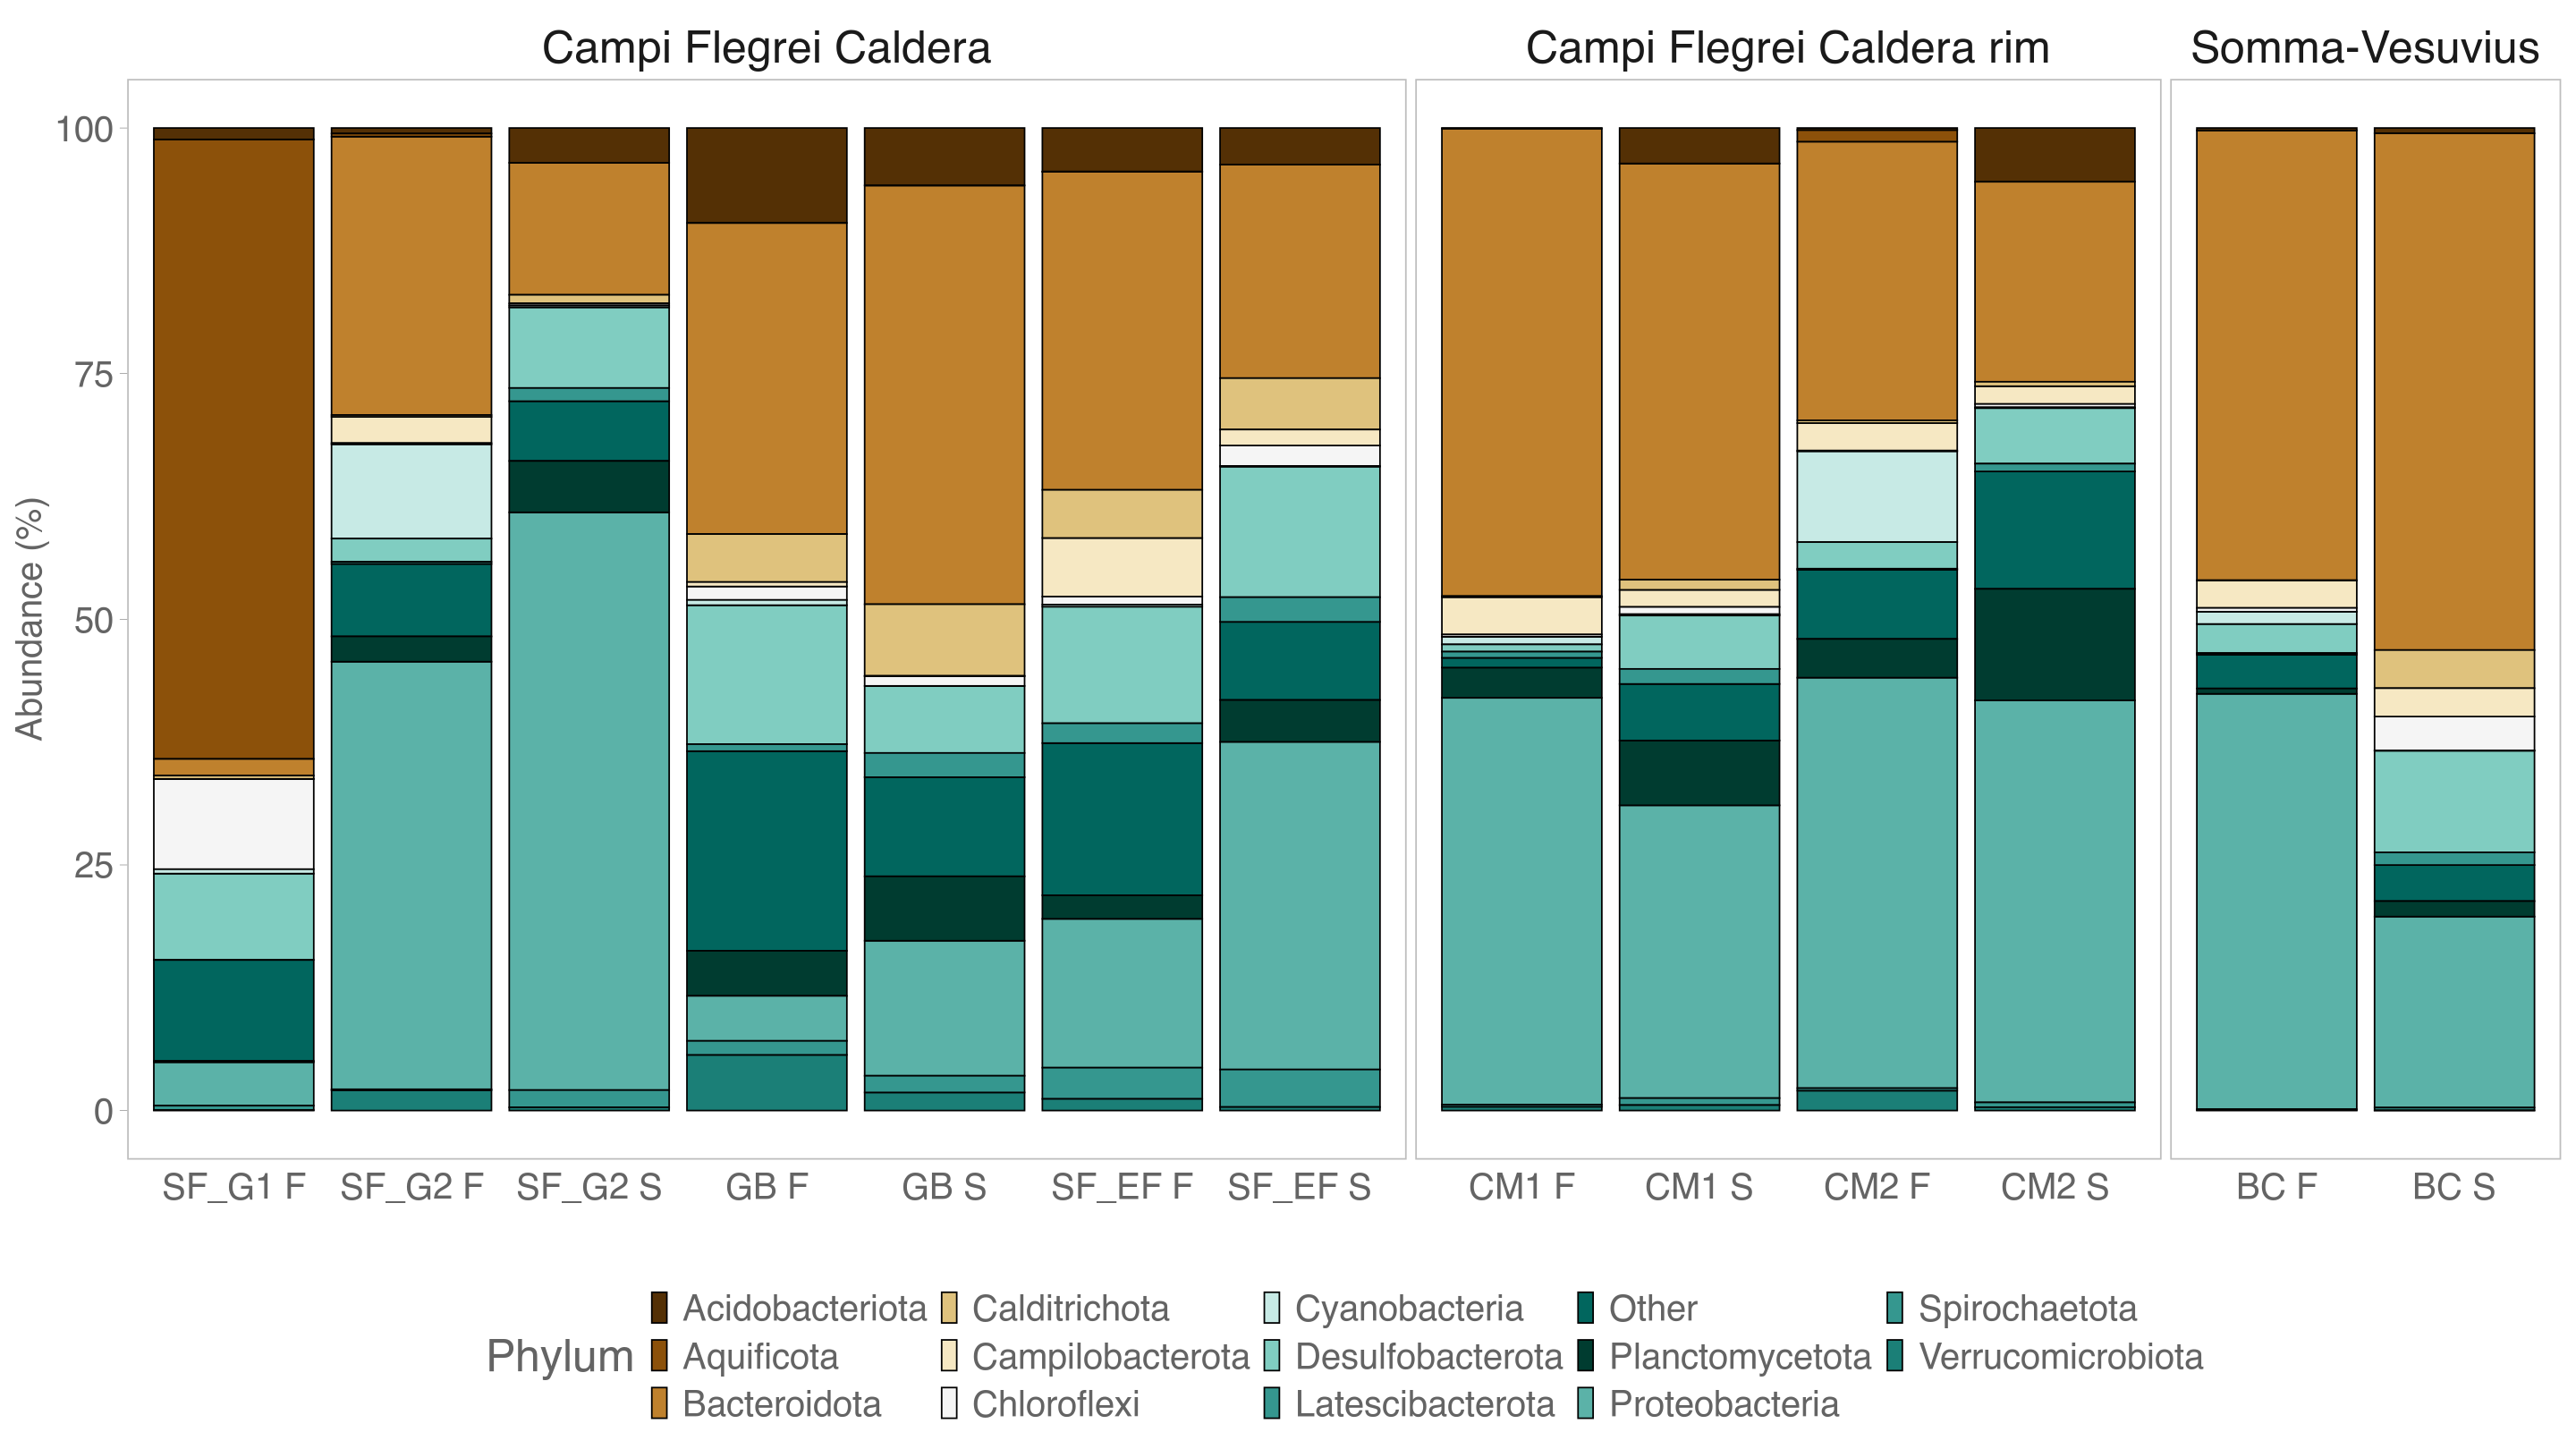

In [22]:
options(repr.plot.width=24, repr.plot.height=13.5)
p1 <- merge_low_abundance(prok_ra_phyla, 0.01) %>%
transform_sample_counts(function(x){x*100}) %>%
plot_bar(fill="Phylum")+
    facet_grid(
        ~region, scale="free",space="free",
        labeller=labeller(code=labell_s)
    )+
    theme_glab()+
    theme(
        legend.position = "bottom",
        #axis.text.x = element_text(angle = 340, vjust = 0.5, hjust=0),
        axis.text=element_text(size=24),
        axis.title=element_text(size=24),
        legend.text = element_text(size=24),
        legend.title = element_text(size=30),
        panel.spacing = unit(0.4, "lines"),
        axis.ticks.x=element_blank(),
        strip.background = element_blank(),
        strip.placement = "outside",
        strip.text=element_text(size=30),
        panel.border = element_rect(size=1, colour ="gray")
    )+
    labs(y="Abundance (%)",
         x="") +

scale_fill_manual(values = CustomPalette) +

facetted_pos_scales(x=list(
        region=="Campi Flegrei Caldera" ~ scale_x_discrete(labels=c("SF_G1 F","SF_G2 F", "SF_G2 S", "GB F", "GB S", "SF_EF F", "SF_EF S")),
       
        region=="Campi Flegrei Caldera rim" ~ scale_x_discrete(labels=c("CM1 F","CM1 S", "CM2 F", "CM2 S")),

        region=="Somma-Vesuvius" ~ scale_x_discrete(labels=c("BC F", "BC S"))))


p1$data$Sample <- factor(p1$data$Sample, levels = order_s)


p1

In [30]:
ggsave("bar_plots_phyla.svg", width=24, height=13.5)

## Bar plot order lvl

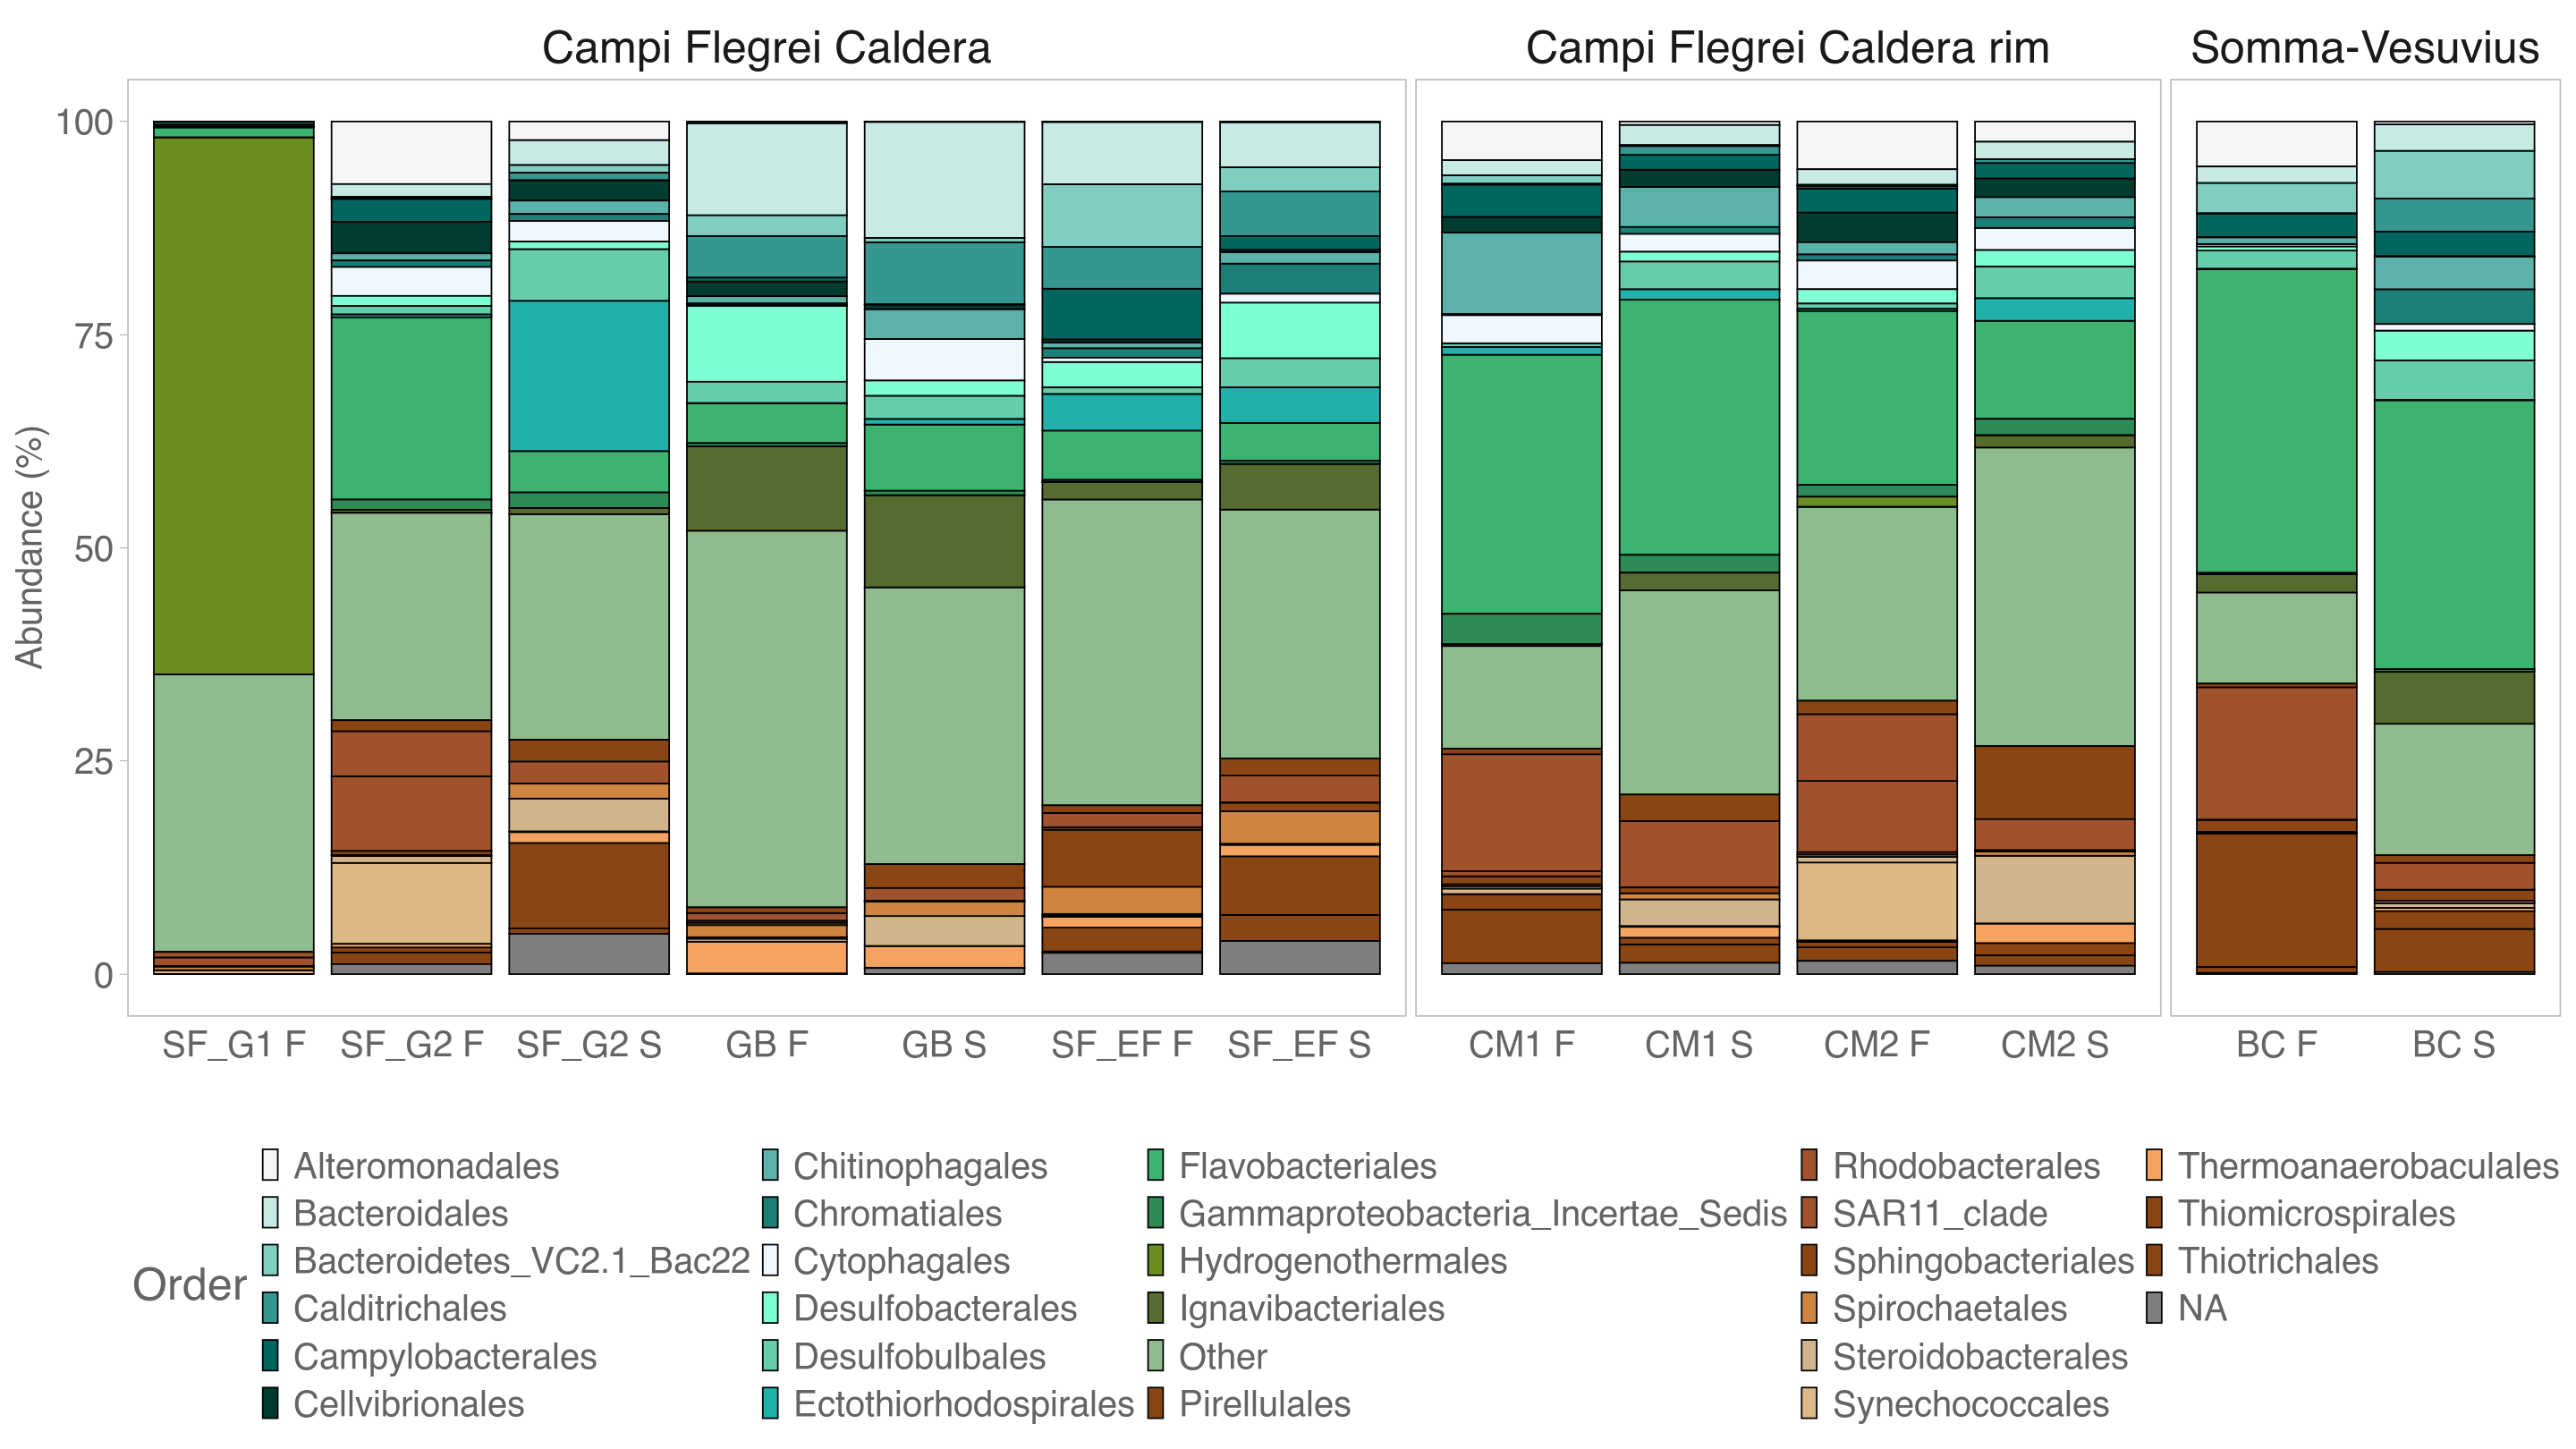

In [23]:
options(repr.plot.width=24, repr.plot.height=13.5)
p2 <- merge_low_abundance(prok_ra_order, 0.01) %>%
transform_sample_counts(function(x){x*100}) %>%
plot_bar(fill="Order")+
    facet_grid(
        ~region, scale="free",space="free",
        labeller=labeller(code=labell_s)
    )+
    theme_glab()+
    theme(
        legend.position = "bottom",
        #axis.text.x = element_text(angle = 340, vjust = 0.5, hjust=0),
        axis.text=element_text(size=24),
        axis.title=element_text(size=24),
        legend.text = element_text(size=24),
        legend.title = element_text(size=30),
        panel.spacing = unit(0.4, "lines"),
        axis.ticks.x=element_blank(),
        strip.background = element_blank(),
        strip.placement = "outside",
        strip.text=element_text(size=30),
        panel.border = element_rect(size=1, colour ="gray")
    )+
    labs(y="Abundance (%)",
         x="") +

scale_fill_manual(values = CustomPalette2) +

facetted_pos_scales(x=list(
        region=="Campi Flegrei Caldera" ~ scale_x_discrete(labels=c("SF_G1 F","SF_G2 F", "SF_G2 S", "GB F", "GB S", "SF_EF F", "SF_EF S")),
       
        region=="Campi Flegrei Caldera rim" ~ scale_x_discrete(labels=c("CM1 F","CM1 S", "CM2 F", "CM2 S")),

        region=="Somma-Vesuvius" ~ scale_x_discrete(labels=c("BC F", "BC S"))))

#p$data$code<-factor(p$data$code, levels=order_sample)

p2$data$Sample <- factor(p2$data$Sample, levels = order_s)


p2

In [28]:
ggsave("bar_plots_order.svg", width=24, height=13.5)

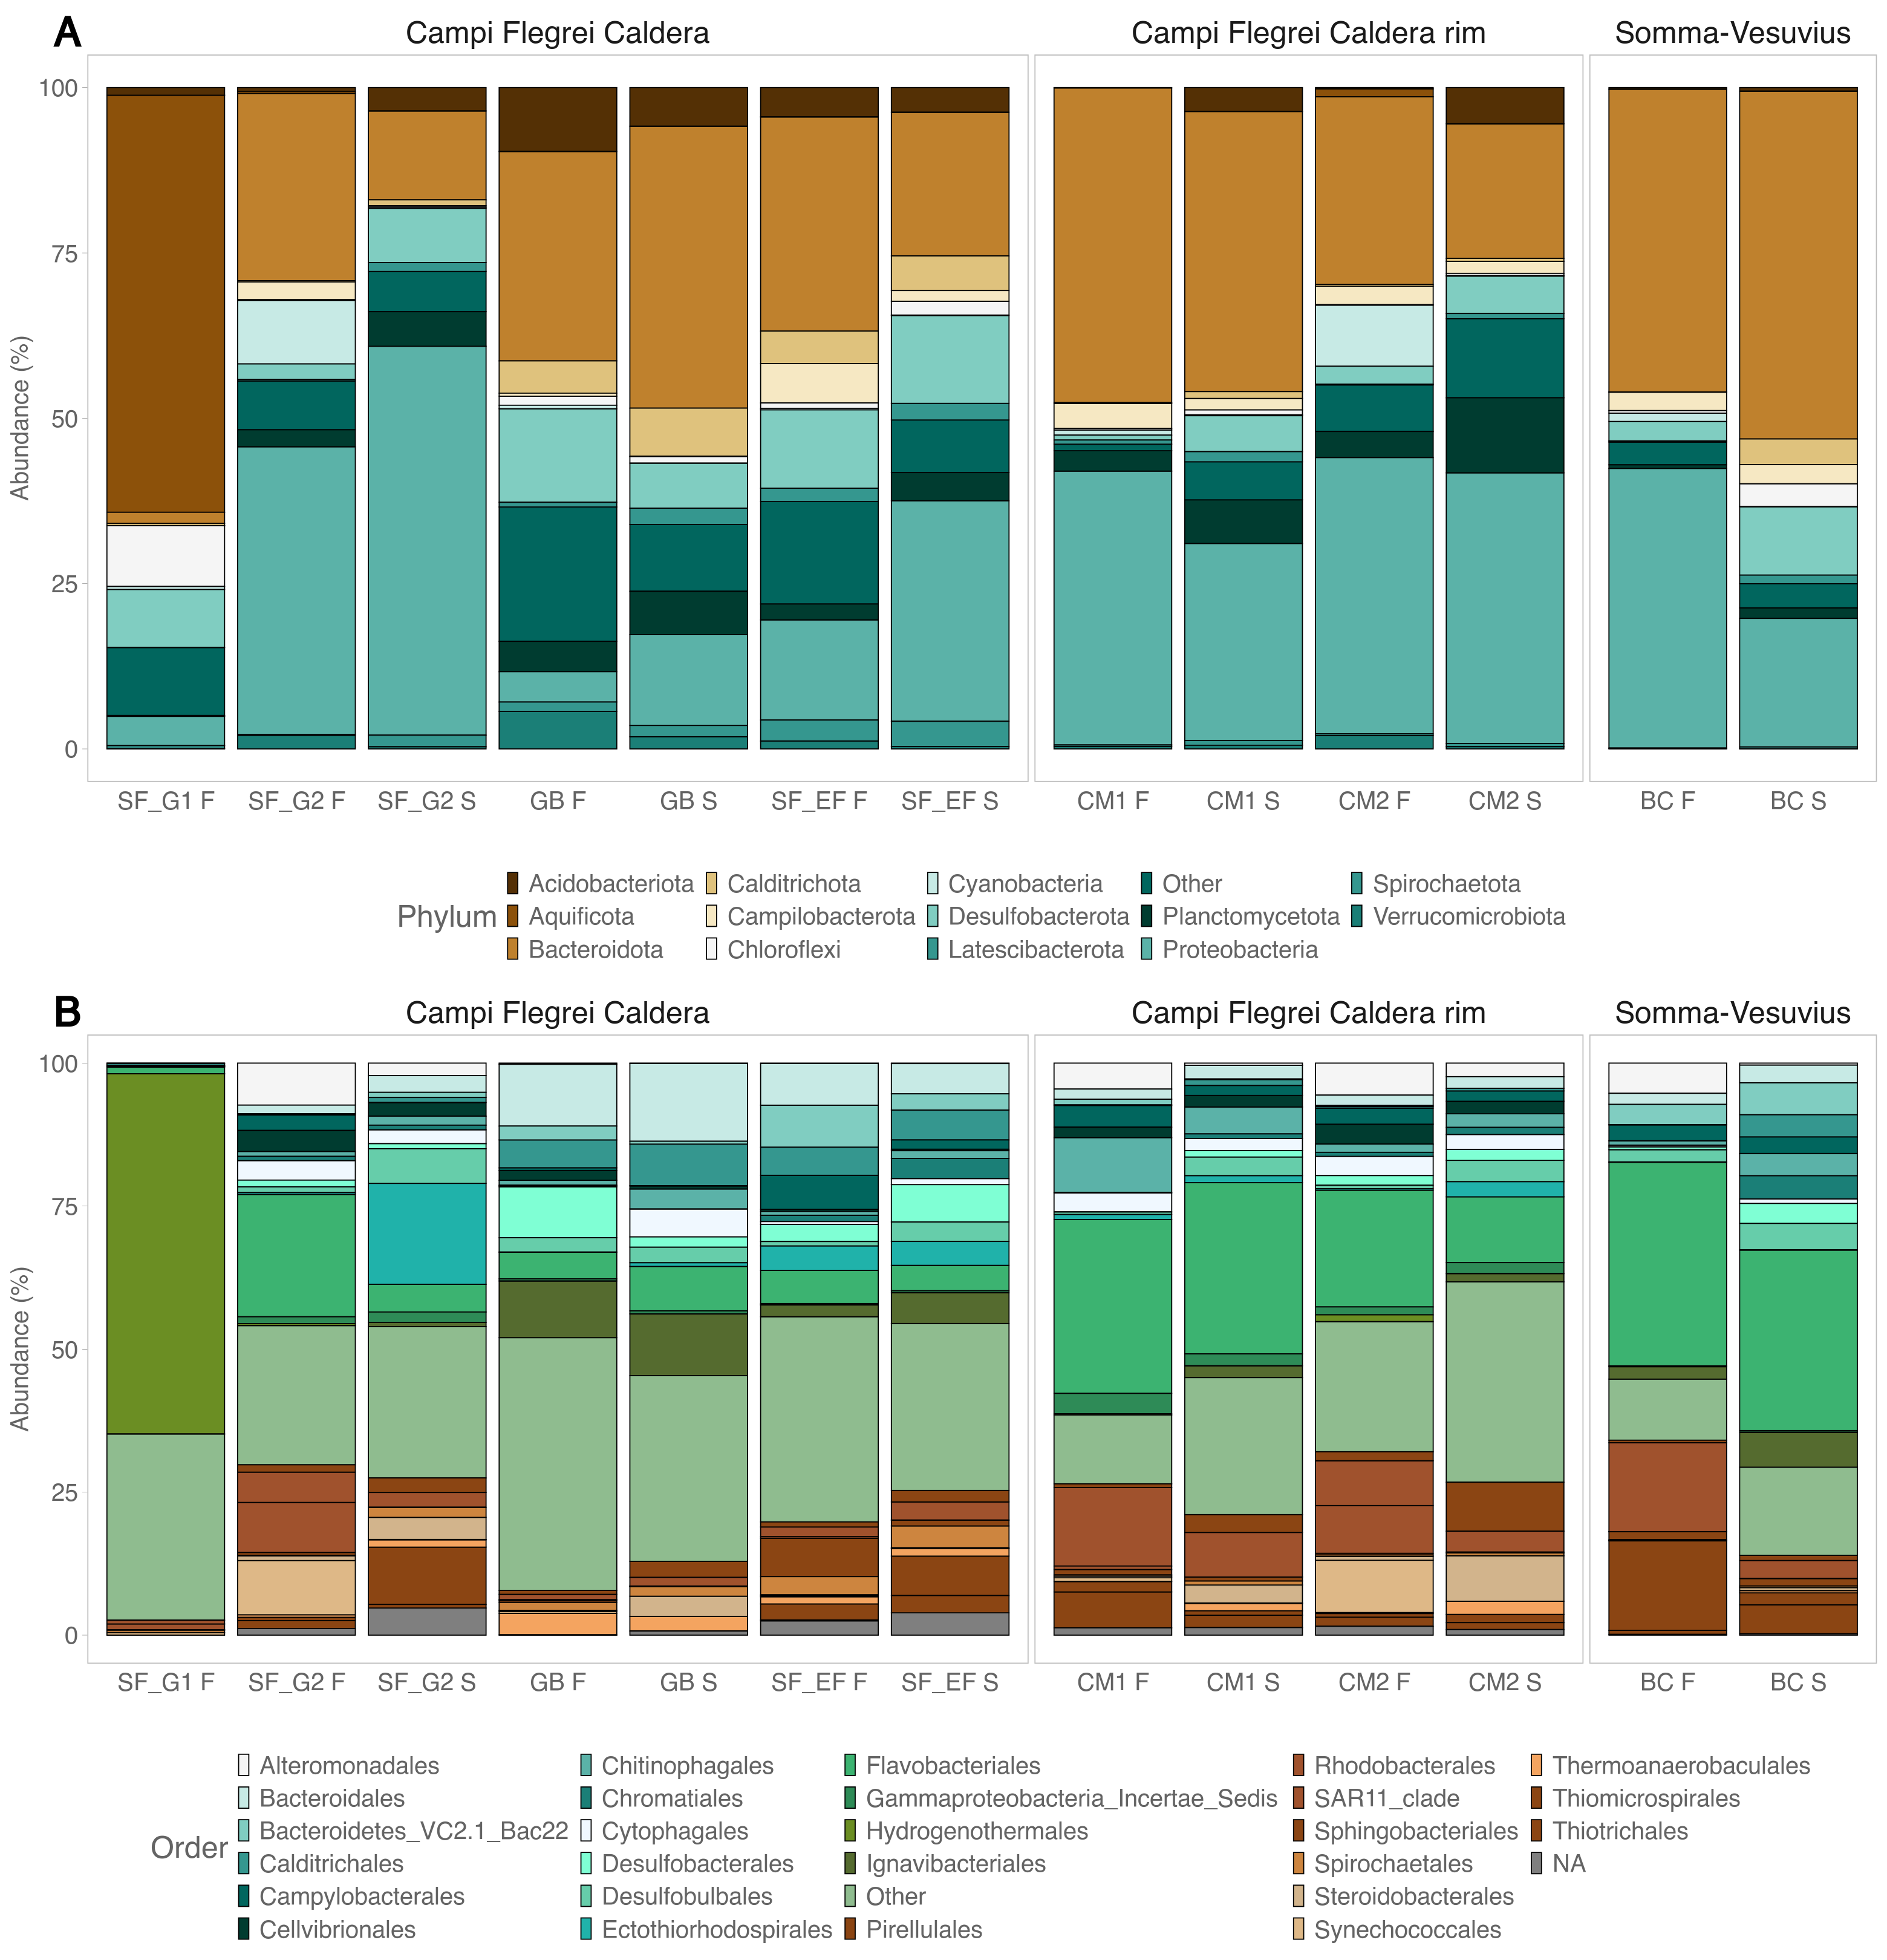

In [25]:
# Setting plots ratio
options(repr.plot.width=26, repr.plot.height=27)

ggarrange(p1,p2,
          labels=c("A", "B"), hjust=-2,
          font.label = list(size = 40),
          nrow=2,
          ncol=1,
          common.legend = FALSE,
          #widths=8,
          #heights=8,
          align="v"
          )

ggsave("bar_plots_revisited_2.svg", width=26,height=27)

## Bar Plots for Biofilms

In [27]:
prok_ndata_biofilm <- subset_samples(prok_ndata, type == "biofilm")
prok_ndata_biofilm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4612 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4612 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4612 tips and 4610 internal nodes ]

In [28]:
# Transform normalized abundance to relative abundances for plotting and some stats
prok_ra_biofilm = transform_sample_counts(prok_ndata_biofilm, function(x){x / sum(x)})
sample_data(prok_ra_biofilm)

code   location       type    region                    lat      long    
7 CM2    Gulf of Naples biofilm Campi Flegrei Caldera rim 40.77955 14.08835
3 SF_G1  Gulf of Naples biofilm Campi Flegrei Caldera     40.82306 14.08750
5 SF_G2A Gulf of Naples biofilm Campi Flegrei Caldera     40.82306 14.08750
6 SF_G2B Gulf of Naples biofilm Campi Flegrei Caldera     40.82306 14.08750
4 BC     Gulf of Naples biofilm Somma-Vesuvius            40.68858 14.45475
  depth temp psu   do   ⋯ Mg Ca Mn Fe Zn As Rb Sr Mo Cs
7  8.3  27.0 38.37 92.0 ⋯ NA NA NA NA NA NA NA NA NA NA
3 13.3  71.0 34.06 50.8 ⋯ NA NA NA NA NA NA NA NA NA NA
5 12.9  68.9 34.50 51.8 ⋯ NA NA NA NA NA NA NA NA NA NA
6 12.9  68.9 34.50 51.8 ⋯ NA NA NA NA NA NA NA NA NA NA
4  0.2  26.4 17.65 53.7 ⋯ NA NA NA NA NA NA NA NA NA NA

In [29]:
prok_ra_phyla_biofilm = tax_glom(prok_ra_biofilm, "Phylum", NArm = FALSE)
prok_ra_order_biofilm = tax_glom(prok_ra_biofilm, "Order", NArm = FALSE)
prok_ra_genus_biofilm = tax_glom(prok_ra_biofilm, "Genus", NArm = FALSE)

In [43]:
#Saving a .csv with combined taxonomy and ASVs abundances for the selected taxonomic level
summary_object <-subset_samples(prok_ra_genus_biofilm)
summary_otu <- as.matrix(t(otu_table(summary_object)))
summary_tax <- as.matrix(tax_table(summary_object))
summary_comb <- cbind(summary_otu, summary_tax)
write.csv(summary_comb, "summary_biolfims.csv")

In [30]:
labell_s<-c("Campi Flegrei Caldera","Campi Flegrei Caldera rim","Somma-Vesuvius")
names(labell_s)<-c("Campi Flegrei Caldera", "Campi Flegrei Caldera rim", "Somma-Vesuvius")
order_sample<-c("3", "5", "6", "12", "7", "4")
sample_name<-c("SF_G1", "SF_G2A", "SF_G2B", "CM2 ", "BC ")
order_s<-c("3", "5", "6", "12", "7", "4")

In [31]:
CustomPalette <- c("#543005", "#bf812d", "#f6e8c3", "#80cdc1", 
                           "#01665e", "#003c30", "#5BB2A8", "#1B7F77")

In [32]:
CustomPalette2 <- c("#F5F5F5", "#35978F", "#01665E", "#003C30", "#5BB2A8", 
                            "#1B7F77", "#66CDAA", "#2E8B57", "#8B4513", "#CD853F", 
                            "#F4A460")

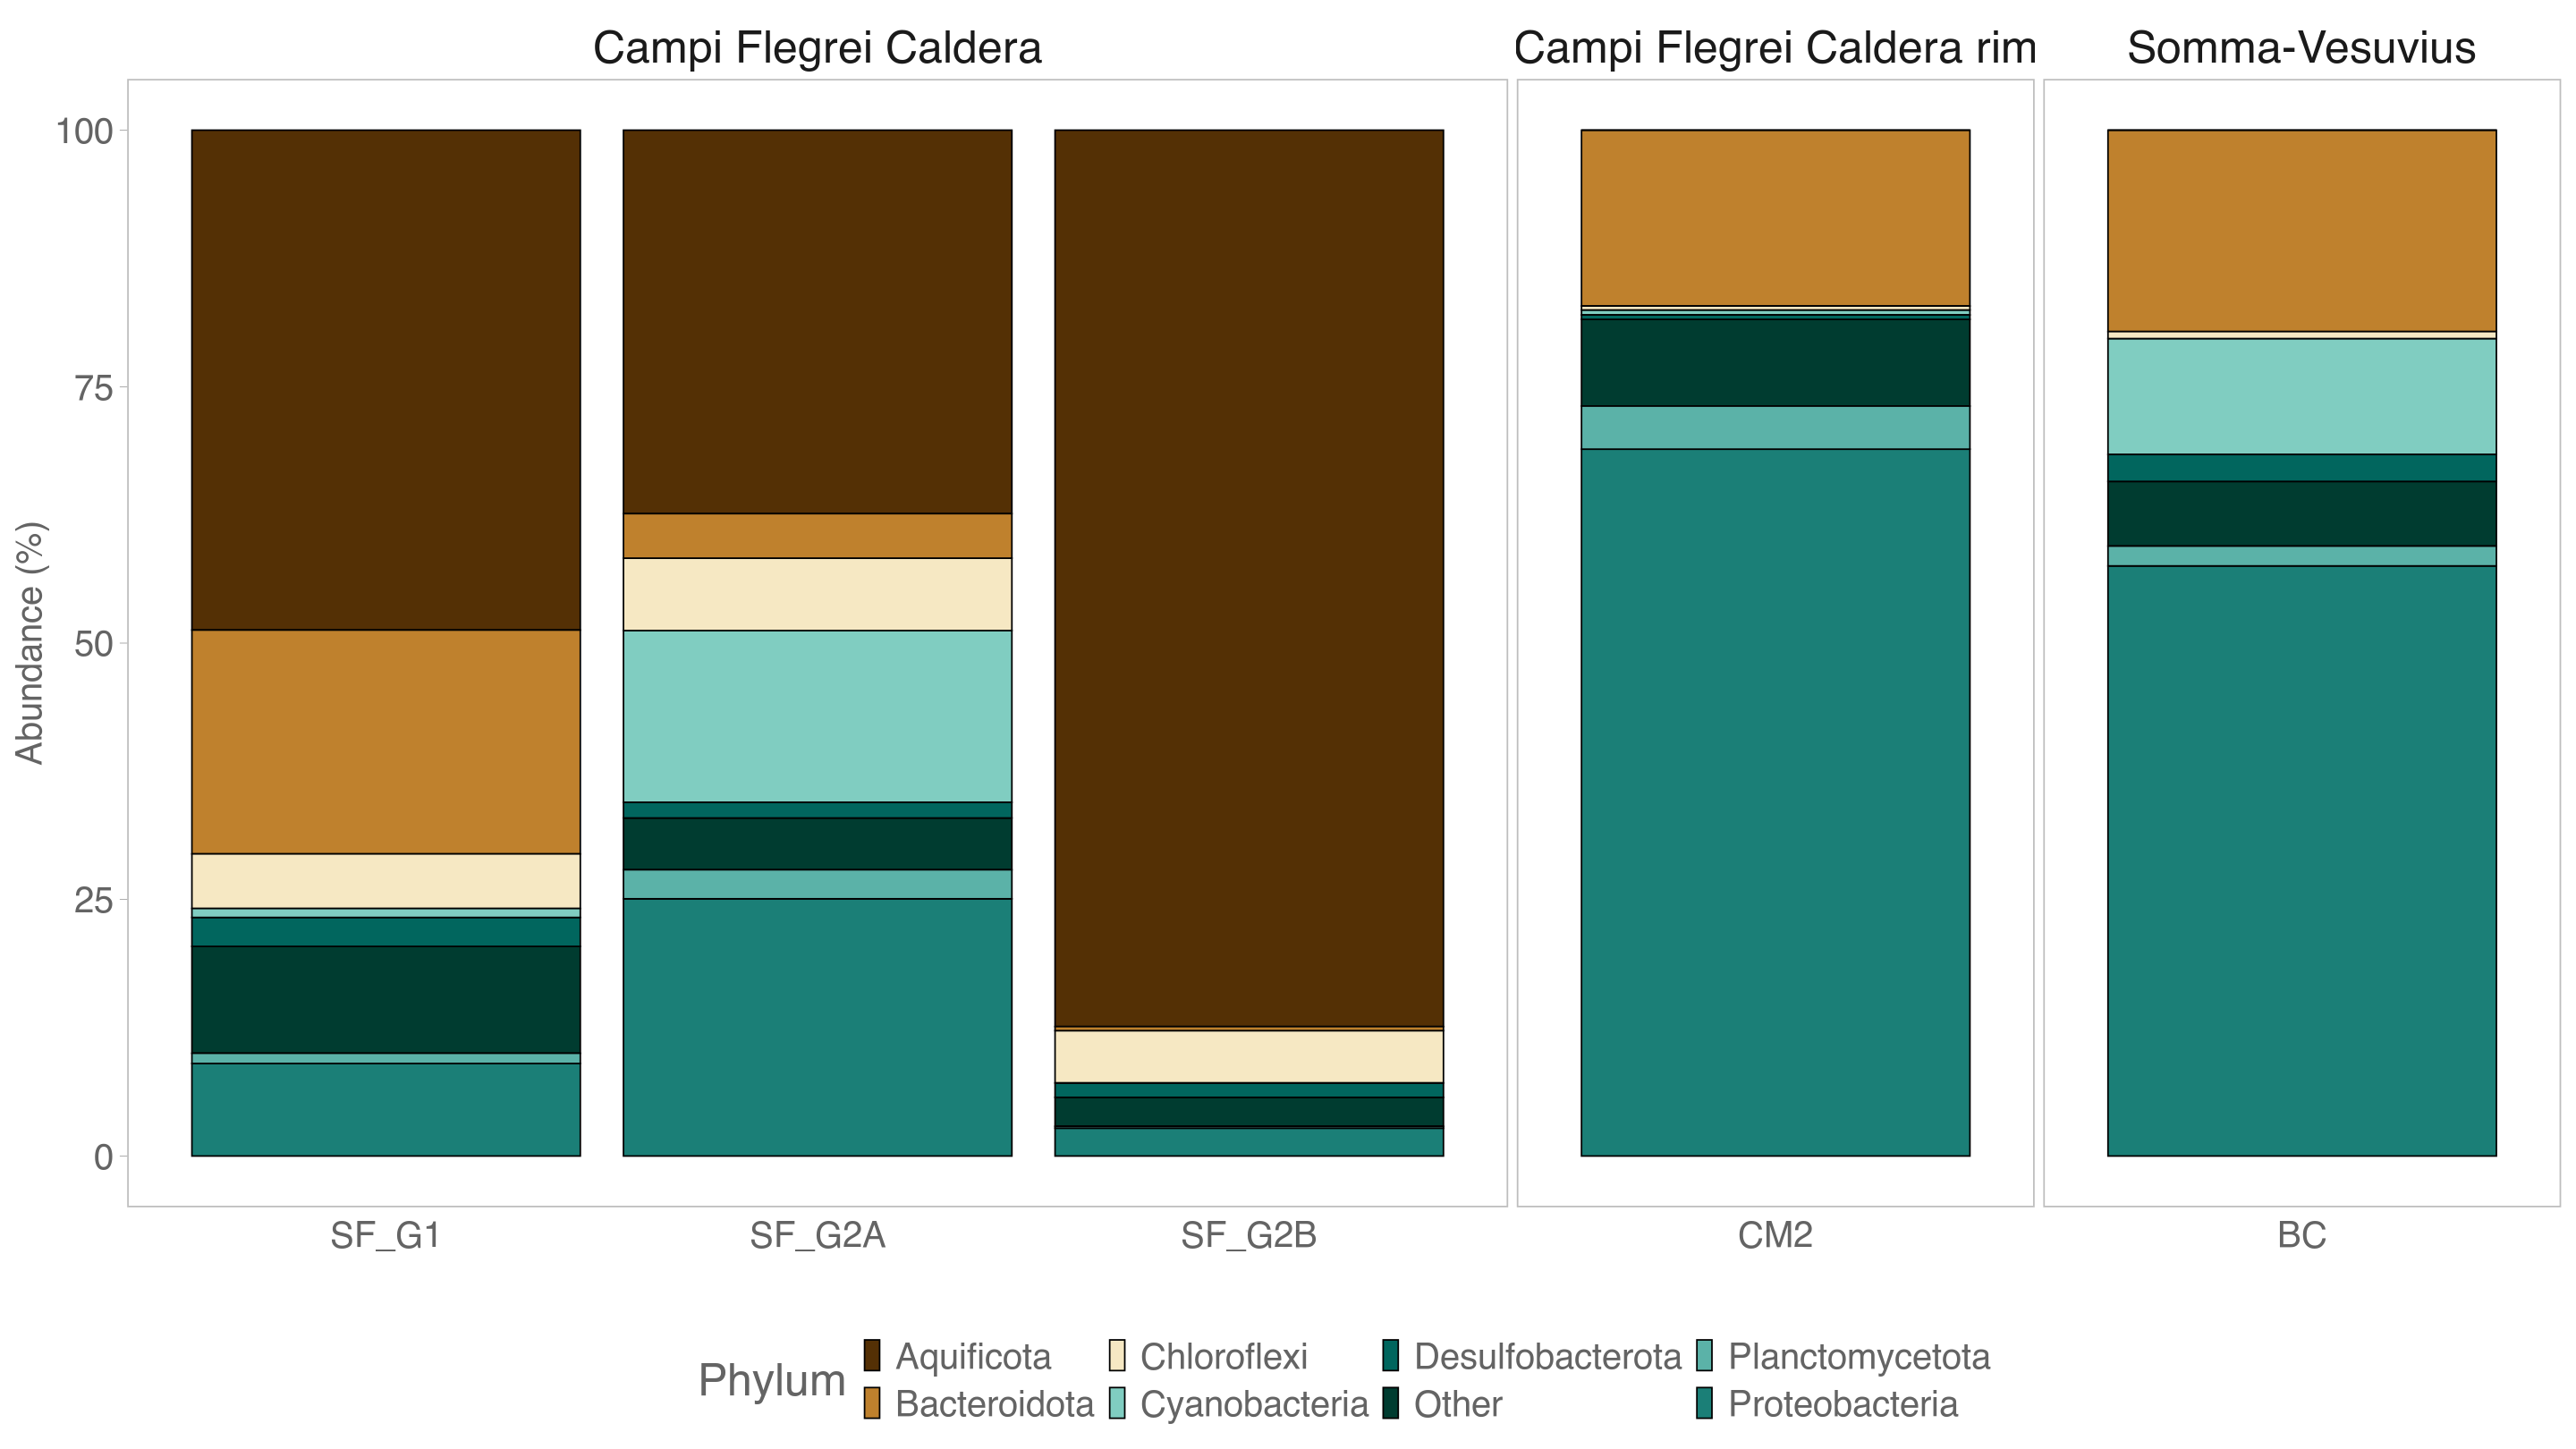

In [33]:
options(repr.plot.width=24, repr.plot.height=13.5)
p3 <- merge_low_abundance(prok_ra_phyla_biofilm, 0.01) %>%
transform_sample_counts(function(x){x*100}) %>%
plot_bar(fill="Phylum")+
    facet_grid(
        ~region, scale="free",space="free",
        labeller=labeller(code=labell_s)
    )+
    theme_glab()+
    theme(
        legend.position = "bottom",
        #axis.text.x = element_text(angle = 340, vjust = 0.5, hjust=0),
        axis.text=element_text(size=24),
        axis.title=element_text(size=24),
        legend.text = element_text(size=24),
        legend.title = element_text(size=30),
        panel.spacing = unit(0.4, "lines"),
        axis.ticks.x=element_blank(),
        strip.background = element_blank(),
        strip.placement = "outside",
        strip.text=element_text(size=30),
        panel.border = element_rect(size=1, colour ="gray")
    )+
    labs(y="Abundance (%)",
         x="") +

scale_fill_manual(values = CustomPalette) +

facetted_pos_scales(x=list(
        region=="Campi Flegrei Caldera" ~ scale_x_discrete(labels=c("SF_G1","SF_G2A", "SF_G2B")),
       
        region=="Campi Flegrei Caldera rim" ~ scale_x_discrete(labels=c("CM2")),

        region=="Somma-Vesuvius" ~ scale_x_discrete(labels=c("BC"))))


p3$data$Sample <- factor(p3$data$Sample, levels = order_s)


p3

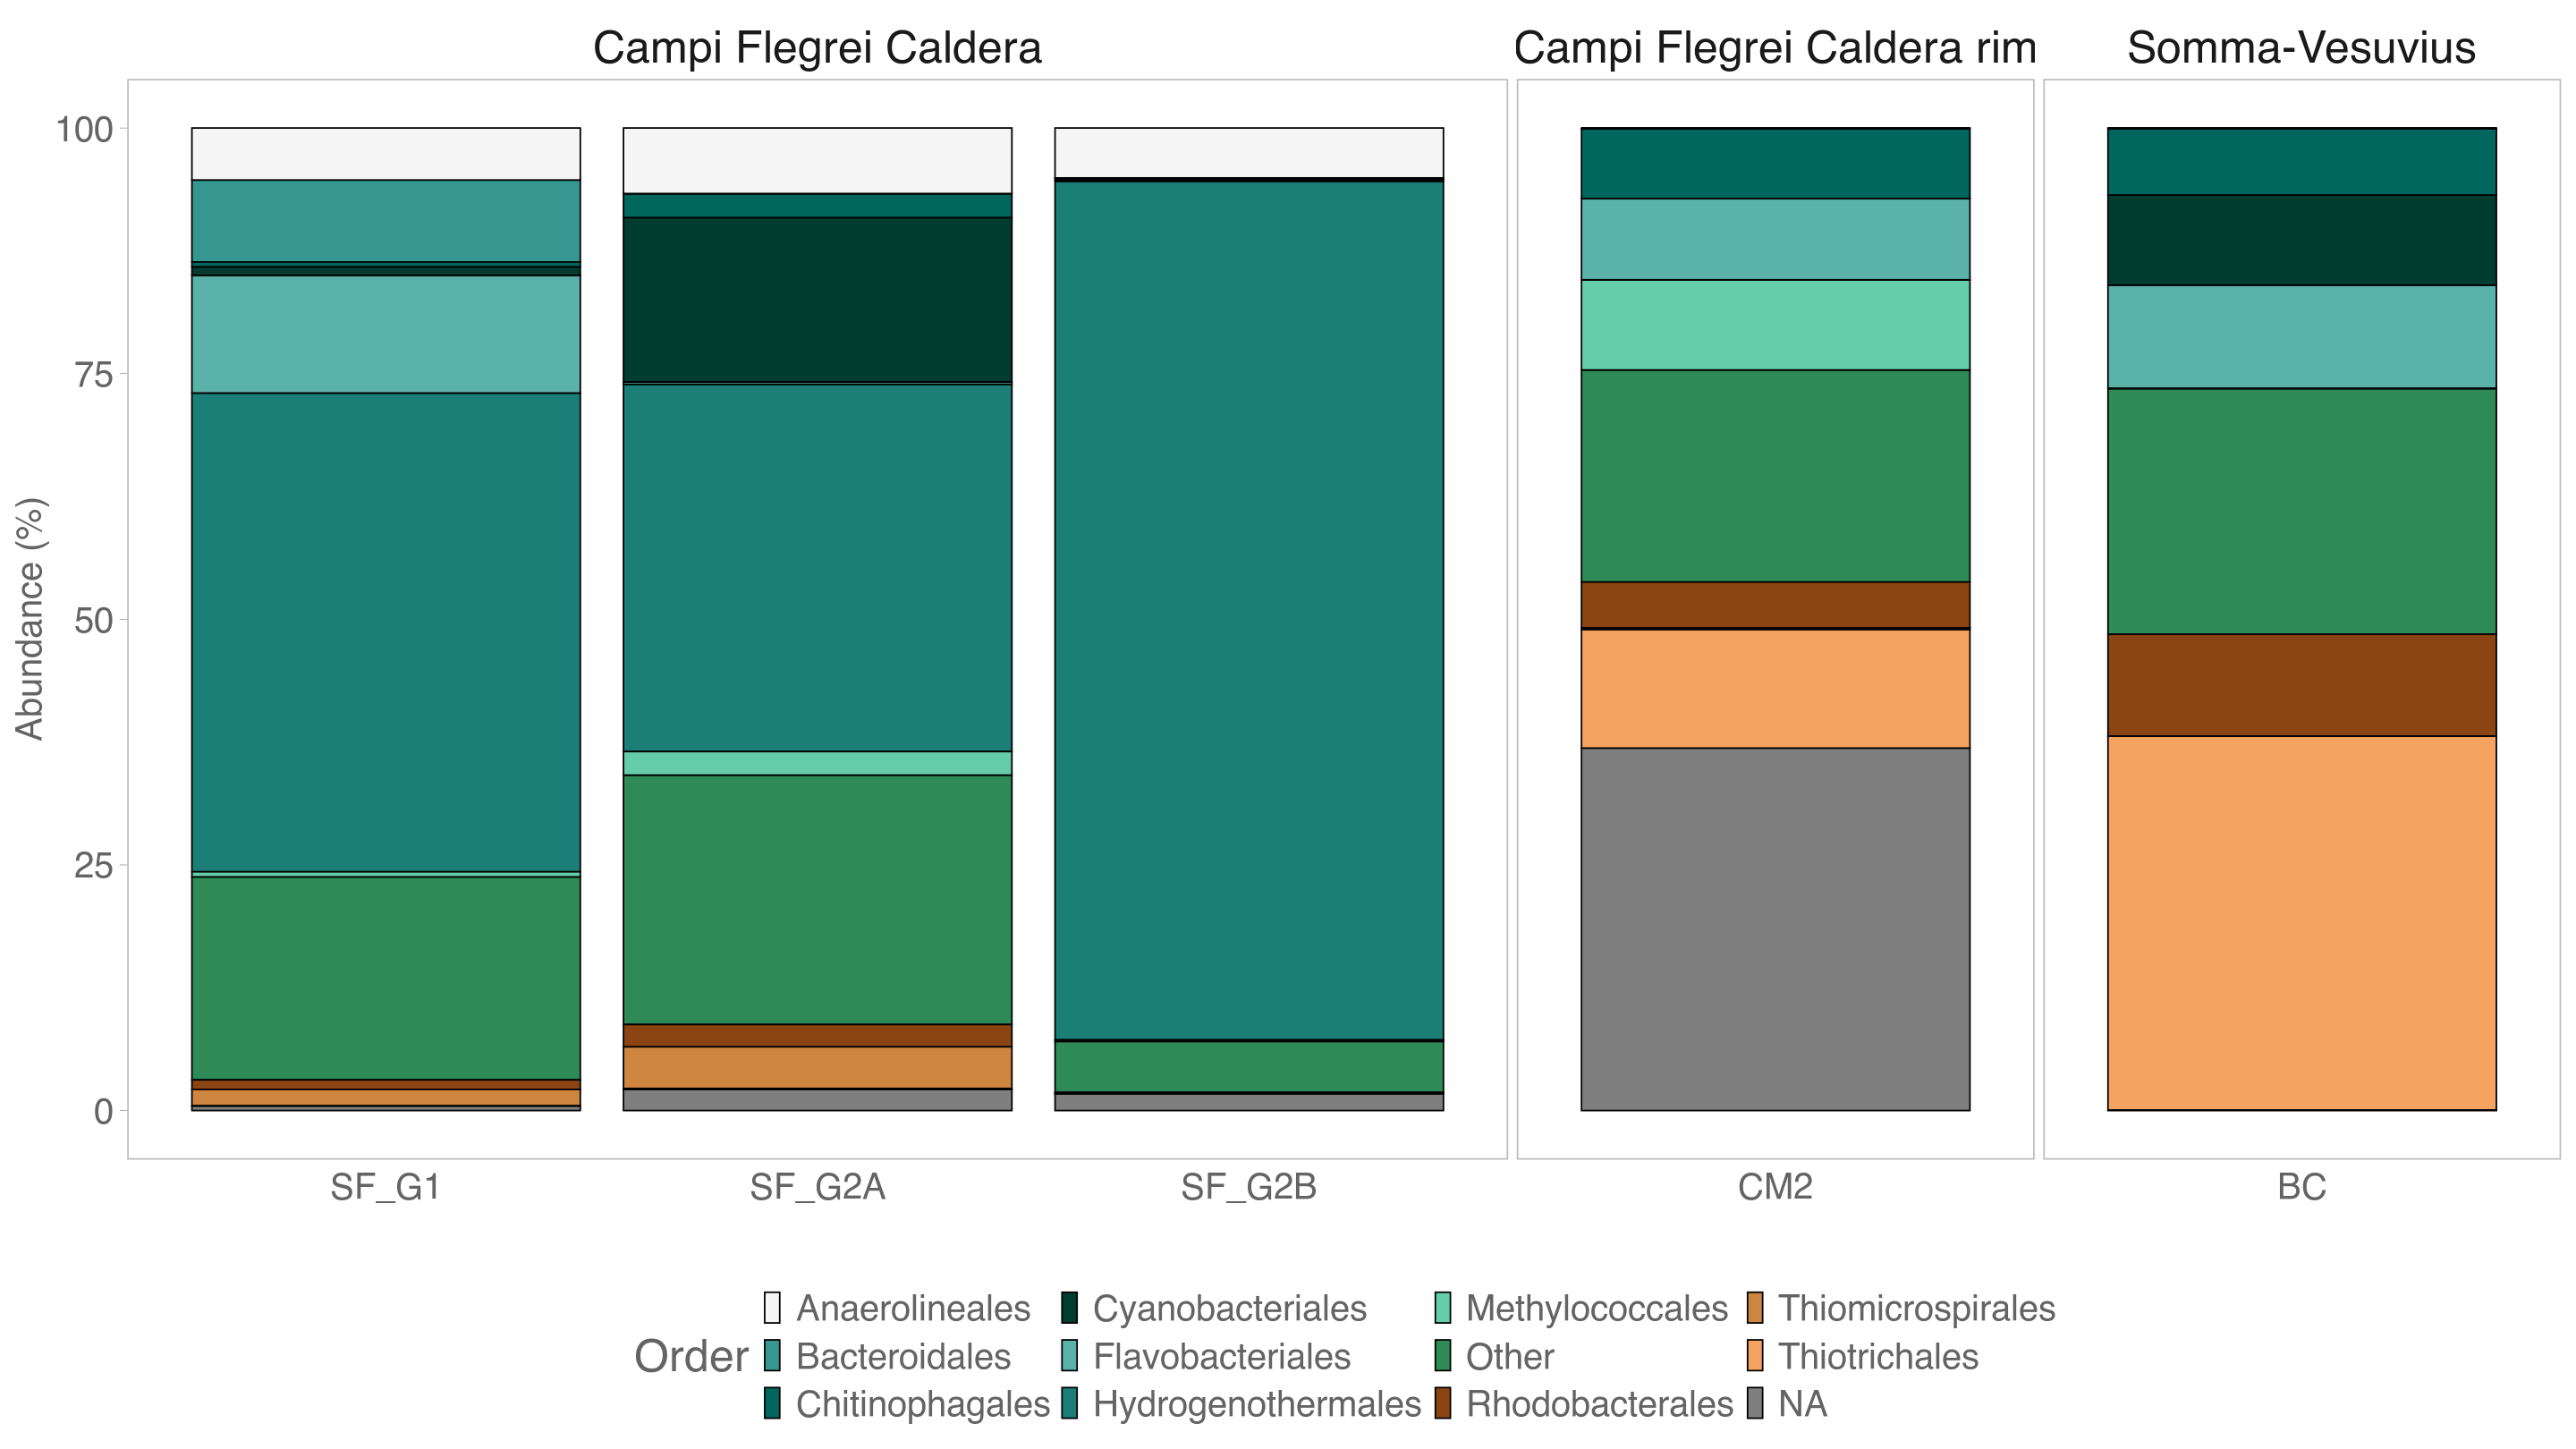

In [34]:
options(repr.plot.width=24, repr.plot.height=13.5)
p4 <- merge_low_abundance(prok_ra_order_biofilm, 0.01) %>%
transform_sample_counts(function(x){x*100}) %>%
plot_bar(fill="Order")+
    facet_grid(
        ~region, scale="free",space="free",
        labeller=labeller(code=labell_s)
    )+
    theme_glab()+
    theme(
        legend.position = "bottom",
        #axis.text.x = element_text(angle = 340, vjust = 0.5, hjust=0),
        axis.text=element_text(size=24),
        axis.title=element_text(size=24),
        legend.text = element_text(size=24),
        legend.title = element_text(size=30),
        panel.spacing = unit(0.4, "lines"),
        axis.ticks.x=element_blank(),
        strip.background = element_blank(),
        strip.placement = "outside",
        strip.text=element_text(size=30),
        panel.border = element_rect(size=1, colour ="gray")
    )+
    labs(y="Abundance (%)",
         x="") +

scale_fill_manual(values = CustomPalette2) +

facetted_pos_scales(x=list(
        region=="Campi Flegrei Caldera" ~ scale_x_discrete(labels=c("SF_G1","SF_G2A", "SF_G2B")),
       
        region=="Campi Flegrei Caldera rim" ~ scale_x_discrete(labels=c("CM2")),

        region=="Somma-Vesuvius" ~ scale_x_discrete(labels=c("BC"))))

#p$data$code<-factor(p$data$code, levels=order_sample)

p4$data$Sample <- factor(p4$data$Sample, levels = order_s)


p4

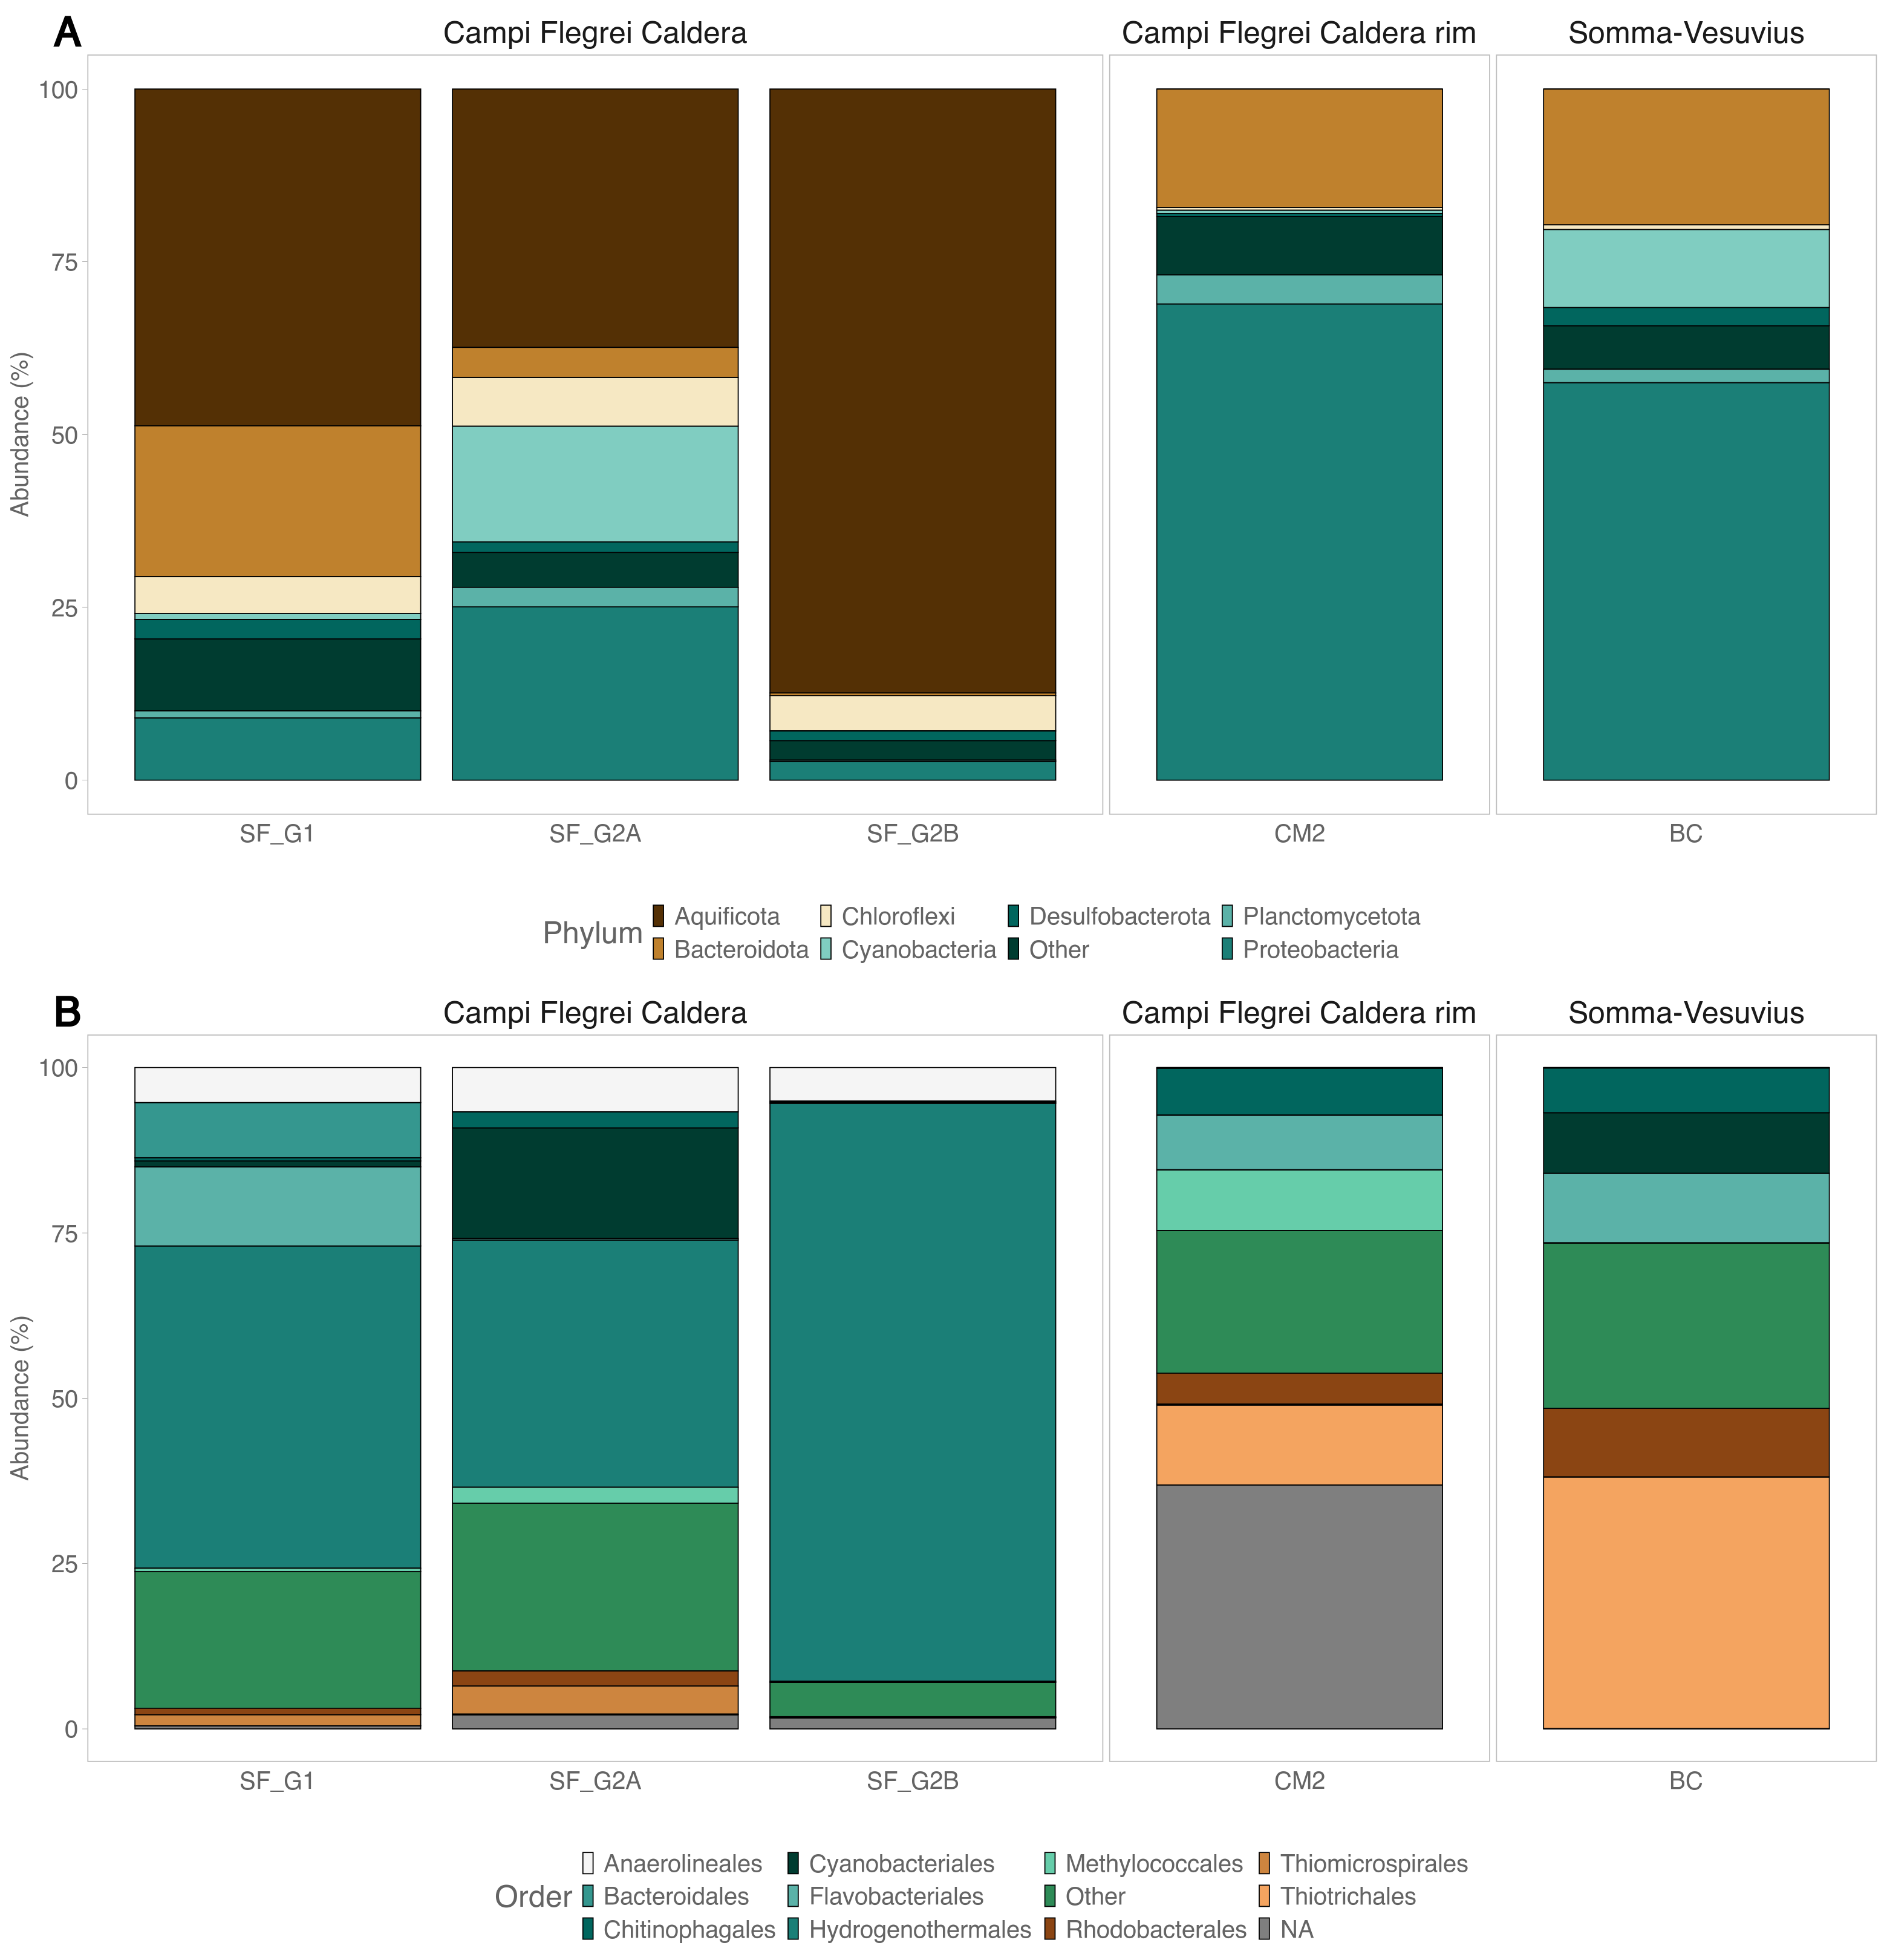

In [35]:
# Setting plots ratio
options(repr.plot.width=26, repr.plot.height=27)

ggarrange(p3,p4,
          labels=c("A", "B"), hjust=-2,
          font.label = list(size = 40),
          nrow=2,
          ncol=1,
          common.legend = FALSE,
          #widths=8,
          #heights=8,
          align="v"
          )

ggsave("Biofilm_plots.svg", width=35,height=27)

# Beta-Diversity analysis

## NMDS Jaccard similarity index: Weighted and Unweighted

In [47]:
prok_ndata_no_b <- subset_samples(prok_ndata, type != "biofilm")
prok_ndata_no_b

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4612 taxa and 13 samples ]
sample_data() Sample Data:       [ 13 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 4612 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4612 tips and 4610 internal nodes ]

In [48]:
prok_dist_wjac <- phyloseq::distance(prok_ndata_no_b, method = "jaccard")
prok_dist_unjac <- phyloseq::distance(prok_ndata_no_b, method = "jaccard", binary = TRUE)

### Weighted Jaccard

In [49]:
# https://rdrr.io/bioc/phyloseq/man/distance.html
prok_nmds_jw <- ordinate(prok_ndata_no_b,prok_dist_wjac, method = "NMDS",trymax=100)

Run 0 stress 0.1267291 
Run 1 stress 0.1397665 
Run 2 stress 0.175484 
Run 3 stress 0.1397665 
Run 4 stress 0.126729 
... New best solution
... Procrustes: rmse 0.0001811542  max resid 0.0005385276 
... Similar to previous best
Run 5 stress 0.1470975 
Run 6 stress 0.1397665 
Run 7 stress 0.1562392 
Run 8 stress 0.1562394 
Run 9 stress 0.126729 
... New best solution
... Procrustes: rmse 5.07941e-05  max resid 0.0001235669 
... Similar to previous best
Run 10 stress 0.1562397 
Run 11 stress 0.1470975 
Run 12 stress 0.1470975 
Run 13 stress 0.1618135 
Run 14 stress 0.1267293 
... Procrustes: rmse 0.00040801  max resid 0.001206225 
... Similar to previous best
Run 15 stress 0.1397665 
Run 16 stress 0.1397665 
Run 17 stress 0.126729 
... New best solution
... Procrustes: rmse 4.295221e-05  max resid 0.0001008713 
... Similar to previous best
Run 18 stress 0.1470976 
Run 19 stress 0.1397665 
Run 20 stress 0.1470975 
*** Best solution repeated 1 times


Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


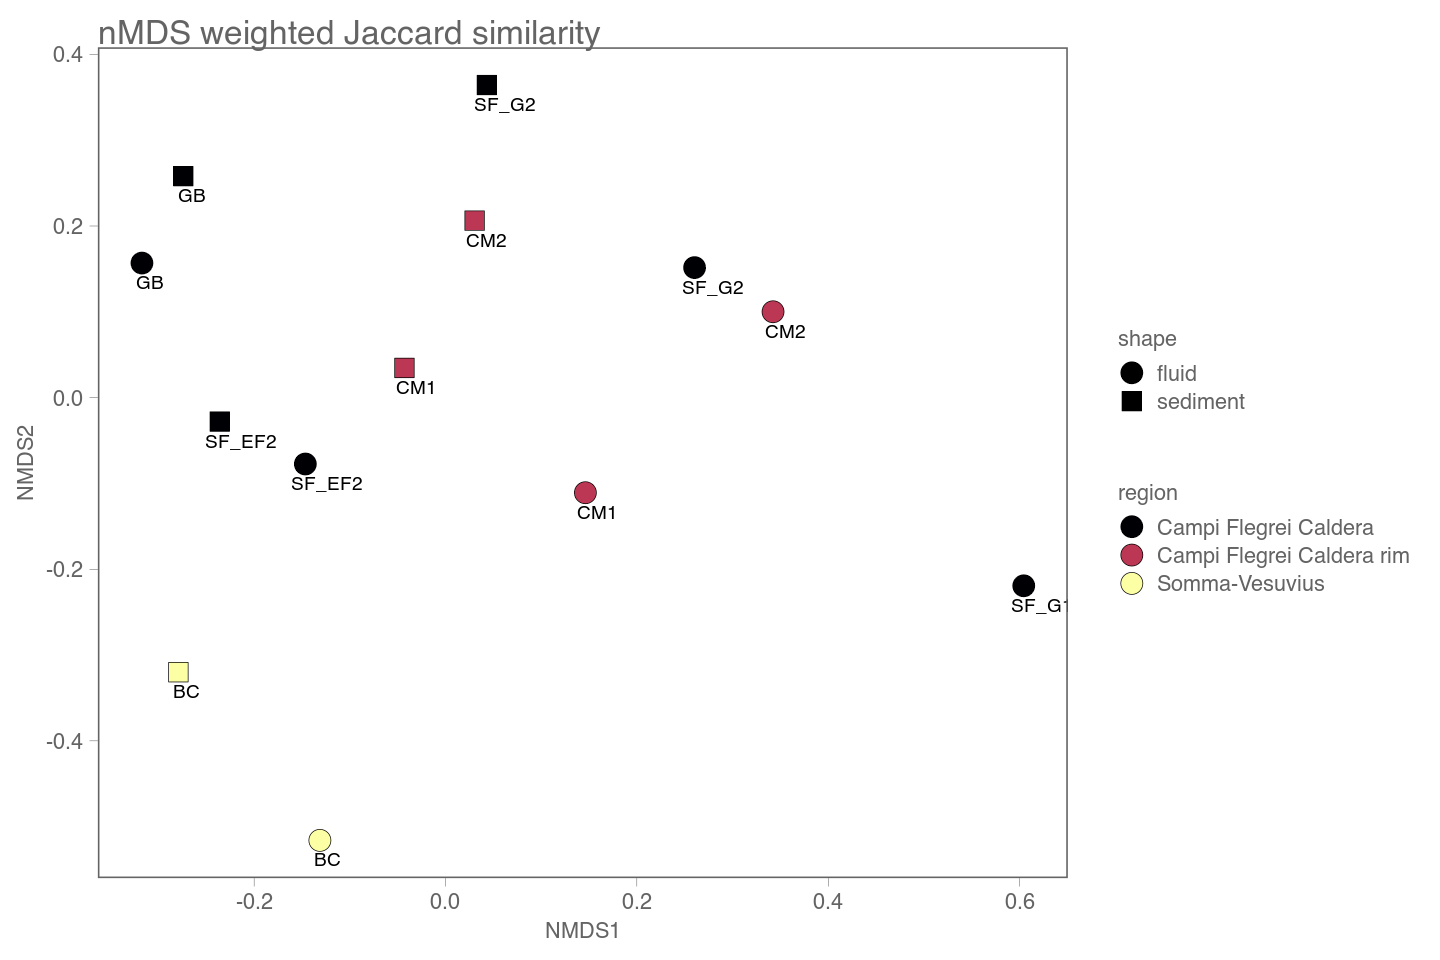

In [295]:
# nmds W jaccard

plot_ordination(prok_ndata_no_b, prok_nmds_jw, type="samples",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=region,shape=type),size=6,color="black",stroke=0.3) + 

    geom_text(aes(label= code), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=TRUE, option="inferno") +

    scale_shape_manual(values=c(21:23)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

ggsave("nmds_geochem_w.svg", width=12, height=8)

## Vector Fitting Weighted Jaccard

In [52]:
nmds_df1_jw<-cbind(sample_data(prok_ndata_no_b),prok_nmds_jw$points)
nmds_df1_jw

code   location       type     region                    lat      long    
1  CM1    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
16 CM1    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
11 CM2    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
13 CM2    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
17 GB     Gulf of Naples fluid    Campi Flegrei Caldera     40.82375 14.07890
F  GB     Gulf of Naples sediment Campi Flegrei Caldera     40.82375 14.07890
10 SF_EF2 Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
18 SF_EF2 Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
14 SF_G1  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
12 SF_G2  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
9  SF_G2  Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
15 BC     Gulf of Naples fluid    Somma-Vesuvius            40.68858 14.45475
A  BC     Gulf of Naples sediment Somma-Vesuvius            40.68858 14.45475
   depth temp psu   do   ⋯ Mn       Fe        Zn       As       Rb      
1   7.0  26.3 27.54 55.0 ⋯ 0.061217  0.113124 0.456657 0.021972 0.157602
16  7.0  26.3 27.54 55.0 ⋯ 0.061217  0.113124 0.456657 0.021972 0.157602
11  8.3  27.0 38.37 92.0 ⋯ 0.003700  0.011037 0.033080 0.020202 0.147709
13  8.3  27.0 38.37 92.0 ⋯ 0.003700  0.011037 0.033080 0.020202 0.147709
17  5.4  28.0 35.41 43.0 ⋯ 3.099014 11.123430 0.170947 0.512667 3.237141
F   5.4  28.0 35.41 43.0 ⋯ 3.099014 11.123430 0.170947 0.512667 3.237141
10 10.0  34.0 26.50 75.0 ⋯ 0.007141  0.033976 0.023478 0.010740 0.145538
18 10.0  34.0 26.50 75.0 ⋯ 0.007141  0.033976 0.023478 0.010740 0.145538
14 13.3  71.0 34.06 50.8 ⋯ 1.183603  3.590772 0.186116 1.908748 2.430386
12 12.9  68.9 34.50 51.8 ⋯ 1.131211  3.361098 0.047900 2.446793 2.424394
9  12.9  68.9 34.50 51.8 ⋯ 1.131211  3.361098 0.047900 2.446793 2.424394
15  0.2  26.4 17.65 53.7 ⋯ 0.047346  0.097862 0.193533 0.011163 0.120608
A   0.2  26.4 17.65 53.7 ⋯ 0.047346  0.097862 0.193533 0.011163 0.120608
   Sr        Mo       Cs       MDS1        MDS2       
1  11.402800 0.010804 0.002033 -0.04289412  0.03459646
16 11.402800 0.010804 0.002033  0.14621955 -0.11085241
11 10.231950 0.011593 0.005425  0.03045653  0.20622912
13 10.231950 0.011593 0.005425  0.34232593  0.10002538
17 11.487620 0.000985 0.170143 -0.31724559  0.15678203
F  11.487620 0.000985 0.170143 -0.27405689  0.25812148
10 10.712230 0.011988 0.004302 -0.23586248 -0.02794635
18 10.712230 0.011988 0.004302 -0.14645382 -0.07738345
14 13.262330 0.001486 1.729868  0.60435401 -0.21931703
12 13.074010 0.002394 1.645036  0.26033360  0.15150828
9  13.074010 0.002394 1.645036  0.04325678  0.36425237
15  8.110929 0.000000 0.006474 -0.13126340 -0.51600322
A   8.110929 0.000000 0.006474 -0.27917009 -0.32001265

In [180]:
nmds_df1.1_jw <- nmds_df1_jw[,8:33]
nmds_df1.1_jw

temp psu   do   orp    ph   ms.cm mVph ppt.tds Cl       Br    ⋯ Mn      
1  26.3 27.54 55.0 -115.4 5.87 56.58 55.6 28.35   31498.70 75.13 ⋯ 0.061217
16 26.3 27.54 55.0 -115.4 5.87 56.58 55.6 28.35   31498.70 75.13 ⋯ 0.061217
11 27.0 38.37 92.0   54.2 6.30 57.54 46.5 28.76   31011.94 74.75 ⋯ 0.003700
13 27.0 38.37 92.0   54.2 6.30 57.54 46.5 28.76   31011.94 74.75 ⋯ 0.003700
17 28.0 35.41 43.0 -145.2 5.33 53.64 83.5 26.80   29581.00 70.63 ⋯ 3.099014
F  28.0 35.41 43.0 -145.2 5.33 53.64 83.5 26.80   29581.00 70.63 ⋯ 3.099014
10 34.0 26.50 75.0 -173.0 5.25    NA 90.0 28.50   31973.57 74.70 ⋯ 0.007141
18 34.0 26.50 75.0 -173.0 5.25    NA 90.0 28.50   31973.57 74.70 ⋯ 0.007141
14 71.0 34.06 50.8 -159.0 5.45 51.80 77.8 25.90   28225.83 67.24 ⋯ 1.183603
12 68.9 34.50 51.8 -142.0 5.61 52.00 70.0 26.10   28245.38 66.60 ⋯ 1.131211
9  68.9 34.50 51.8 -142.0 5.61 52.00 70.0 26.10   28245.38 66.60 ⋯ 1.131211
15 26.4 17.65 53.7 -226.2 6.30 28.66 30.5 14.31   14820.82 35.59 ⋯ 0.047346
A  26.4 17.65 53.7 -226.2 6.30 28.66 30.5 14.31   14820.82 35.59 ⋯ 0.047346
   Fe        Zn       As       Rb       Sr        Mo       Cs       MDS1       
1   0.113124 0.456657 0.021972 0.157602 11.402800 0.010804 0.002033 -0.04289412
16  0.113124 0.456657 0.021972 0.157602 11.402800 0.010804 0.002033  0.14621955
11  0.011037 0.033080 0.020202 0.147709 10.231950 0.011593 0.005425  0.03045653
13  0.011037 0.033080 0.020202 0.147709 10.231950 0.011593 0.005425  0.34232593
17 11.123430 0.170947 0.512667 3.237141 11.487620 0.000985 0.170143 -0.31724559
F  11.123430 0.170947 0.512667 3.237141 11.487620 0.000985 0.170143 -0.27405689
10  0.033976 0.023478 0.010740 0.145538 10.712230 0.011988 0.004302 -0.23586248
18  0.033976 0.023478 0.010740 0.145538 10.712230 0.011988 0.004302 -0.14645382
14  3.590772 0.186116 1.908748 2.430386 13.262330 0.001486 1.729868  0.60435401
12  3.361098 0.047900 2.446793 2.424394 13.074010 0.002394 1.645036  0.26033360
9   3.361098 0.047900 2.446793 2.424394 13.074010 0.002394 1.645036  0.04325678
15  0.097862 0.193533 0.011163 0.120608  8.110929 0.000000 0.006474 -0.13126340
A   0.097862 0.193533 0.011163 0.120608  8.110929 0.000000 0.006474 -0.27917009
   MDS2       
1   0.03459646
16 -0.11085241
11  0.20622912
13  0.10002538
17  0.15678203
F   0.25812148
10 -0.02794635
18 -0.07738345
14 -0.21931703
12  0.15150828
9   0.36425237
15 -0.51600322
A  -0.32001265

In [181]:
env_jw <-envfit(nmds_df1.1_jw[,c(25:26)], nmds_df1.1_jw[,c(1:24)], perm = 9999, na.rm = T)
env_jw


***VECTORS

            MDS1     MDS2     r2 Pr(>r)   
temp     0.92386  0.38273 0.4129 0.1066   
psu      0.40979  0.91218 0.8374 0.0018 **
do       0.90786  0.41927 0.1342 0.5744   
orp      0.54390  0.83915 0.3899 0.1293   
ph      -0.05993 -0.99820 0.2043 0.4084   
ms.cm    0.44242  0.89681 0.7311 0.0128 * 
mVph     0.20777  0.97818 0.3928 0.1388   
ppt.tds  0.44342  0.89631 0.7342 0.0129 * 
Cl       0.42822  0.90367 0.7001 0.0160 * 
Br       0.42841  0.90359 0.6867 0.0169 * 
SO4      0.62617  0.77968 0.3819 0.1494   
Na       0.41695  0.90893 0.7149 0.0155 * 
NH3      0.30523  0.95228 0.3409 0.1899   
K        0.65369  0.75676 0.7953 0.0034 **
Mg       0.31055  0.95056 0.7771 0.0038 **
Ca       0.91024  0.41407 0.1880 0.4388   
Mn      -0.54909  0.83576 0.3062 0.2299   
Fe      -0.60698  0.79471 0.3251 0.2001   
Zn      -0.36154 -0.93236 0.1583 0.5061   
As       0.76015  0.64975 0.3356 0.1825   
Rb      -0.06613  0.99781 0.2448 0.3290   
Sr       0.62091  0.78388 0.6330 0.0181 *

In [182]:
env.scores_jw <- as.data.frame(scores(env_jw, display = "vectors")) #extracts relevant scores from envifit
env.scores_jw <- cbind(env.scores_jw, env.variables = rownames(env.scores_jw)) #and then gives them their names

env.scores_jw <- cbind(env.scores_jw, pval = env_jw$vectors$pvals) # add pvalues to dataframe
sig.env.scrs_jw <- subset(env.scores_jw, pval<=0.05) #subset data to show variables significant at 0.05

sig.env.scrs_jw

MDS1      MDS2      env.variables pval  
psu     0.3749850 0.8347149 psu           0.0018
ms.cm   0.3782945 0.7668223 ms.cm         0.0128
ppt.tds 0.3799536 0.7680209 ppt.tds       0.0129
Cl      0.3583039 0.7561217 Cl            0.0160
Br      0.3550052 0.7487668 Br            0.0169
Na      0.3525465 0.7685302 Na            0.0155
K       0.5829592 0.6748807 K             0.0034
Mg      0.2737640 0.8379639 Mg            0.0038
Sr      0.4940143 0.6236727 Sr            0.0181

In [183]:
#prok_nmds_unif_no_b_envfit_df
en_coord_cont.1_jw = sig.env.scrs_jw[,1:2] * ordiArrowMul(env_jw)
en_coord_cont.1_jw

MDS1      MDS2     
psu     0.3356216 0.7470921
ms.cm   0.3385837 0.6863264
ppt.tds 0.3400686 0.6873992
Cl      0.3206915 0.6767491
Br      0.3177391 0.6701663
Na      0.3155385 0.6878550
K       0.5217640 0.6040362
Mg      0.2450261 0.7500000
Sr      0.4421559 0.5582037

Warning message:
“`show.legend` must be a logical vector.”


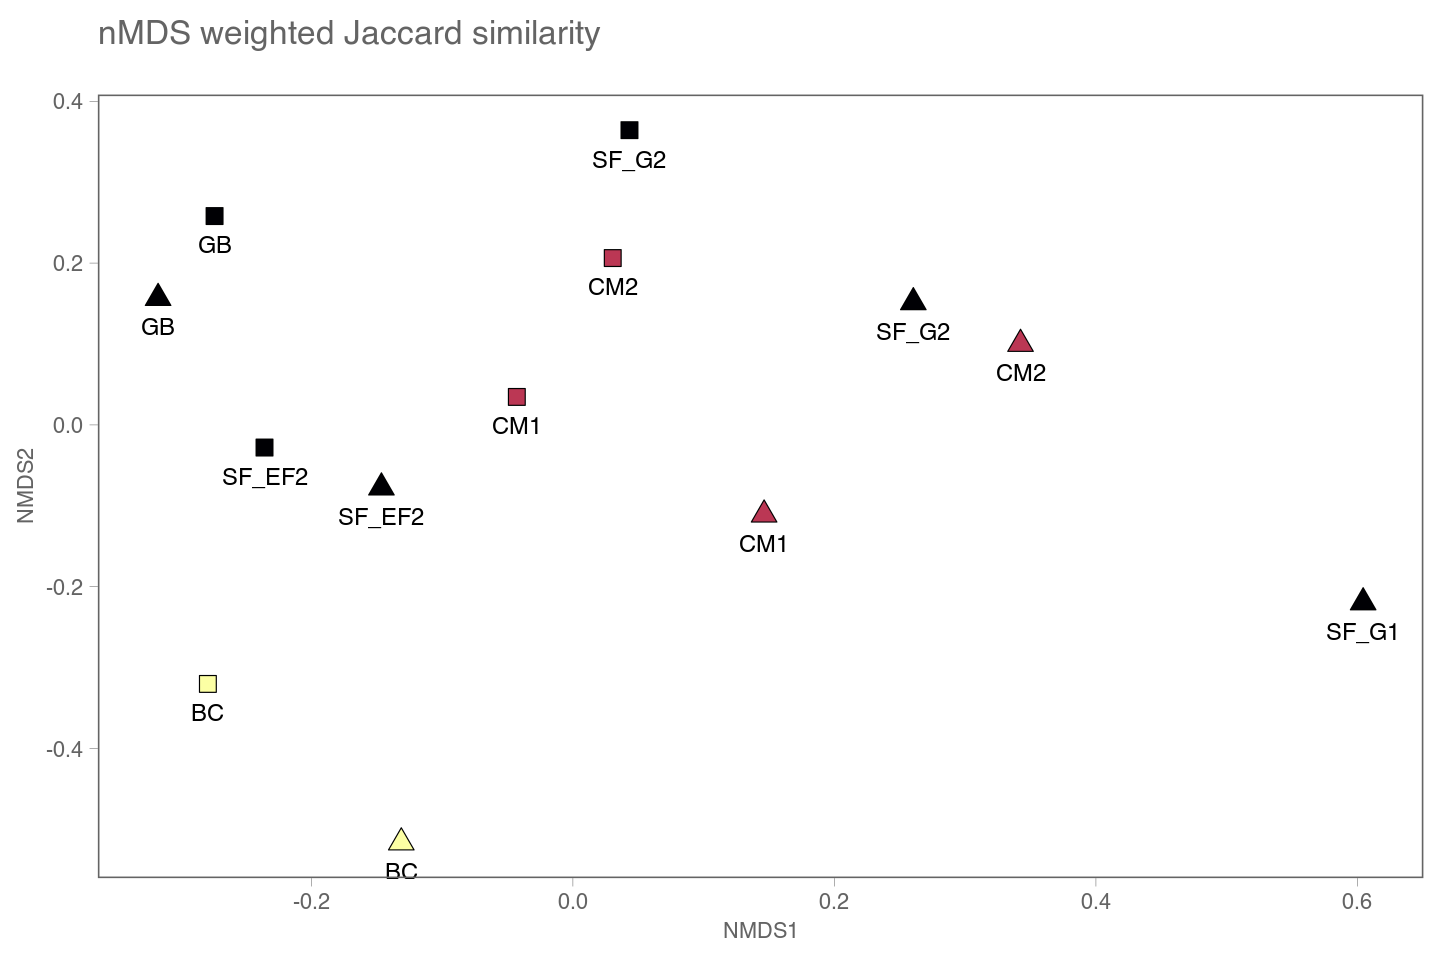

In [234]:
W <- nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
     
        geom_point(aes(fill = region,shape=type), size = 5, show.legend=NULL) +
    
        scale_fill_viridis(discrete=TRUE, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
        geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(title="nMDS weighted Jaccard similarity",
             subtitle="",
             shape="Sample type",
             fill="Region",
             x="NMDS1",
             y="NMDS2") +



        #xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab() + 

        theme(legend.position = "right")

nmds_jw_envfit

In [233]:
ggsave("test2.svg", width=12, height=8)

## Ordisurf on the weighted -  4 most significant variables

### PSU

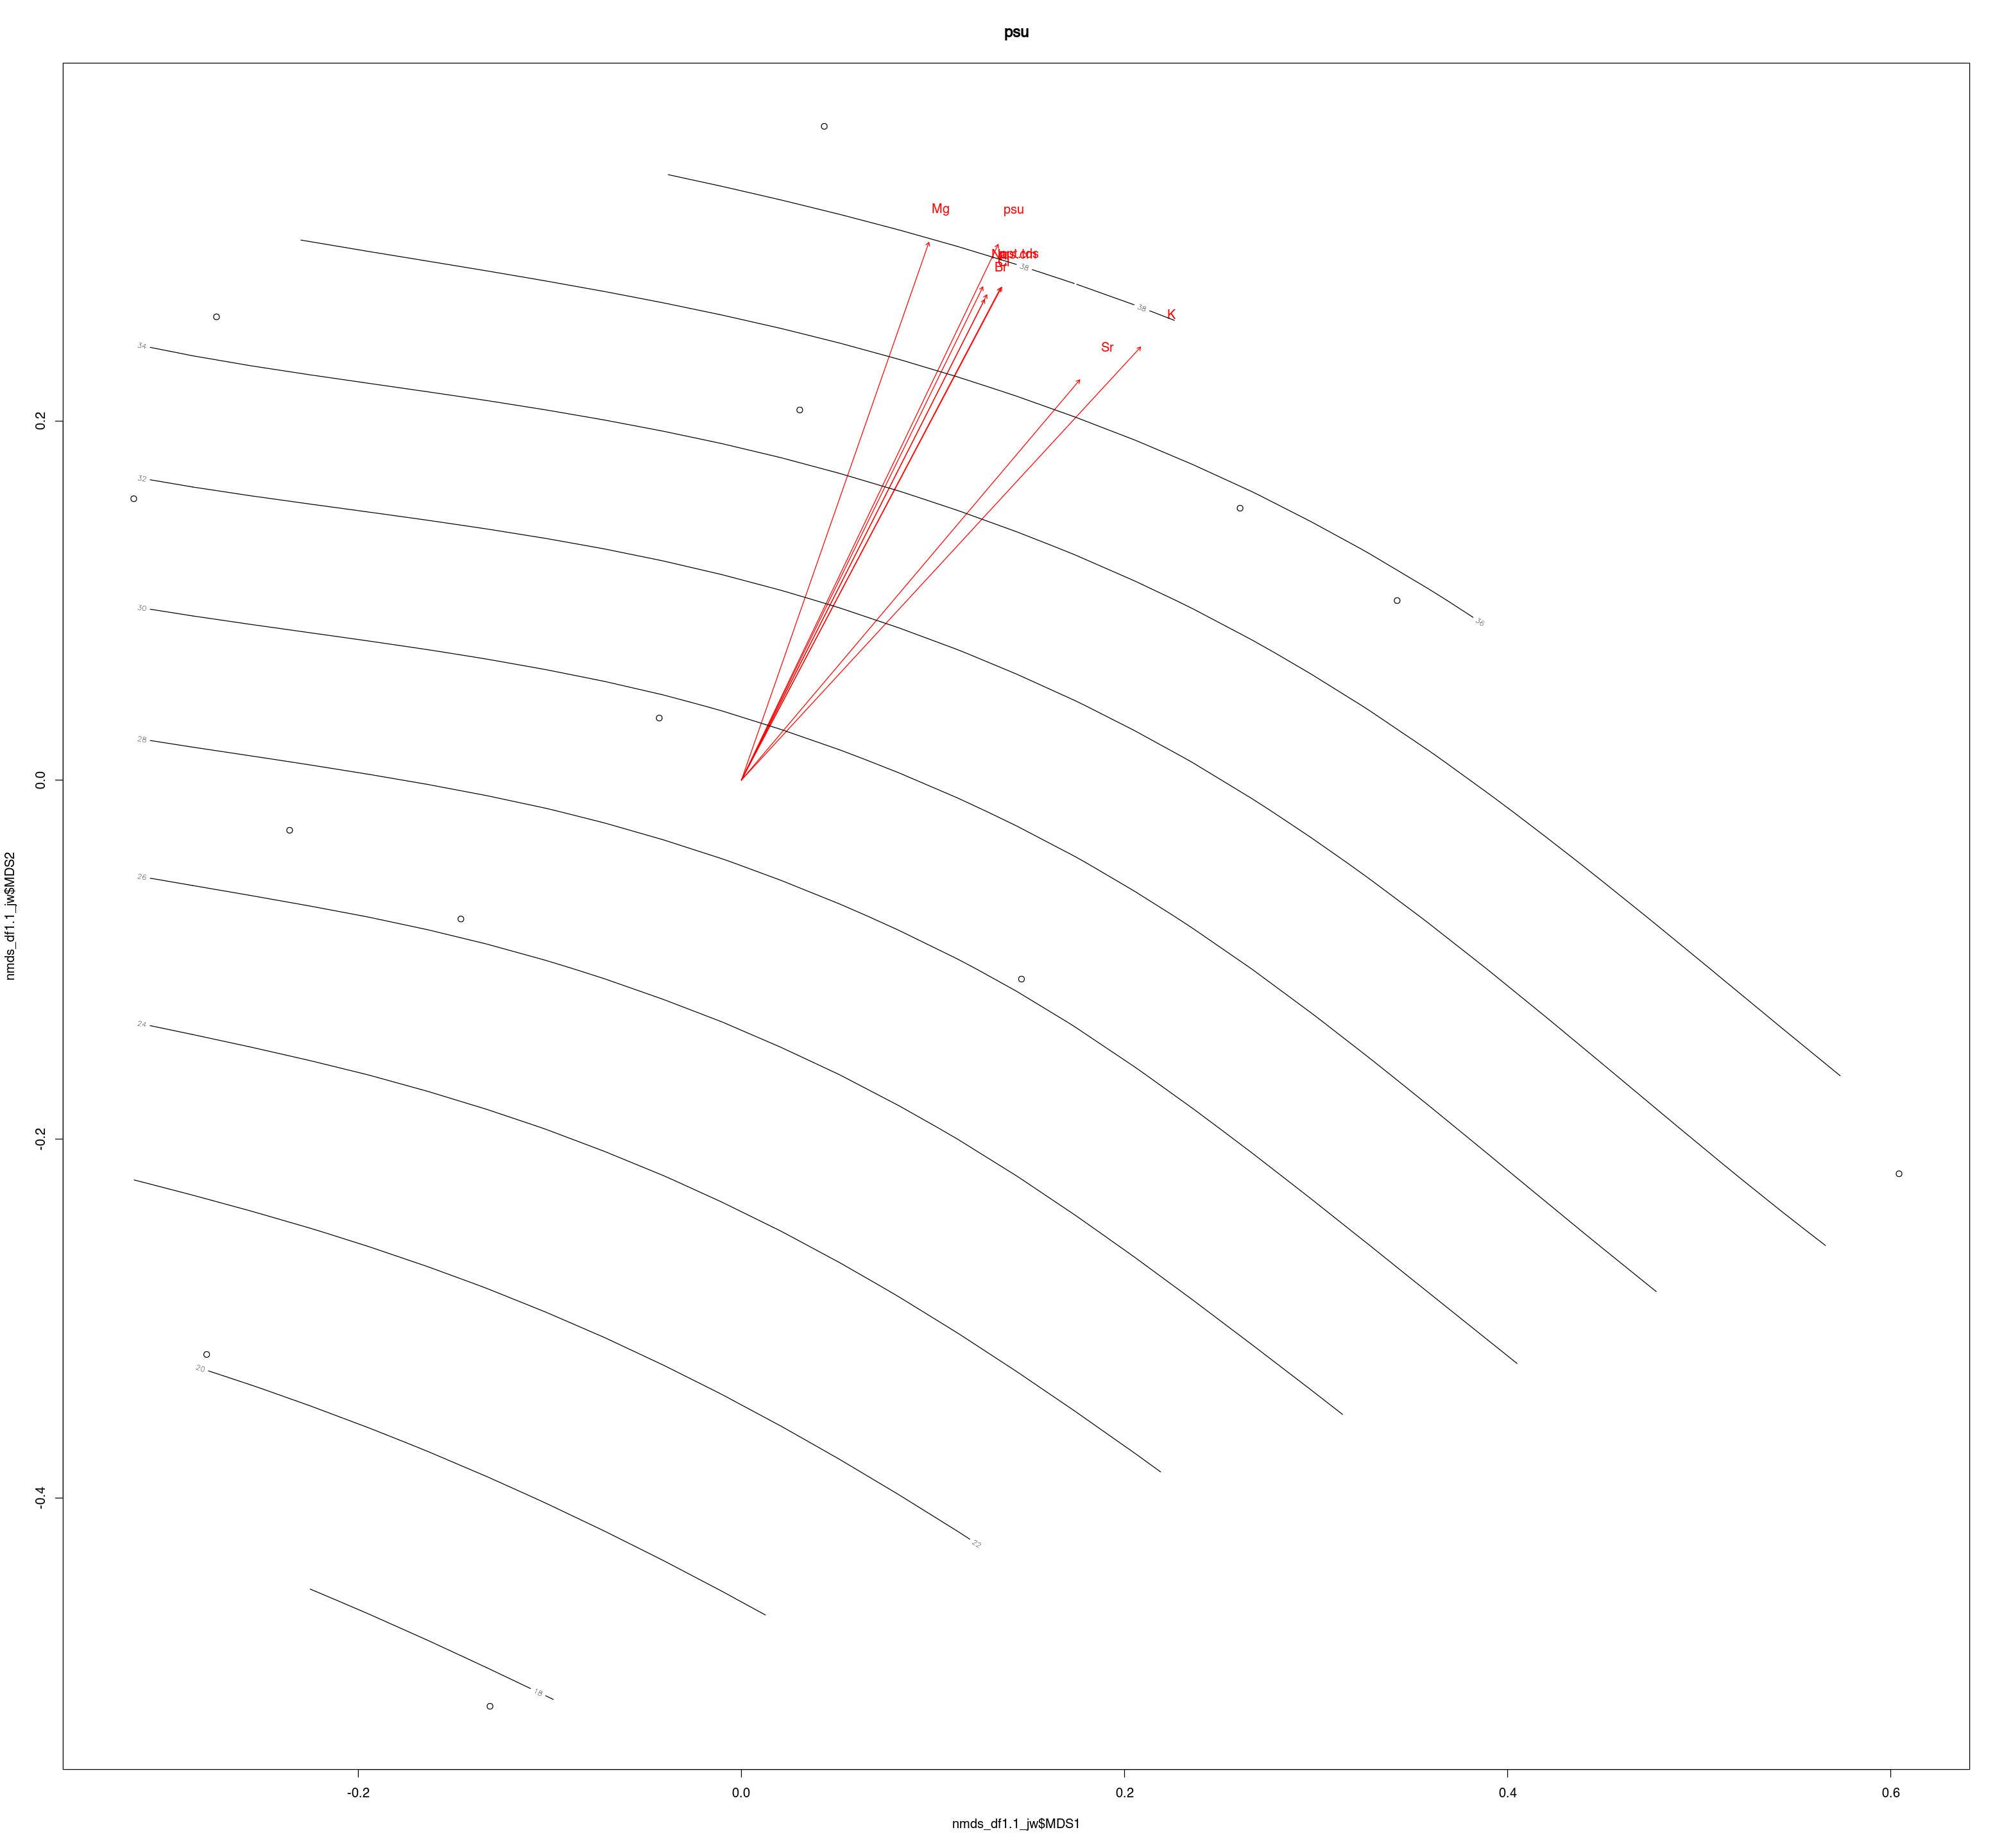

In [154]:
#PSU
env_ordsurf_psu<-ordisurf(prok_nmds_jw$points ~ psu, nmds_df1_jw, family=gaussian, plot = FALSE, scaling = 10, k=4)

plot(nmds_df1.1_jw$MDS1,nmds_df1.1_jw$MDS2, main = "psu")
plot(env_jw, p.max = 0.05, col = "red")
plot(env_ordsurf_psu, col = "black", add = TRUE)

In [155]:
ordi_grid <- env_ordsurf_psu$grid
str(ordi_grid)
ordi_mite <- expand.grid(x=ordi_grid$x, y=ordi_grid$y)
ordi_mite$z <- as.vector(ordi_grid$z)
ordi_mite_na <- data.frame(na.omit(ordi_mite))

List of 3
 $ x: num [1:31] -0.317 -0.287 -0.256 -0.225 -0.194 ...
 $ y: num [1:31] -0.516 -0.487 -0.457 -0.428 -0.399 ...
 $ z: num [1:31, 1:31] NA NA NA NA NA ...


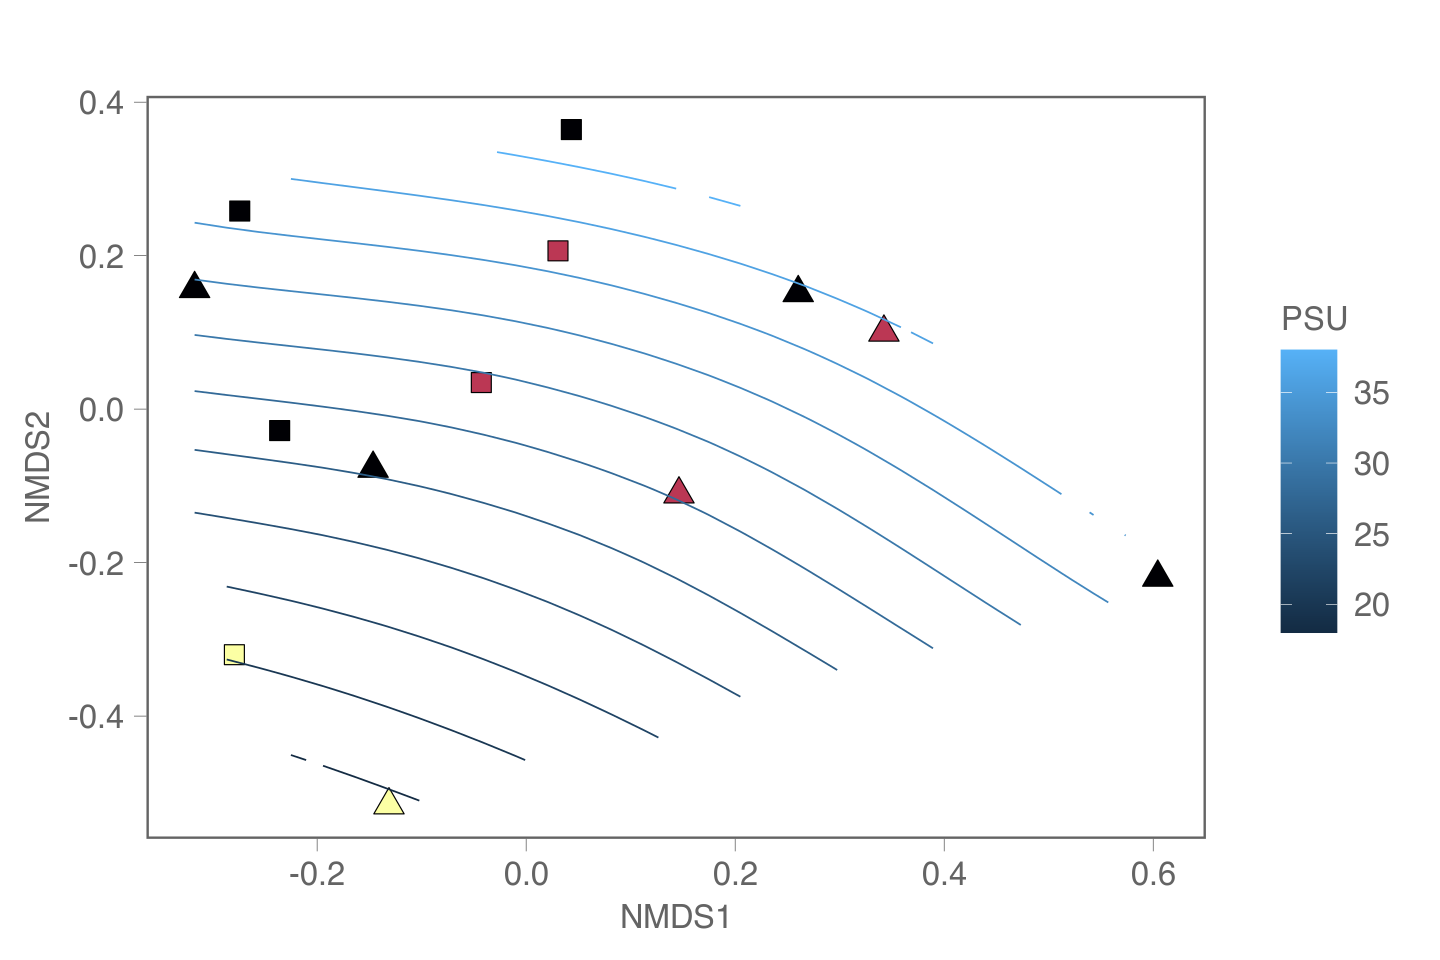

In [175]:
A <- nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
        geom_point(aes(fill = region,shape=type), size = 6, show.legend=FALSE) +
    
        scale_fill_viridis(discrete=TRUE, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 

     
        #geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) +
       
        labs(subtitle="",
             x="NMDS1",
             y="NMDS2") +

        #xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) +


        theme_glab(base_size = 30) + 


        #theme(legend.position = "right") +

        stat_contour(data=ordi_mite_na, aes(x=x, y=y, z=z, colour = after_stat(level)), position ='identity') + labs(color = "PSU", size=21) +
        
        theme(legend.key.size = unit(1.2, "cm")) 


nmds_jw_envfit

#ggsave("ordi_psu.svg", width=12, height=8)

### MS.CM

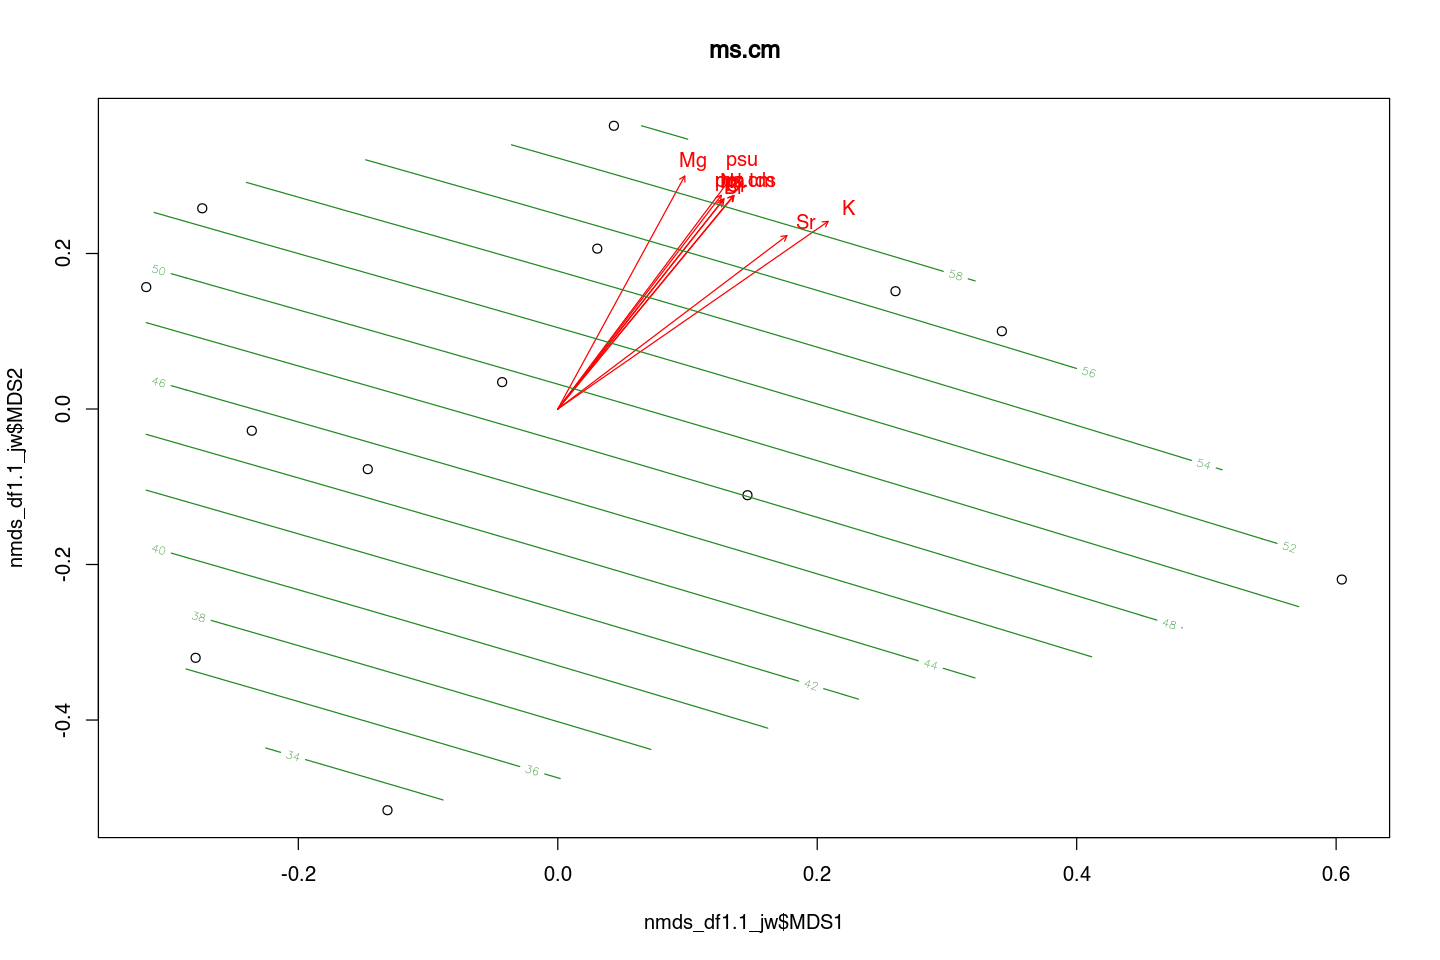

In [176]:
#ms.cm
env_ordsurf_ms_cm<-ordisurf(prok_nmds_jw$points ~ ms.cm, nmds_df1.1_jw, family=gaussian, plot = FALSE, scaling = 10, k=4)

plot(nmds_df1.1_jw$MDS1,nmds_df1.1_jw$MDS2, main = "ms.cm")
plot(env_jw, p.max = 0.05, col = "red")
plot(env_ordsurf_ms_cm, col = "forestgreen", add = TRUE)

In [177]:
ordi_grid <- env_ordsurf_ms_cm$grid
str(ordi_grid)
ordi_mite <- expand.grid(x=ordi_grid$x, y=ordi_grid$y)
ordi_mite$z <- as.vector(ordi_grid$z)
ordi_mite_na <- data.frame(na.omit(ordi_mite))

List of 3
 $ x: num [1:31] -0.317 -0.287 -0.256 -0.225 -0.194 ...
 $ y: num [1:31] -0.516 -0.487 -0.457 -0.428 -0.399 ...
 $ z: num [1:31, 1:31] NA NA NA NA NA ...


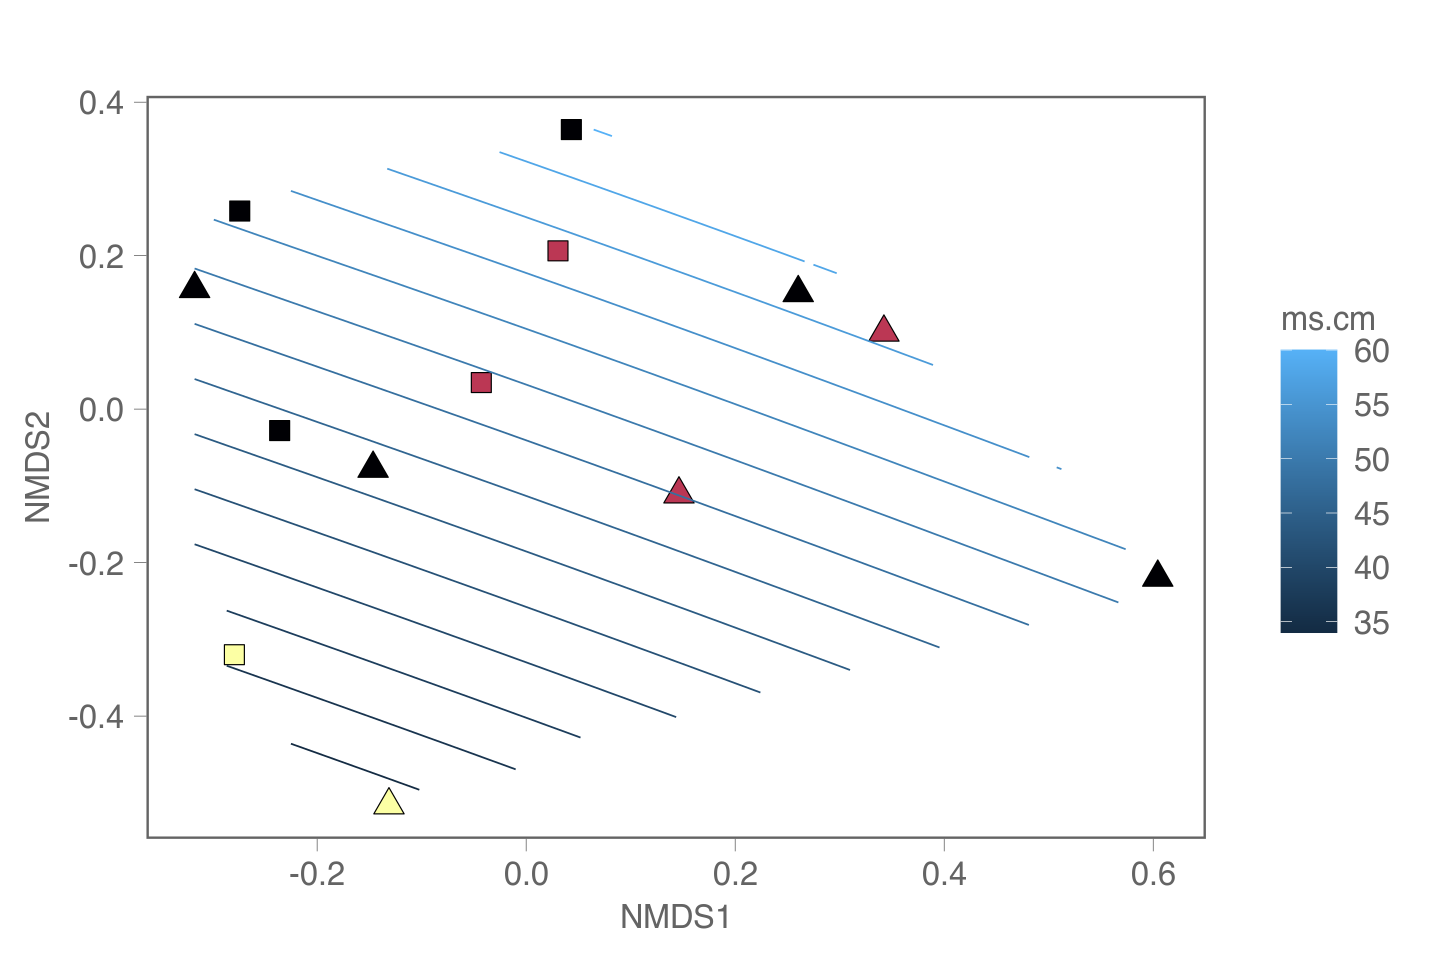

In [178]:
B <- nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
        geom_point(aes(fill = region,shape=type), size = 6, show.legend=FALSE) +
    
        scale_fill_viridis(discrete=TRUE, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
        #geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(subtitle="",
             shape="Sample type",
             fill="Region",
             x="NMDS1",
             y="NMDS2") +



        #xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab(base_size = 30) + 


        #theme(legend.position = "right") +

        stat_contour(data=ordi_mite_na, aes(x=x, y=y, z=z, colour = after_stat(level)), position ='identity') + labs(color = "ms.cm", size=21) +
        
        theme(legend.key.size = unit(1.2, "cm")) 

nmds_jw_envfit

#ggsave("ordi_mscm.svg", width=12, height=8)

### K

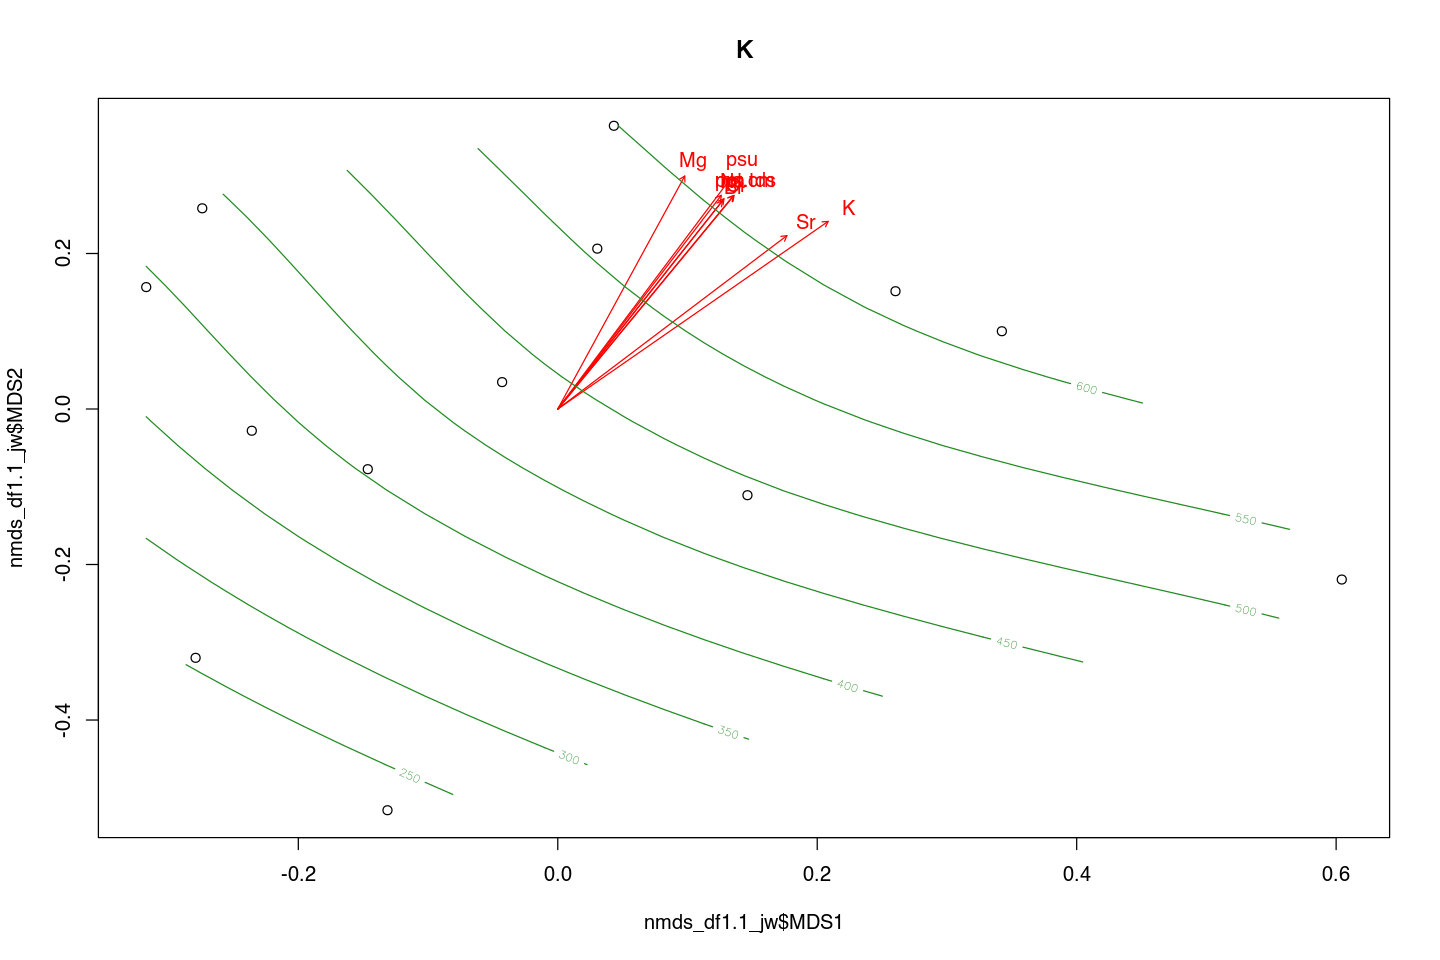

In [182]:
#ms.cm
env_ordsurf_k<-ordisurf(prok_nmds_jw$points ~ K, nmds_df1.1_jw, family=gaussian, plot = FALSE, scaling = 10, k=4)

plot(nmds_df1.1_jw$MDS1,nmds_df1.1_jw$MDS2, main = "K")
plot(env_jw, p.max = 0.05, col = "red")
plot(env_ordsurf_k, col = "forestgreen", add = TRUE)

In [183]:
ordi_grid <- env_ordsurf_k$grid
str(ordi_grid)
ordi_mite <- expand.grid(x=ordi_grid$x, y=ordi_grid$y)
ordi_mite$z <- as.vector(ordi_grid$z)
ordi_mite_na <- data.frame(na.omit(ordi_mite))

List of 3
 $ x: num [1:31] -0.317 -0.287 -0.256 -0.225 -0.194 ...
 $ y: num [1:31] -0.516 -0.487 -0.457 -0.428 -0.399 ...
 $ z: num [1:31, 1:31] NA NA NA NA NA ...


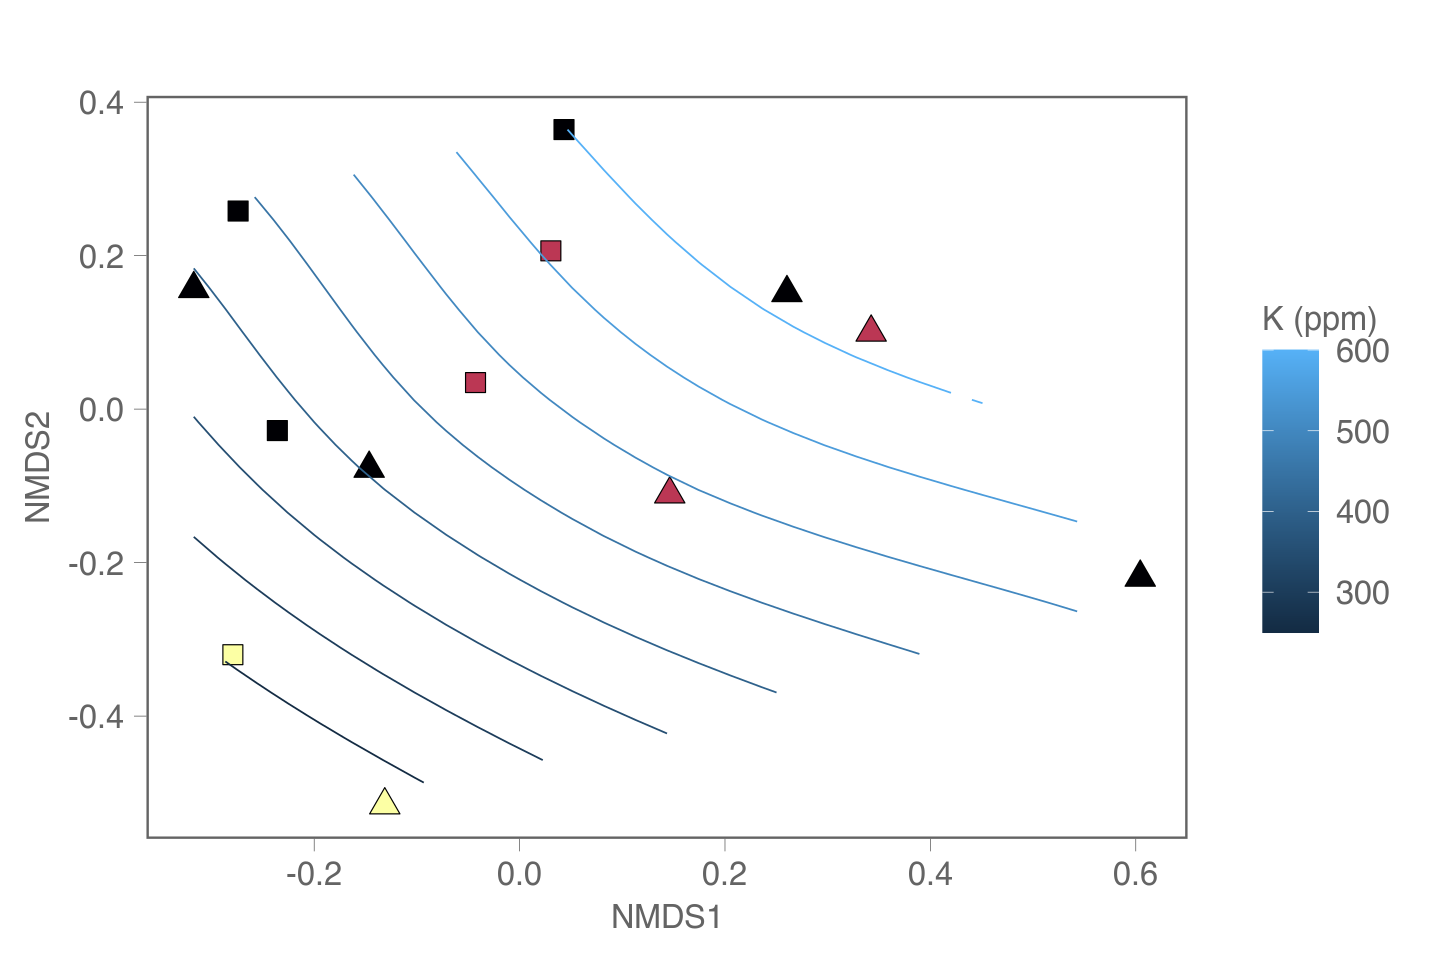

In [184]:
C <- nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
        geom_point(aes(fill = region,shape=type), size = 6, show.legend=FALSE) +
    
        scale_fill_viridis(discrete=TRUE, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
        #geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(subtitle="",
             shape="Sample type",
             fill="Region",
             x="NMDS1",
             y="NMDS2") +



        #xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
       theme_glab(base_size = 30) + 


        #theme(legend.position = "right") +

        stat_contour(data=ordi_mite_na, aes(x=x, y=y, z=z, colour = after_stat(level)), position ='identity') + labs(color = "K (ppm)", size=21) +
        
        theme(legend.key.size = unit(1.2, "cm")) 

nmds_jw_envfit

#ggsave("ordi_K.svg", width=12, height=8)

## Mg

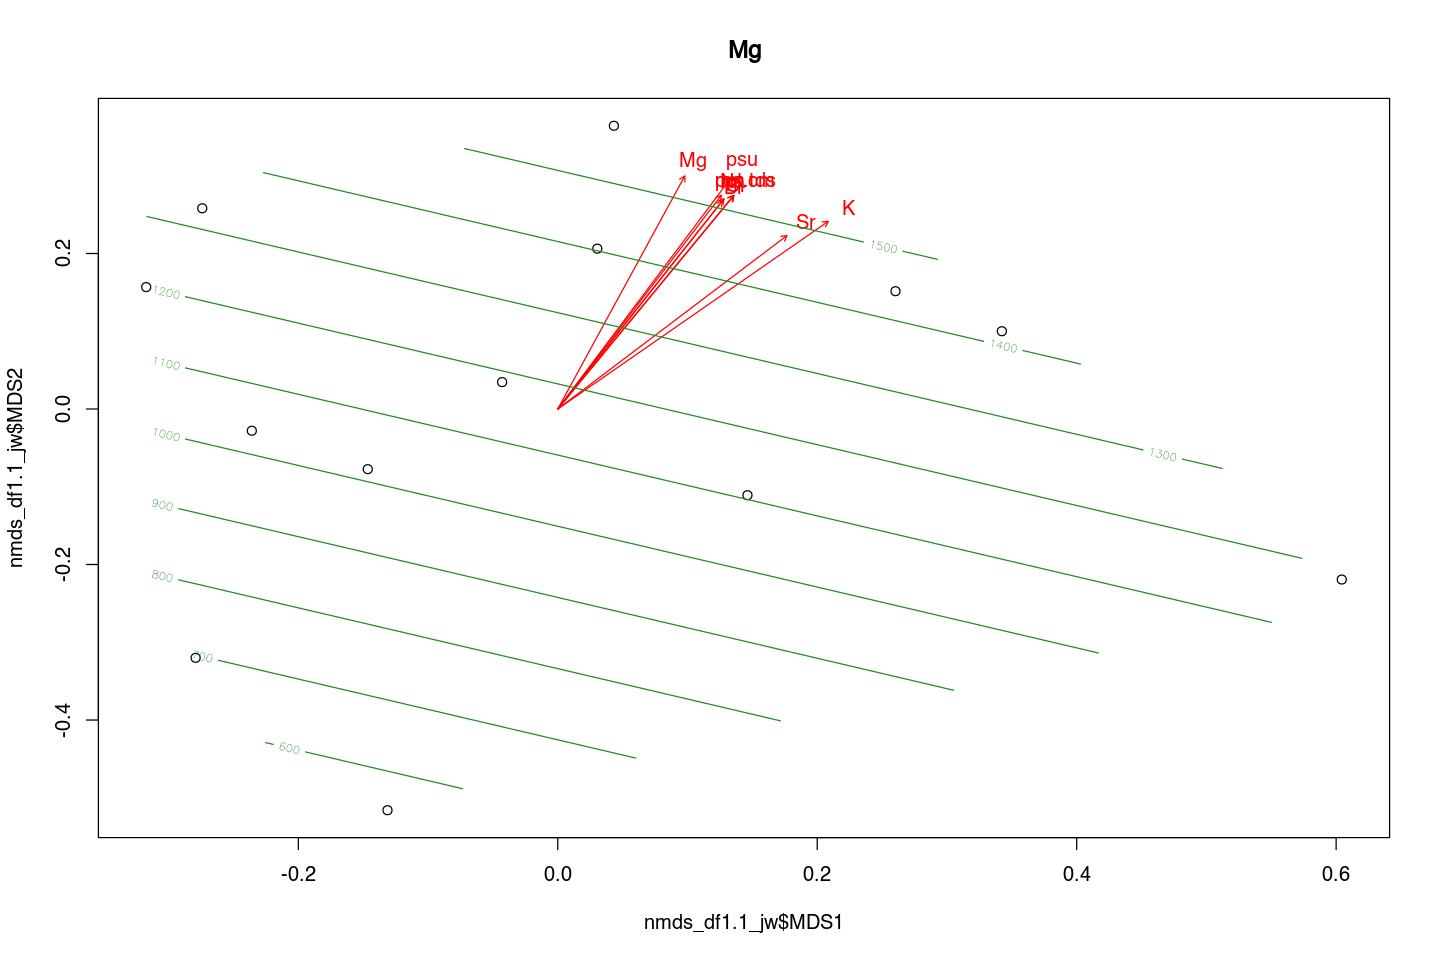

In [185]:
#ms.cm
env_ordsurf_mg<-ordisurf(prok_nmds_jw$points ~ Mg, nmds_df1.1_jw, family=gaussian, plot = FALSE, scaling = 10, k=4)

plot(nmds_df1.1_jw$MDS1,nmds_df1.1_jw$MDS2, main = "Mg")
plot(env_jw, p.max = 0.05, col = "red")
plot(env_ordsurf_mg, col = "forestgreen", add = TRUE)

In [186]:
ordi_grid <- env_ordsurf_mg$grid
str(ordi_grid)
ordi_mite <- expand.grid(x=ordi_grid$x, y=ordi_grid$y)
ordi_mite$z <- as.vector(ordi_grid$z)
ordi_mite_na <- data.frame(na.omit(ordi_mite))

List of 3
 $ x: num [1:31] -0.317 -0.287 -0.256 -0.225 -0.194 ...
 $ y: num [1:31] -0.516 -0.487 -0.457 -0.428 -0.399 ...
 $ z: num [1:31, 1:31] NA NA NA NA NA ...


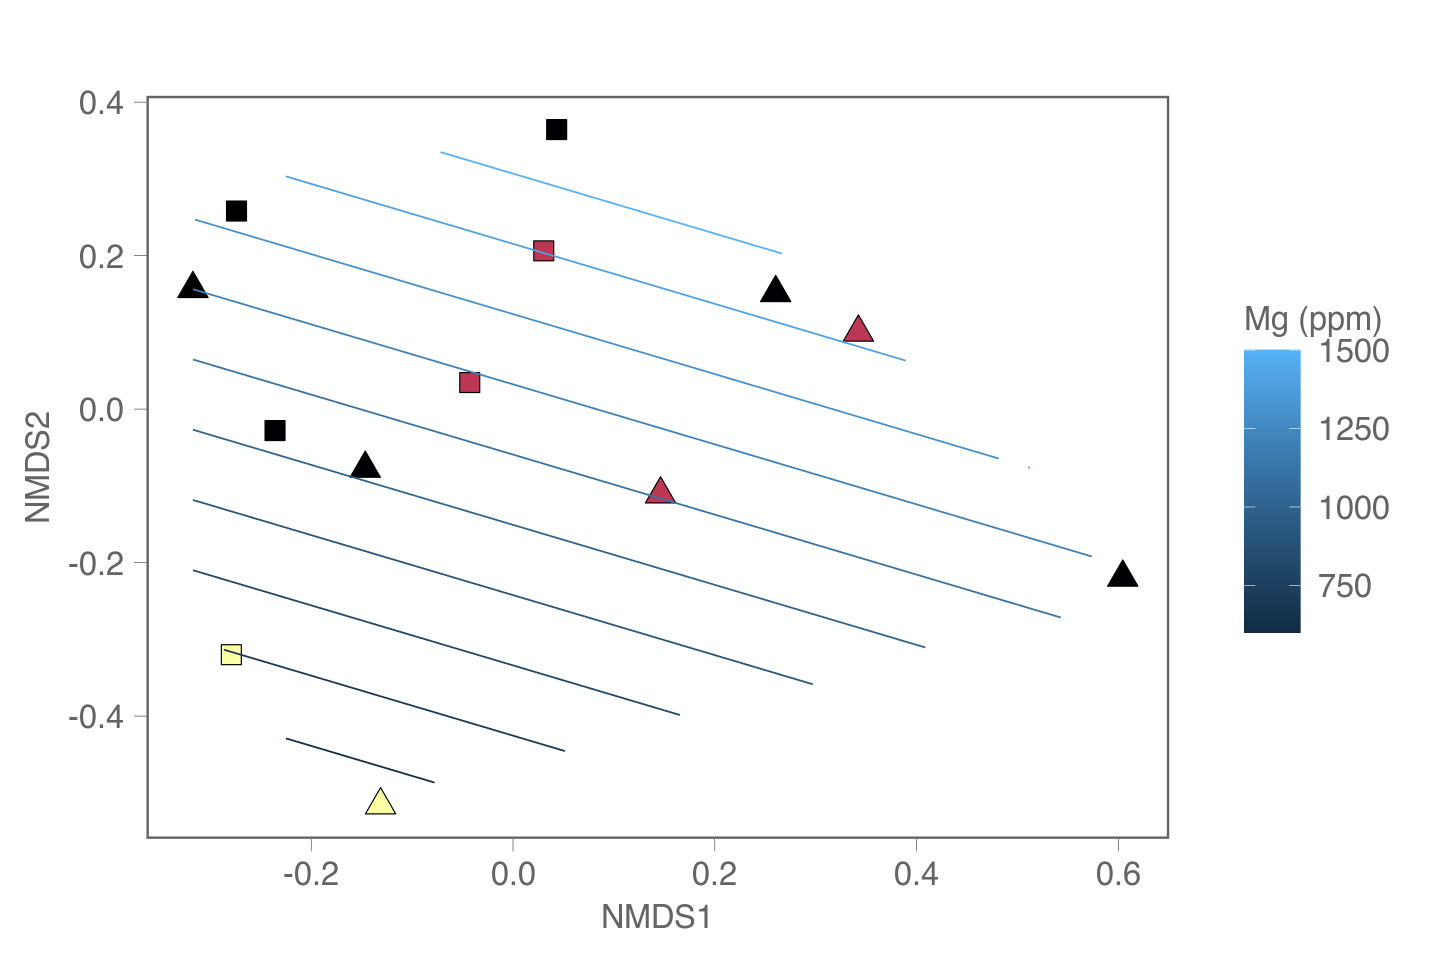

In [187]:
D <- nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
        geom_point(aes(fill = region,shape=type), size = 6, show.legend=FALSE) +
    
        scale_fill_viridis(discrete=TRUE, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
        #geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(subtitle="",
             shape="Sample type",
             fill="Region",
             x="NMDS1",
             y="NMDS2") +



        #xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
         
       theme_glab(base_size = 30) + 


        #theme(legend.position = "right") +

        stat_contour(data=ordi_mite_na, aes(x=x, y=y, z=z, colour = after_stat(level)), position ='identity') + labs(color = "Mg (ppm)", size=21) +
        
        theme(legend.key.size = unit(1.2, "cm")) 

nmds_jw_envfit

#ggsave("ordi_mg.svg", width=12, height=8)

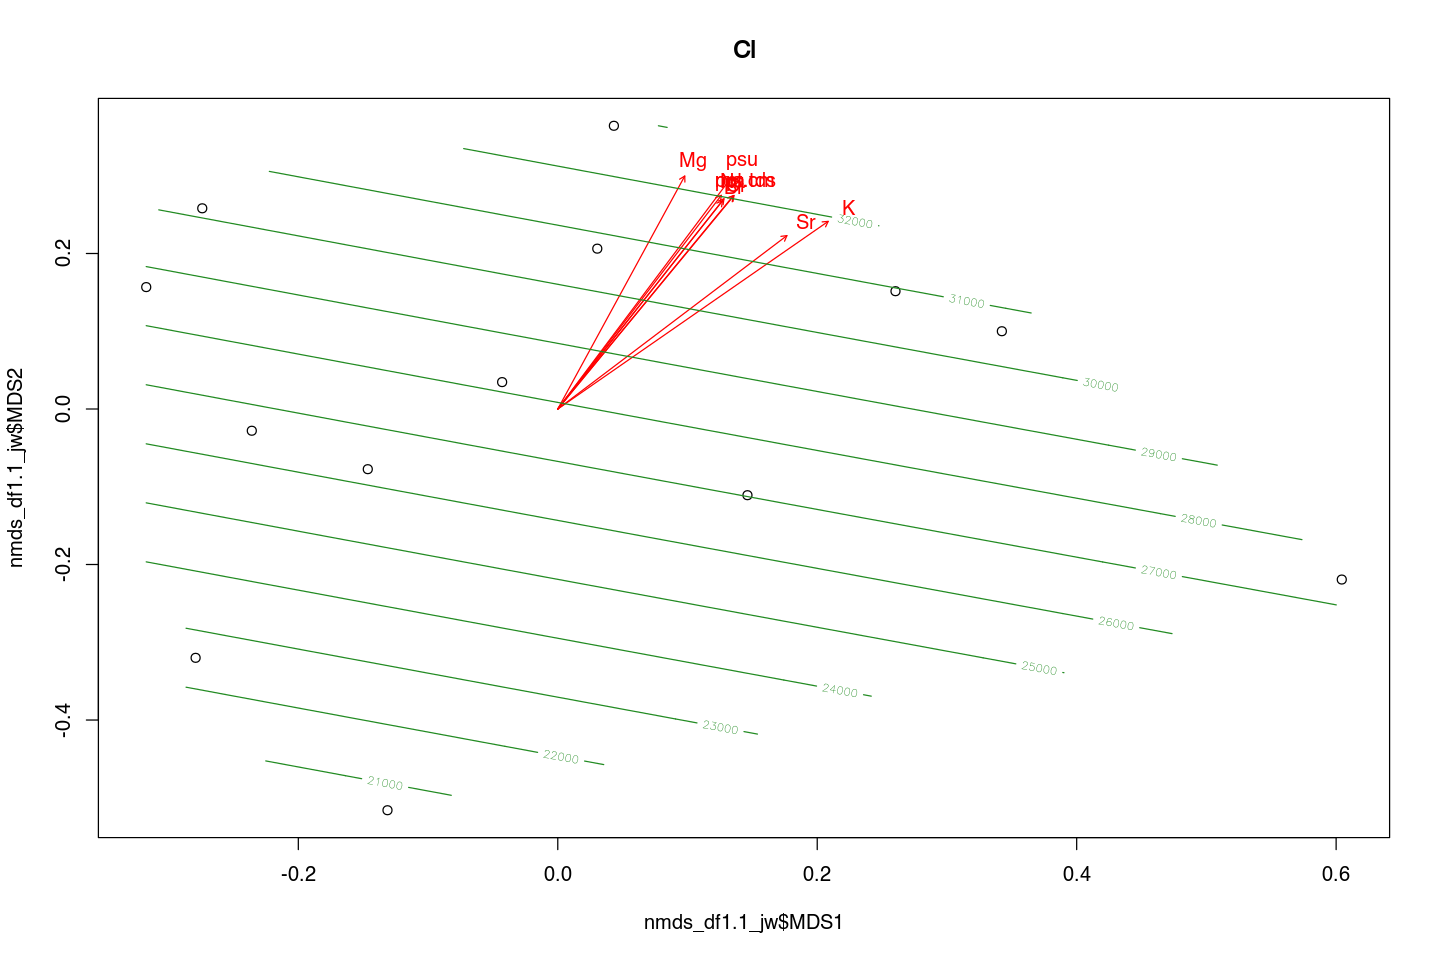

In [188]:
#Cl
env_ordsurf_Cl<-ordisurf(prok_nmds_jw$points ~ Cl, nmds_df1.1_jw, family=gaussian, plot = FALSE, scaling = 10, k=4)

plot(nmds_df1.1_jw$MDS1,nmds_df1.1_jw$MDS2, main = "Cl")
plot(env_jw, p.max = 0.05, col = "red")
plot(env_ordsurf_Cl, col = "forestgreen", add = TRUE)

In [189]:
ordi_grid <- env_ordsurf_Cl$grid
str(ordi_grid)
ordi_mite <- expand.grid(x=ordi_grid$x, y=ordi_grid$y)
ordi_mite$z <- as.vector(ordi_grid$z)
ordi_mite_na <- data.frame(na.omit(ordi_mite))

List of 3
 $ x: num [1:31] -0.317 -0.287 -0.256 -0.225 -0.194 ...
 $ y: num [1:31] -0.516 -0.487 -0.457 -0.428 -0.399 ...
 $ z: num [1:31, 1:31] NA NA NA NA NA ...


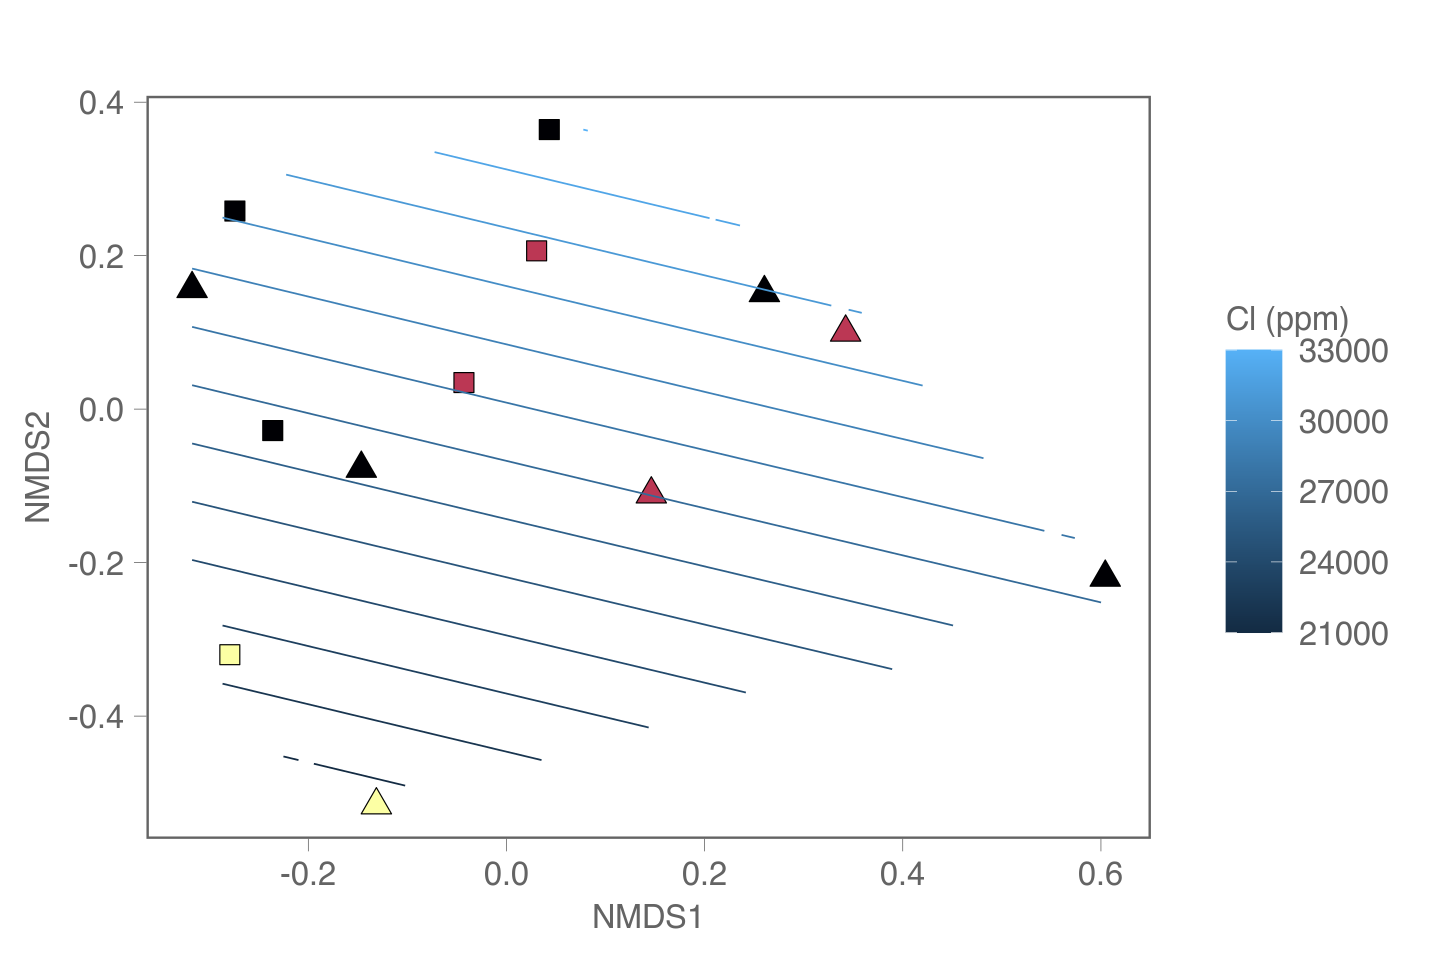

In [190]:
E <- nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
        geom_point(aes(fill = region,shape=type), size = 6, show.legend=FALSE) +
    
        scale_fill_viridis(discrete=TRUE, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
        #geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(subtitle="",
             shape="Sample type",
             fill="Region",
             x="NMDS1",
             y="NMDS2") +



        #xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab(base_size = 30) + 

        #theme(legend.position = "right") +

        stat_contour(data=ordi_mite_na, aes(x=x, y=y, z=z, colour = after_stat(level)), position ='identity') + labs(color = "Cl (ppm)", size=21) +
        
        theme(legend.key.size = unit(1.2, "cm")) 
nmds_jw_envfit

#ggsave("ordi_cl.svg", width=12, height=8)

## ppt.tds

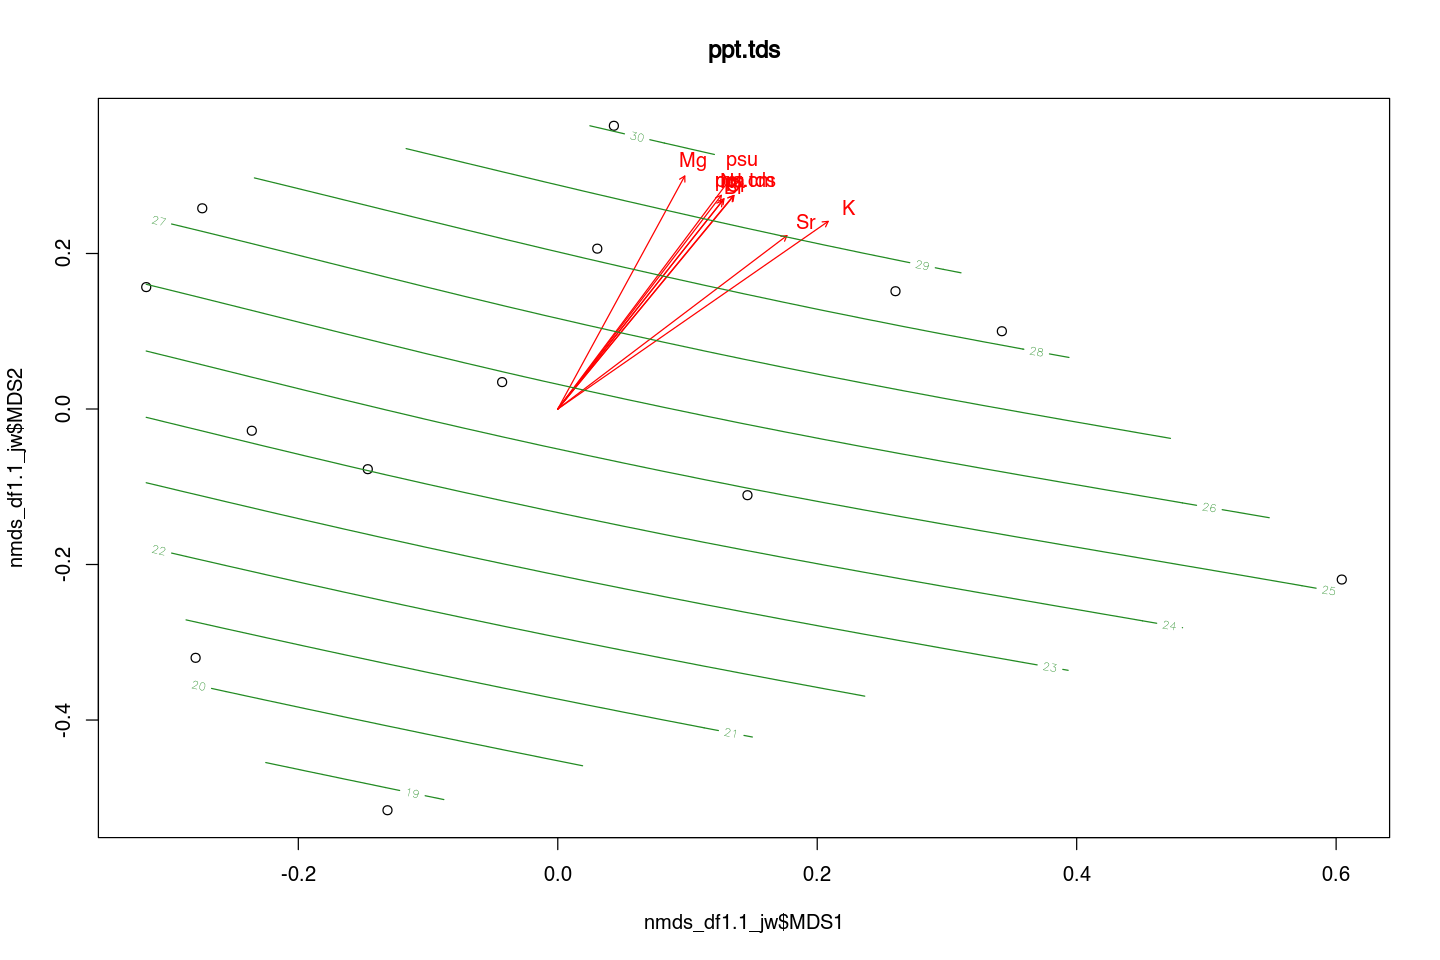

In [191]:
env_ordsurf_ppt_tds<-ordisurf(prok_nmds_jw$points ~ ppt.tds, nmds_df1.1_jw, family=gaussian, plot = FALSE, scaling = 10, k=4)

plot(nmds_df1.1_jw$MDS1,nmds_df1.1_jw$MDS2, main = "ppt.tds")
plot(env_jw, p.max = 0.05, col = "red")
plot(env_ordsurf_ppt_tds, col = "forestgreen", add = TRUE)

In [192]:
ordi_grid <- env_ordsurf_ppt_tds$grid
str(ordi_grid)
ordi_mite <- expand.grid(x=ordi_grid$x, y=ordi_grid$y)
ordi_mite$z <- as.vector(ordi_grid$z)
ordi_mite_na <- data.frame(na.omit(ordi_mite))

List of 3
 $ x: num [1:31] -0.317 -0.287 -0.256 -0.225 -0.194 ...
 $ y: num [1:31] -0.516 -0.487 -0.457 -0.428 -0.399 ...
 $ z: num [1:31, 1:31] NA NA NA NA NA ...


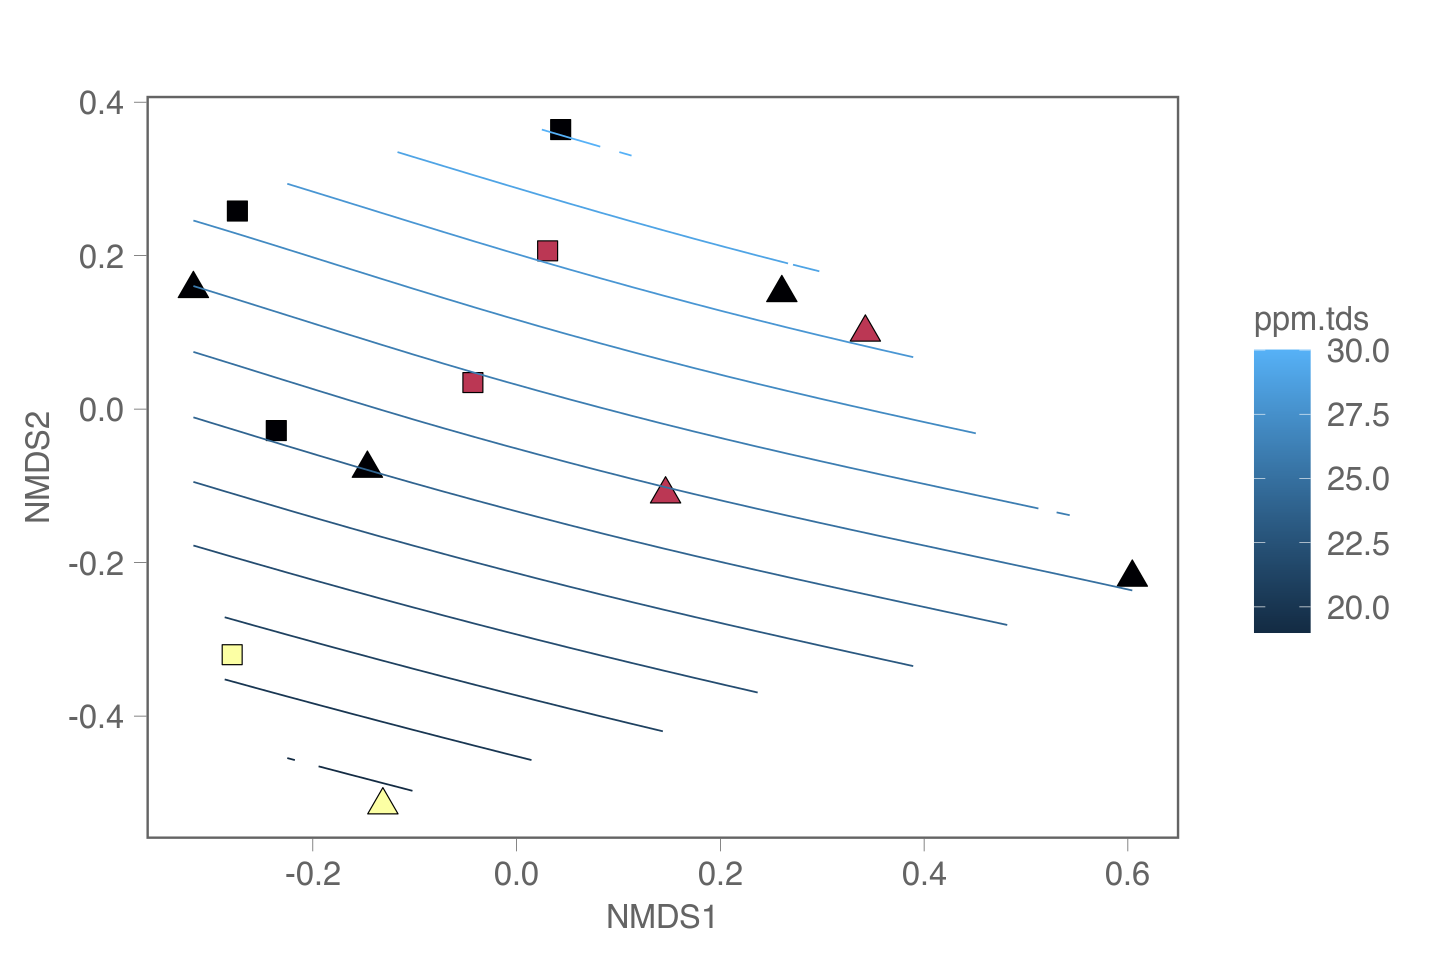

In [194]:
F <- nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
        geom_point(aes(fill = region,shape=type), size = 6 , show.legend=FALSE) +
    
        scale_fill_viridis(discrete=TRUE, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
        #geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(subtitle="",
             shape="Sample type",
             fill="Region",
             x="NMDS1",
             y="NMDS2") +



        #xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab(base_size = 30) + 

        #theme(legend.position = "right") +

        stat_contour(data=ordi_mite_na, aes(x=x, y=y, z=z, colour = after_stat(level)), position ='identity') + labs(color = "ppm.tds", size=21) +
        
        theme(legend.key.size = unit(1.2, "cm")) 

nmds_jw_envfit

#ggsave("ordi_ppttds.svg", width=12, height=8)

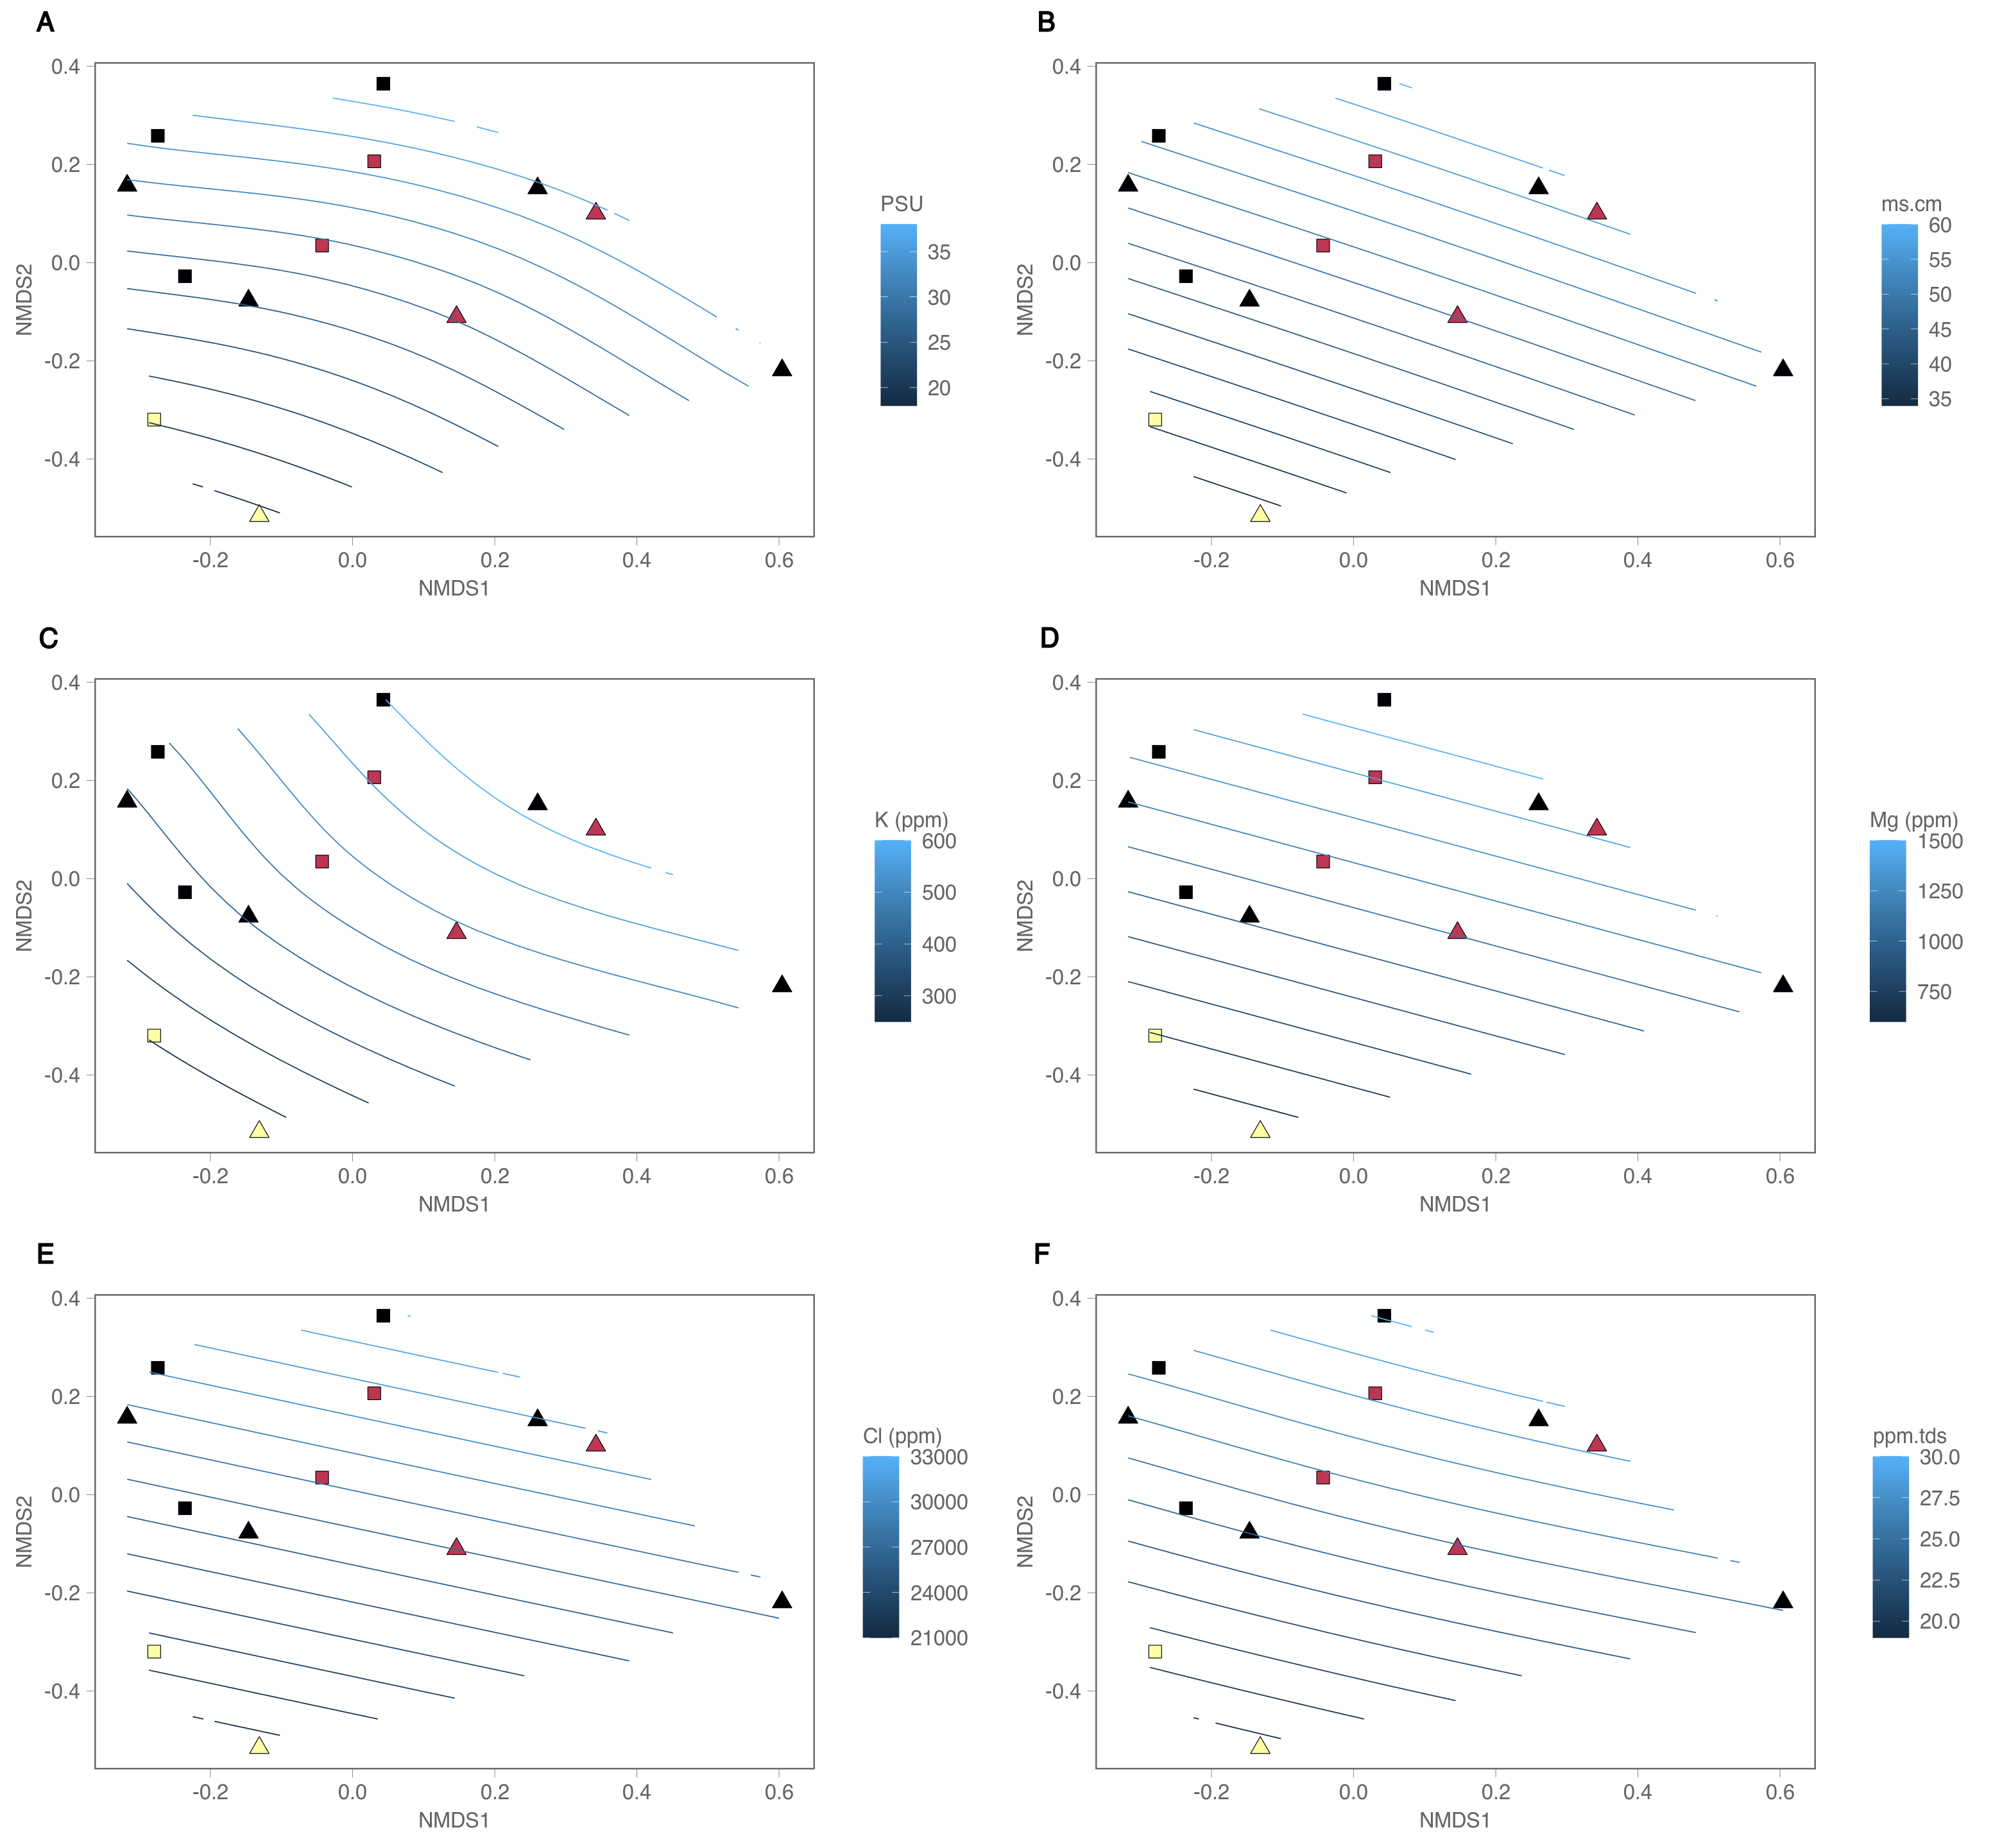

In [195]:
options(repr.plot.width=26, repr.plot.height=24)

ggarrange(A, B, 
          C, D,
          E, F, 
          labels=c("A", "B", "C", "D", "E", "F"), hjust=-2, 
          font.label = list(size = 25),
          nrow=3,
          ncol=2,
          common.legend = FALSE,
          widths=8,
          heights=8,
          align="hv"
          )

ggsave("ordisurf_weighted.svg", width = 26, height = 24) 

## Unweighted Jaccard

In [297]:
prok_nmds_juw <- ordinate(prok_ndata_no_b,prok_dist_unjac, method = "NMDS",trymax=100)

Run 0 stress 0.1518495 
Run 1 stress 0.1742975 
Run 2 stress 0.1518495 
... Procrustes: rmse 4.804375e-06  max resid 8.925883e-06 
... Similar to previous best
Run 3 stress 0.1518495 
... Procrustes: rmse 1.5657e-05  max resid 3.085909e-05 
... Similar to previous best
Run 4 stress 0.1498177 
... New best solution
... Procrustes: rmse 0.2273659  max resid 0.4438417 
Run 5 stress 0.1600944 
Run 6 stress 0.1498193 
... Procrustes: rmse 0.003246346  max resid 0.00611683 
... Similar to previous best
Run 7 stress 0.2215103 
Run 8 stress 0.167297 
Run 9 stress 0.1861289 
Run 10 stress 0.1498183 
... Procrustes: rmse 0.0005829592  max resid 0.001258185 
... Similar to previous best
Run 11 stress 0.1518495 
Run 12 stress 0.1600944 
Run 13 stress 0.1498195 
... Procrustes: rmse 0.003362971  max resid 0.006341788 
... Similar to previous best
Run 14 stress 0.1498194 
... Procrustes: rmse 0.003351364  max resid 0.006312047 
... Similar to previous best
Run 15 stress 0.1518495 
Run 16 stress 0.16

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


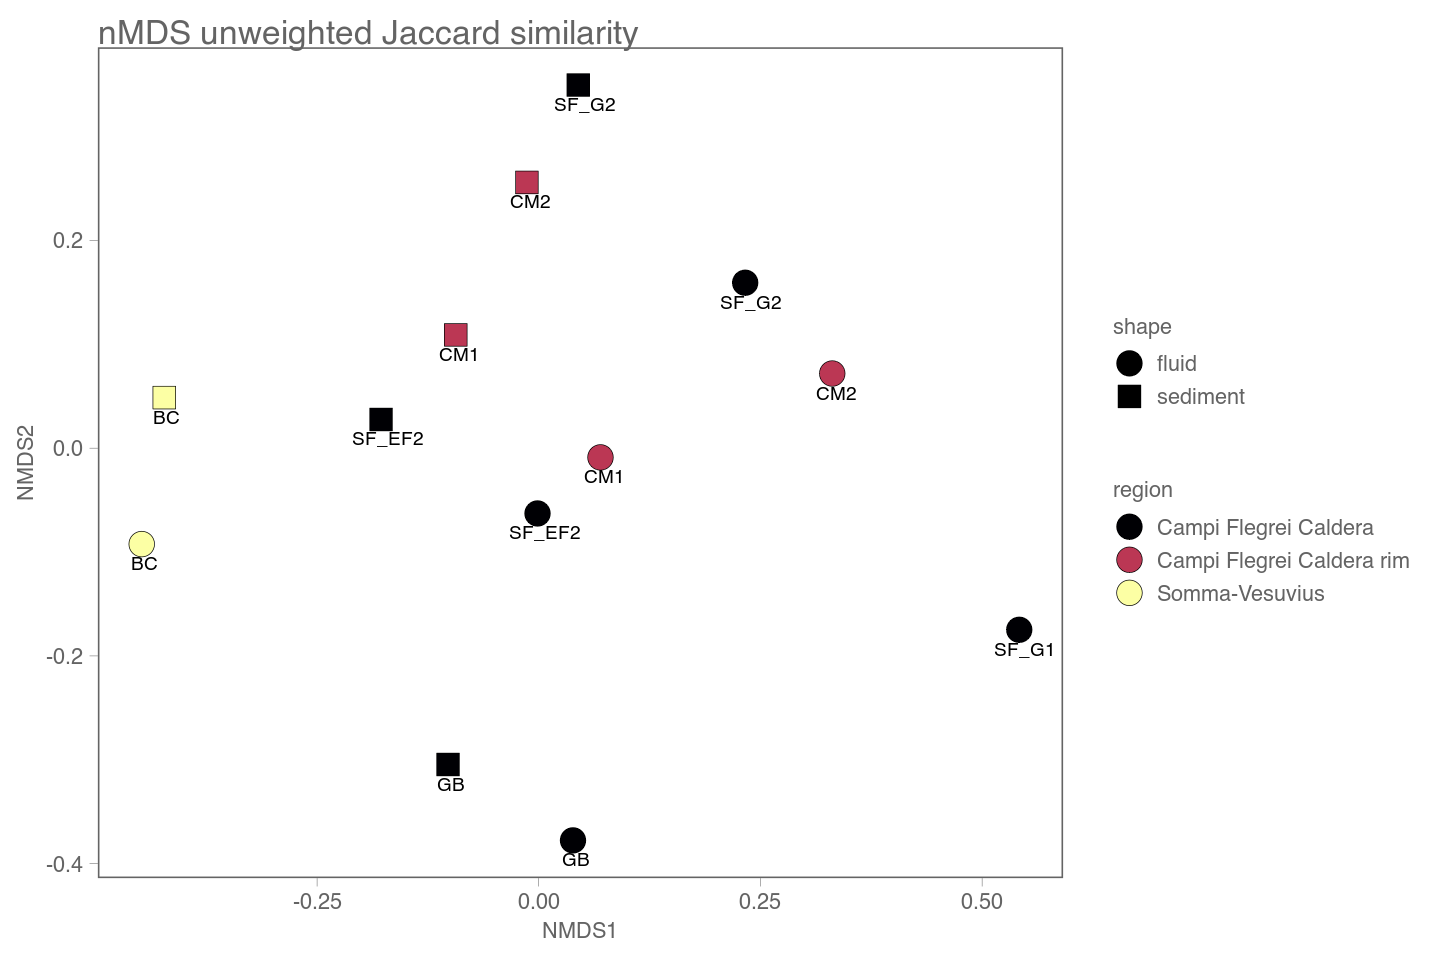

In [298]:
# nmds unweighted jaccard
plot_ordination(prok_ndata_no_b, prok_nmds_juw, type="samples",title="nMDS unweighted Jaccard similarity") +

        geom_point(aes(fill=region,shape=type),size=7,color="black",stroke=0.3) + 

        geom_text(aes(label= code), size=4, hjust=0.4,vjust=2) + 

        scale_fill_viridis(discrete=TRUE, option='inferno') + scale_shape_manual(values=c(21:23)) +

        theme_glab() + theme(legend.position = "right") +

        guides(fill = guide_legend(override.aes = list(shape = 21) ),
              shape = guide_legend(override.aes = list(fill = "black")))

ggsave("nmds_geochem_unw.svg", width=12, height=8)

## Vector Fitting Unweighted Jaccard

In [311]:
nmds_df1_juw <- cbind(sample_data(prok_ndata_no_b),prok_nmds_juw$points)
nmds_df1_juw

code   location       type     region                    lat      long    
1  CM1    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
16 CM1    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
11 CM2    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
13 CM2    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
17 GB     Gulf of Naples fluid    Campi Flegrei Caldera     40.82375 14.07890
F  GB     Gulf of Naples sediment Campi Flegrei Caldera     40.82375 14.07890
10 SF_EF2 Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
18 SF_EF2 Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
14 SF_G1  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
12 SF_G2  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
9  SF_G2  Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
15 BC     Gulf of Naples fluid    Somma-Vesuvius            40.68858 14.45475
A  BC     Gulf of Naples sediment Somma-Vesuvius            40.68858 14.45475
   depth temp psu   do   ⋯ Mn       Fe        Zn       As       Rb      
1   7.0  26.3 27.54 55.0 ⋯ 0.061217  0.113124 0.456657 0.021972 0.157602
16  7.0  26.3 27.54 55.0 ⋯ 0.061217  0.113124 0.456657 0.021972 0.157602
11  8.3  27.0 38.37 92.0 ⋯ 0.003700  0.011037 0.033080 0.020202 0.147709
13  8.3  27.0 38.37 92.0 ⋯ 0.003700  0.011037 0.033080 0.020202 0.147709
17  5.4  28.0 35.41 43.0 ⋯ 3.099014 11.123430 0.170947 0.512667 3.237141
F   5.4  28.0 35.41 43.0 ⋯ 3.099014 11.123430 0.170947 0.512667 3.237141
10 10.0  34.0 26.50 75.0 ⋯ 0.007141  0.033976 0.023478 0.010740 0.145538
18 10.0  34.0 26.50 75.0 ⋯ 0.007141  0.033976 0.023478 0.010740 0.145538
14 13.3  71.0 34.06 50.8 ⋯ 1.183603  3.590772 0.186116 1.908748 2.430386
12 12.9  68.9 34.50 51.8 ⋯ 1.131211  3.361098 0.047900 2.446793 2.424394
9  12.9  68.9 34.50 51.8 ⋯ 1.131211  3.361098 0.047900 2.446793 2.424394
15  0.2  26.4 17.65 53.7 ⋯ 0.047346  0.097862 0.193533 0.011163 0.120608
A   0.2  26.4 17.65 53.7 ⋯ 0.047346  0.097862 0.193533 0.011163 0.120608
   Sr        Mo       Cs       MDS1         MDS2        
1  11.402800 0.010804 0.002033 -0.093581588  0.108934026
16 11.402800 0.010804 0.002033  0.069616111 -0.008928942
11 10.231950 0.011593 0.005425 -0.013388724  0.255665064
13 10.231950 0.011593 0.005425  0.331001721  0.071766909
17 11.487620 0.000985 0.170143  0.038612233 -0.377491493
F  11.487620 0.000985 0.170143 -0.102286654 -0.304481192
10 10.712230 0.011988 0.004302 -0.177795392  0.027551204
18 10.712230 0.011988 0.004302 -0.001393384 -0.062895732
14 13.262330 0.001486 1.729868  0.541880674 -0.174841926
12 13.074010 0.002394 1.645036  0.232805787  0.159129879
9  13.074010 0.002394 1.645036  0.044600624  0.349376907
15  8.110929 0.000000 0.006474 -0.447754464 -0.092375210
A   8.110929 0.000000 0.006474 -0.422316946  0.048590507

In [310]:
nmds_df1.1_juw <- nmds_df1_juw[,8:33]
nmds_df1.1_juw

temp psu   do   orp    ph   ms.cm mVph ppt.tds Cl       Br    ⋯ Mn      
1  26.3 27.54 55.0 -115.4 5.87 56.58 55.6 28.35   31498.70 75.13 ⋯ 0.061217
16 26.3 27.54 55.0 -115.4 5.87 56.58 55.6 28.35   31498.70 75.13 ⋯ 0.061217
11 27.0 38.37 92.0   54.2 6.30 57.54 46.5 28.76   31011.94 74.75 ⋯ 0.003700
13 27.0 38.37 92.0   54.2 6.30 57.54 46.5 28.76   31011.94 74.75 ⋯ 0.003700
17 28.0 35.41 43.0 -145.2 5.33 53.64 83.5 26.80   29581.00 70.63 ⋯ 3.099014
F  28.0 35.41 43.0 -145.2 5.33 53.64 83.5 26.80   29581.00 70.63 ⋯ 3.099014
10 34.0 26.50 75.0 -173.0 5.25    NA 90.0 28.50   31973.57 74.70 ⋯ 0.007141
18 34.0 26.50 75.0 -173.0 5.25    NA 90.0 28.50   31973.57 74.70 ⋯ 0.007141
14 71.0 34.06 50.8 -159.0 5.45 51.80 77.8 25.90   28225.83 67.24 ⋯ 1.183603
12 68.9 34.50 51.8 -142.0 5.61 52.00 70.0 26.10   28245.38 66.60 ⋯ 1.131211
9  68.9 34.50 51.8 -142.0 5.61 52.00 70.0 26.10   28245.38 66.60 ⋯ 1.131211
15 26.4 17.65 53.7 -226.2 6.30 28.66 30.5 14.31   14820.82 35.59 ⋯ 0.047346
A  26.4 17.65 53.7 -226.2 6.30 28.66 30.5 14.31   14820.82 35.59 ⋯ 0.047346
   Fe        Zn       As       Rb       Sr        Mo       Cs      
1   0.113124 0.456657 0.021972 0.157602 11.402800 0.010804 0.002033
16  0.113124 0.456657 0.021972 0.157602 11.402800 0.010804 0.002033
11  0.011037 0.033080 0.020202 0.147709 10.231950 0.011593 0.005425
13  0.011037 0.033080 0.020202 0.147709 10.231950 0.011593 0.005425
17 11.123430 0.170947 0.512667 3.237141 11.487620 0.000985 0.170143
F  11.123430 0.170947 0.512667 3.237141 11.487620 0.000985 0.170143
10  0.033976 0.023478 0.010740 0.145538 10.712230 0.011988 0.004302
18  0.033976 0.023478 0.010740 0.145538 10.712230 0.011988 0.004302
14  3.590772 0.186116 1.908748 2.430386 13.262330 0.001486 1.729868
12  3.361098 0.047900 2.446793 2.424394 13.074010 0.002394 1.645036
9   3.361098 0.047900 2.446793 2.424394 13.074010 0.002394 1.645036
15  0.097862 0.193533 0.011163 0.120608  8.110929 0.000000 0.006474
A   0.097862 0.193533 0.011163 0.120608  8.110929 0.000000 0.006474
   MDS1         MDS2        
1  -0.093581588  0.108934026
16  0.069616111 -0.008928942
11 -0.013388724  0.255665064
13  0.331001721  0.071766909
17  0.038612233 -0.377491493
F  -0.102286654 -0.304481192
10 -0.177795392  0.027551204
18 -0.001393384 -0.062895732
14  0.541880674 -0.174841926
12  0.232805787  0.159129879
9   0.044600624  0.349376907
15 -0.447754464 -0.092375210
A  -0.422316946  0.048590507

In [301]:
message("Test with Pearson correlation vs NMDS1:")
# Pearson
for (i in 1:length(nmds_df1.1_juw)) {
    a <- cor.test(nmds_df1.1_juw[,i], nmds_df1.1_juw$MDS1)
       if (a$p.value<0.05) {
           print(paste(i,colnames(nmds_df1.1_juw)[i],a$estimate, a$parameter, a$p.value))
       }
}

message("Test with Pearson correlation vs NMDS2:")
# Pearson
for (i in 1:length(nmds_df1.1_juw)) {
    a <- cor.test(nmds_df1.1_juw[,i], nmds_df1_juw$MDS2)
       if (a$p.value<0.01) {
           print(paste(i,colnames(nmds_df1.1_juw)[i],a$estimate, a$parameter, a$p.value))
       }
}

Test with Pearson correlation vs NMDS1:



[1] "1 temp 0.578439997454981 11 0.0383613592774755"
[1] "2 psu 0.744184273801037 11 0.00353210763775279"
[1] "6 ms.cm 0.703520786121007 9 0.0157075005990267"
[1] "8 ppt.tds 0.627940262027811 11 0.0215609906517407"
[1] "9 Cl 0.599487060629928 11 0.0303492774116565"
[1] "10 Br 0.608534972277838 11 0.0273126023963196"
[1] "12 Na 0.616777525607666 11 0.0247465193801593"
[1] "14 K 0.727371184211592 11 0.00483750079261618"
[1] "15 Mg 0.586968973432815 11 0.0349492807686158"
[1] "22 Sr 0.755985840149603 11 0.00279256141265784"
[1] "24 Cs 0.583806246691689 11 0.036187642682196"
[1] "25 MDS1 1 11 0"


Test with Pearson correlation vs NMDS2:



[1] "16 Ca 0.727556404418847 11 0.00482134913119723"
[1] "26 MDS2 1 11 0"


In [303]:
env_juw <- envfit(nmds_df1.1_juw[,c(25:26)], nmds_df1.1_juw[,c(1:24)], perm = 9999, na.rm = T)
env_juw


***VECTORS

            MDS1     MDS2     r2 Pr(>r)   
temp     0.84990  0.52695 0.4100 0.1303   
psu      0.99650  0.08361 0.5575 0.0384 * 
do       0.28411  0.95879 0.2883 0.2596   
orp      0.69207  0.72183 0.3233 0.2168   
ph      -0.56141  0.82754 0.4068 0.1319   
ms.cm    0.98627  0.16512 0.5031 0.0597 . 
mVph     0.73503 -0.67803 0.4937 0.0702 . 
ppt.tds  0.98467  0.17444 0.5044 0.0586 . 
Cl       0.99286  0.11930 0.4792 0.0737 . 
Br       0.99393  0.10997 0.4719 0.0773 . 
SO4      0.92180  0.38765 0.3248 0.2111   
Na       0.99463  0.10350 0.4827 0.0721 . 
NH3      0.94987  0.31264 0.1707 0.4717   
K        0.79606  0.60522 0.7080 0.0070 **
Mg       0.90212  0.43149 0.3885 0.1411   
Ca       0.13836  0.99038 0.6906 0.0116 * 
Mn       0.18578 -0.98259 0.4590 0.0839 . 
Fe       0.14126 -0.98997 0.4838 0.0670 . 
Zn      -0.56923 -0.82218 0.1064 0.6330   
As       0.86097  0.50866 0.3213 0.2150   
Rb       0.53325 -0.84596 0.3308 0.2025   
Sr       0.99571  0.09249 0.5824 0.0331 *

In [304]:
env.scores_juw <- as.data.frame(scores(env_juw, display = "vectors")) #extracts relevant scores from envifit
env.scores_juw <- cbind(env.scores_juw, env.variables = rownames(env.scores_juw)) #and then gives them their names

env.scores_juw <- cbind(env.scores_juw, pval = env_juw$vectors$pvals) # add pvalues to dataframe
sig.env.scrs_juw <- subset(env.scores_juw, pval<=0.05) #subset data to show variables significant at 0.05

sig.env.scrs_juw

MDS1      MDS2       env.variables pval  
psu 0.7440286 0.06242953 psu           0.0384
K   0.6698097 0.50923535 K             0.0070
Ca  0.1149830 0.82304145 Ca            0.0116
Sr  0.7598913 0.07058141 Sr            0.0331

In [267]:
#prok_nmds_unif_no_b_envfit_df
en_coord_cont.1_juw = sig.env.scrs_juw[,1:2] * ordiArrowMul(env_juw)
en_coord_cont.1_juw

MDS1      MDS2      
psu 0.6779776 0.05533734
K   0.6109640 0.46308140
Ca  0.1054843 0.75000000
Sr  0.6924520 0.06305798

Warning message:
“`show.legend` must be a logical vector.”


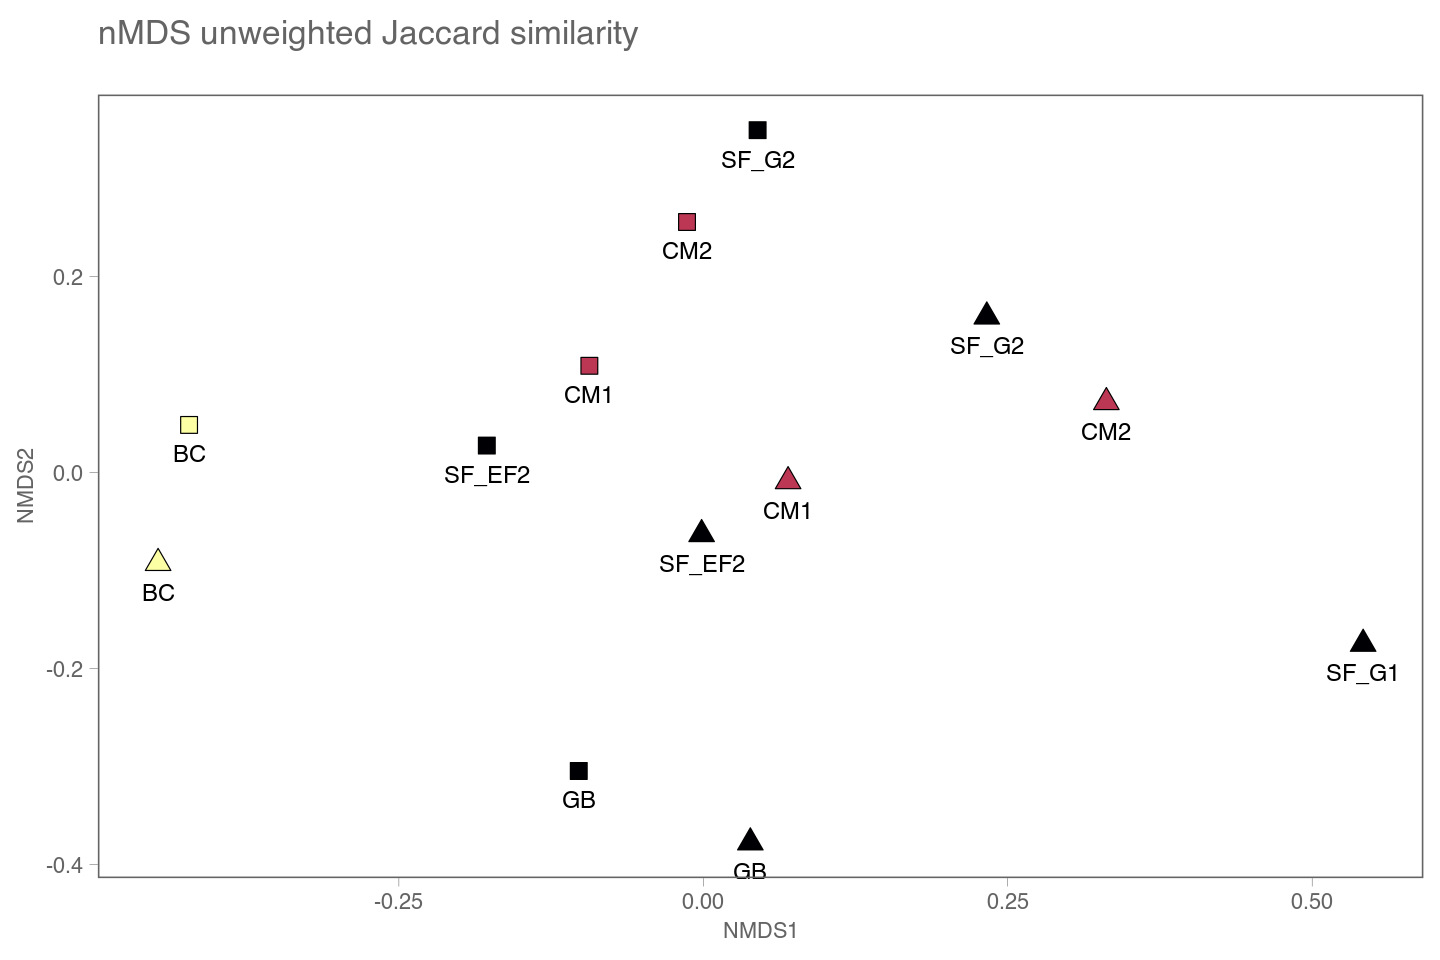

In [235]:
UW <- nmds_juw_envfit <- ggplot(data = nmds_df1_juw, aes(x = MDS1, y = MDS2)) + 
     
        #geom_segment(data = en_coord_cont.1_juw, aes(x = 0, y = 0, xend = MDS1/1.5, yend = MDS2/1.5), 
        #                    size =.8, alpha = 0.8, colour = "grey") + 
     
       # geom_text(data = en_coord_cont.1_juw, aes(x = MDS1/1.5, y = MDS2/1.5), colour = "grey30", 
       #                   size=6, label = row.names(en_coord_cont.1_juw)) + 
     
        geom_point(aes(fill = region, shape=type), size = 5, show.legend=NULL) +
    
        scale_fill_viridis(discrete = T, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
        geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +

        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(title="nMDS unweighted Jaccard similarity",
             subtitle="",
             shape="Sample type",
             fill="Mixing trends",
             x="NMDS1",
             y="NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab() + 

        theme(legend.position = "right")

nmds_juw_envfit

In [344]:
ggsave("nMDS_vector_fitting_unweighted.svg", width=12, height=8)

# Comparing weighted versus unweighted Jacard

In [269]:
proW_UWJ <- procrustes(X = prok_nmds_juw, Y = prok_nmds_jw, symmetric = FALSE)
proW_UWJ


Call:
procrustes(X = prok_nmds_juw, Y = prok_nmds_jw, symmetric = FALSE) 

Procrustes sum of squares:
0.9057 


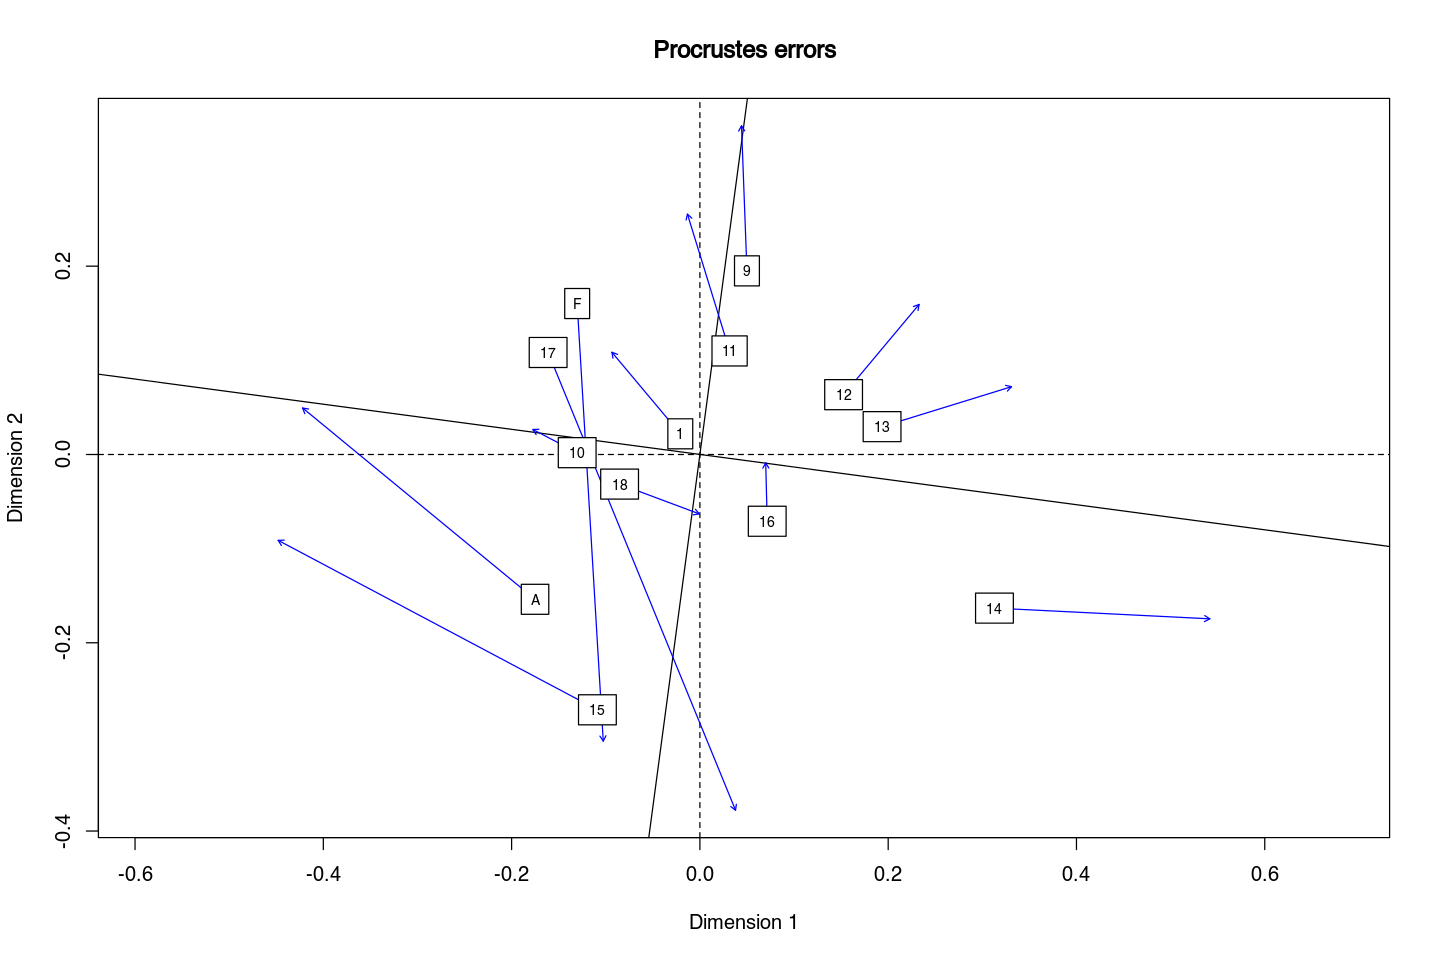

In [270]:
plot(proW_UWJ, kind = 1, type = "text")

## Ordisurf Unweighted 

## PSU

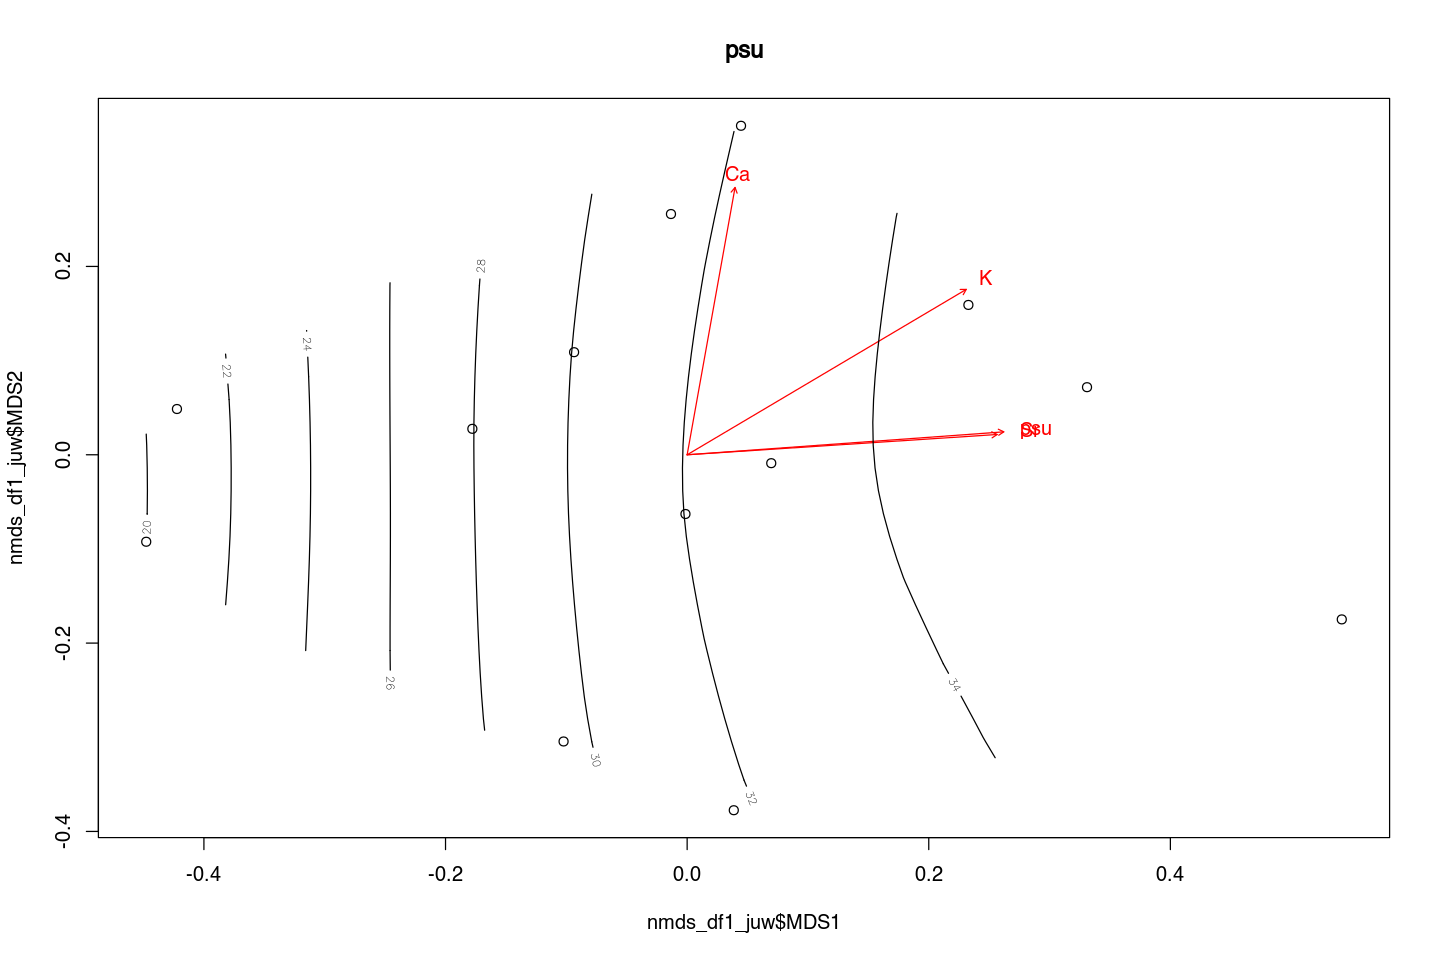

In [198]:
#PSU
env_ordsurf_psu<-ordisurf(prok_nmds_juw$points ~ psu, nmds_df1_juw, family=gaussian, plot = FALSE, scaling = 10, k=4)

plot(nmds_df1_juw$MDS1,nmds_df1_juw$MDS2, main = "psu")
plot(env_juw, p.max = 0.05, col = "red")
plot(env_ordsurf_psu, col = "black", add = TRUE)

In [199]:
ordi_grid <- env_ordsurf_psu$grid
str(ordi_grid)
ordi_mite <- expand.grid(x=ordi_grid$x, y=ordi_grid$y)
ordi_mite$z <- as.vector(ordi_grid$z)
ordi_mite_na <- data.frame(na.omit(ordi_mite))

List of 3
 $ x: num [1:31] -0.448 -0.415 -0.382 -0.349 -0.316 ...
 $ y: num [1:31] -0.377 -0.353 -0.329 -0.305 -0.281 ...
 $ z: num [1:31, 1:31] NA NA NA NA NA NA NA NA NA NA ...


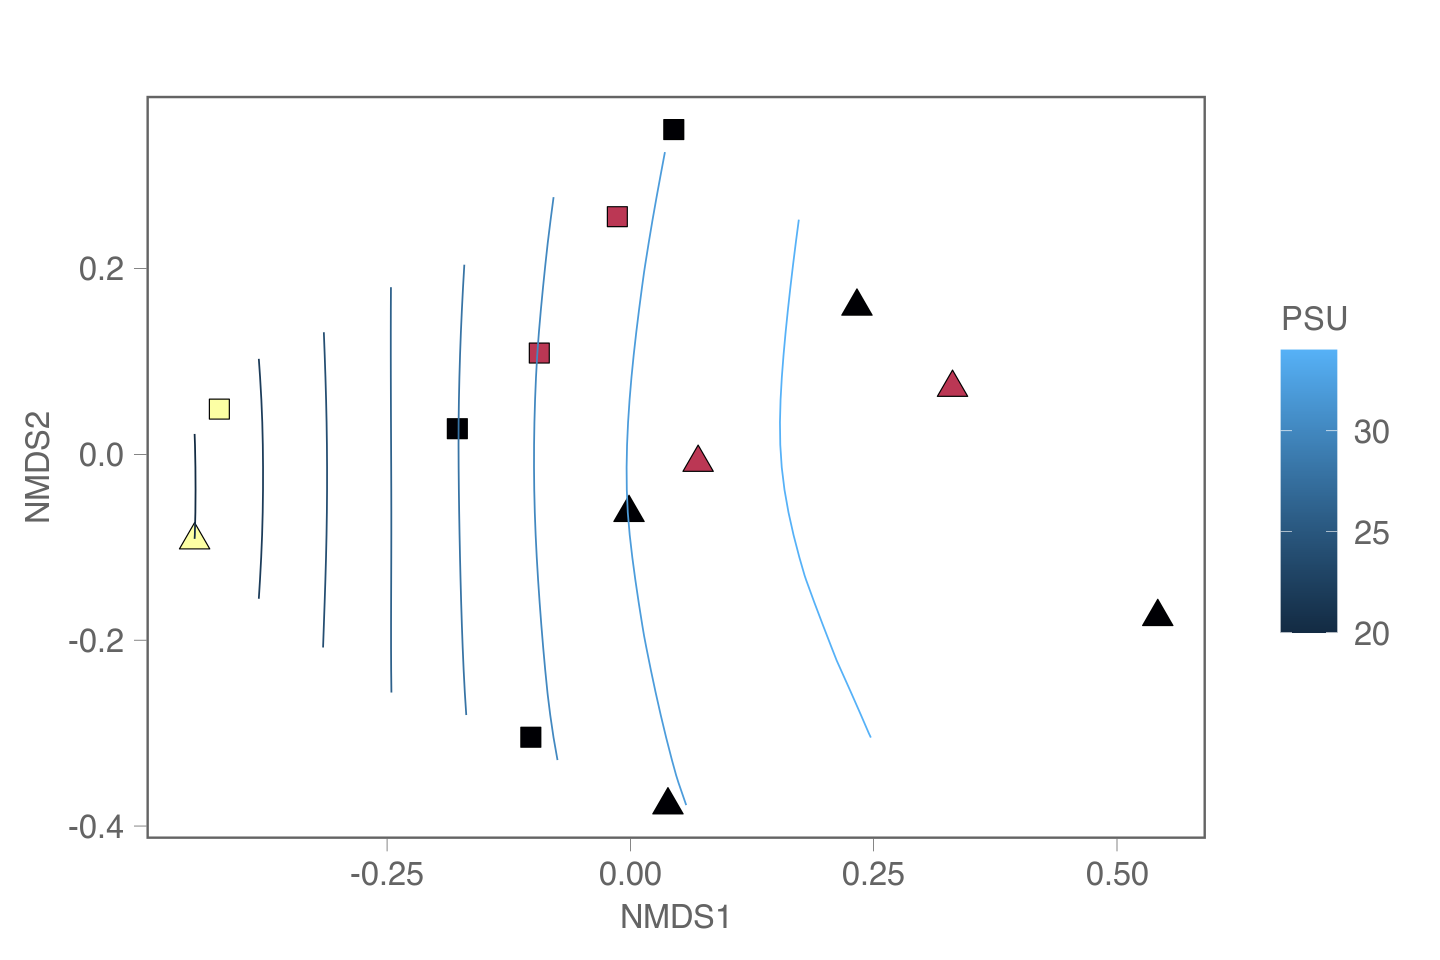

In [204]:
A1 <- nmds_juw_envfit <- ggplot(data = nmds_df1_juw, aes(x = MDS1, y = MDS2)) + 
     
        geom_point(aes(fill = region,shape=type), size = 6, show.legend=FALSE) +
    
        scale_fill_viridis(discrete = T, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
       # geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +

        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(subtitle="",
             shape="Sample type",
             fill="Mixing trends",
             x="NMDS1",
             y="NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
         theme_glab(base_size = 30) + 

        #theme(legend.position = "right") +

        stat_contour(data=ordi_mite_na, aes(x=x, y=y, z=z, colour = after_stat(level)), position ='identity') + labs(color = "PSU", size=21) +
        
        theme(legend.key.size = unit(1.2, "cm")) 

nmds_juw_envfit

#ggsave("ordi_un_psu.svg", width=12, height=8)

## K

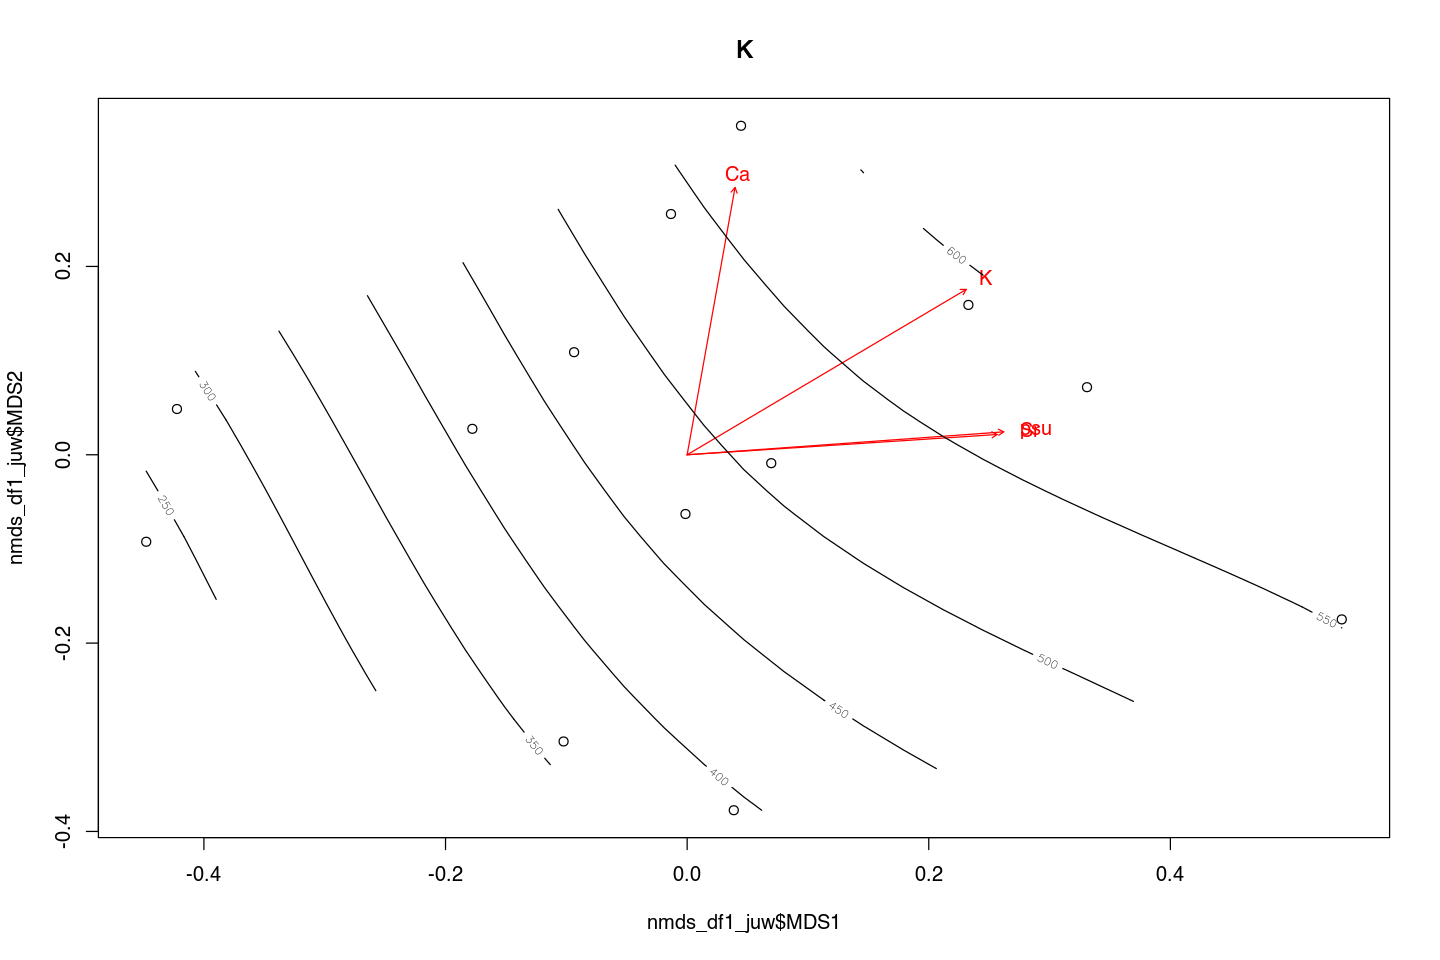

In [212]:
#K
env_ordsurf_k<-ordisurf(prok_nmds_juw$points ~ K, nmds_df1_juw, family=gaussian, plot = FALSE, scaling = 10, k=4)

plot(nmds_df1_juw$MDS1,nmds_df1_juw$MDS2, main = "K")
plot(env_juw, p.max = 0.05, col = "red")
plot(env_ordsurf_k, col = "black", add = TRUE)

In [213]:
ordi_grid <- env_ordsurf_k$grid
str(ordi_grid)
ordi_mite <- expand.grid(x=ordi_grid$x, y=ordi_grid$y)
ordi_mite$z <- as.vector(ordi_grid$z)
ordi_mite_na <- data.frame(na.omit(ordi_mite))

List of 3
 $ x: num [1:31] -0.448 -0.415 -0.382 -0.349 -0.316 ...
 $ y: num [1:31] -0.377 -0.353 -0.329 -0.305 -0.281 ...
 $ z: num [1:31, 1:31] NA NA NA NA NA NA NA NA NA NA ...


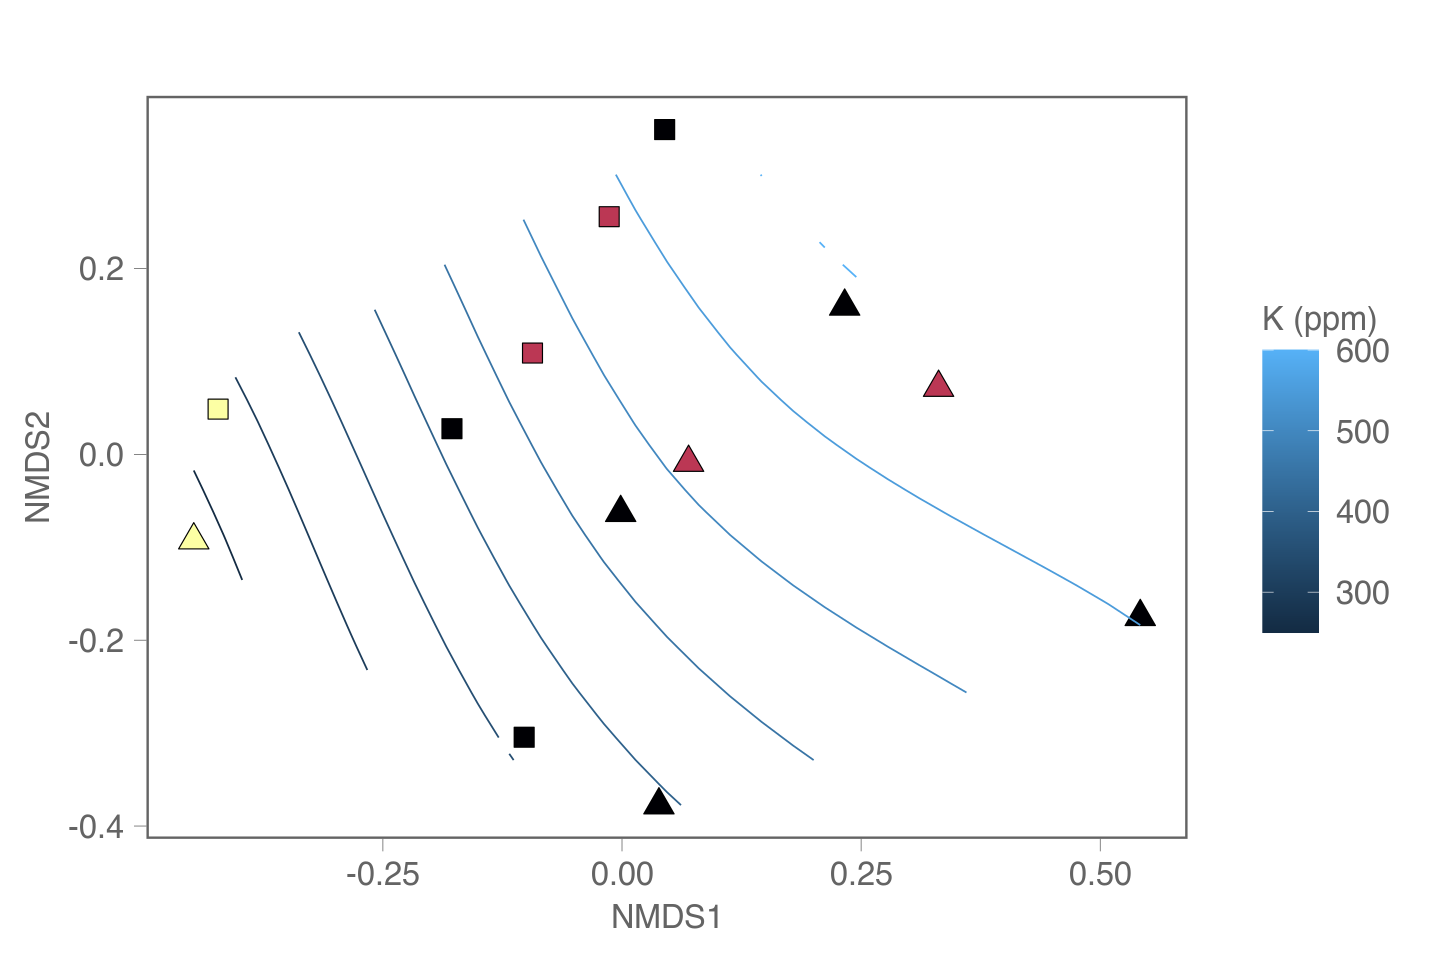

In [214]:
B1 <- nmds_juw_envfit <- ggplot(data = nmds_df1_juw, aes(x = MDS1, y = MDS2)) + 
     
        geom_point(aes(fill = region,shape=type), size = 6, show.legend=FALSE) +    
       
        scale_fill_viridis(discrete = T, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
        #geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +

        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(subtitle="",
             shape="Sample type",
             fill="Mixing trends",
             x="NMDS1",
             y="NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab(base_size = 30) + 

        #theme(legend.position = "right") +

        stat_contour(data=ordi_mite_na, aes(x=x, y=y, z=z, colour = after_stat(level)), position ='identity') + labs(color = "K (ppm)", size=21) +
        
        theme(legend.key.size = unit(1.2, "cm"))

nmds_juw_envfit

#ggsave("ordi_un_k.svg", width=12, height=8)

## Ca

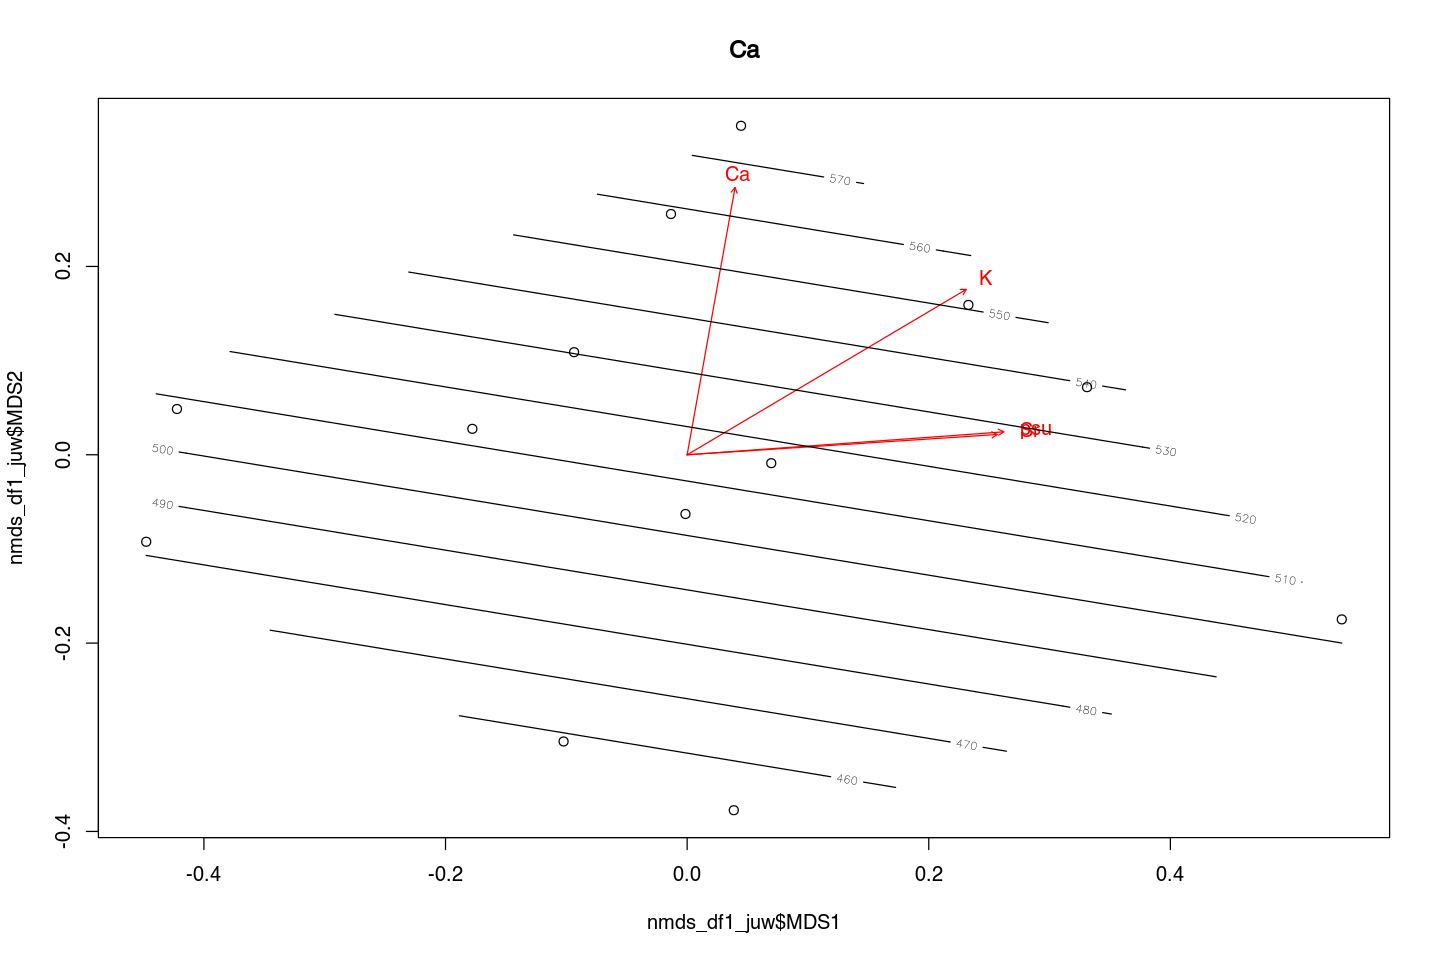

In [215]:
#Ca
env_ordsurf_ca<-ordisurf(prok_nmds_juw$points ~ Ca, nmds_df1_juw, family=gaussian, plot = FALSE, scaling = 10, k=4)

plot(nmds_df1_juw$MDS1,nmds_df1_juw$MDS2, main = "Ca")
plot(env_juw, p.max = 0.05, col = "red")
plot(env_ordsurf_ca, col = "black", add = TRUE)

In [216]:
ordi_grid <- env_ordsurf_ca$grid
str(ordi_grid)
ordi_mite <- expand.grid(x=ordi_grid$x, y=ordi_grid$y)
ordi_mite$z <- as.vector(ordi_grid$z)
ordi_mite_na <- data.frame(na.omit(ordi_mite))

List of 3
 $ x: num [1:31] -0.448 -0.415 -0.382 -0.349 -0.316 ...
 $ y: num [1:31] -0.377 -0.353 -0.329 -0.305 -0.281 ...
 $ z: num [1:31, 1:31] NA NA NA NA NA NA NA NA NA NA ...


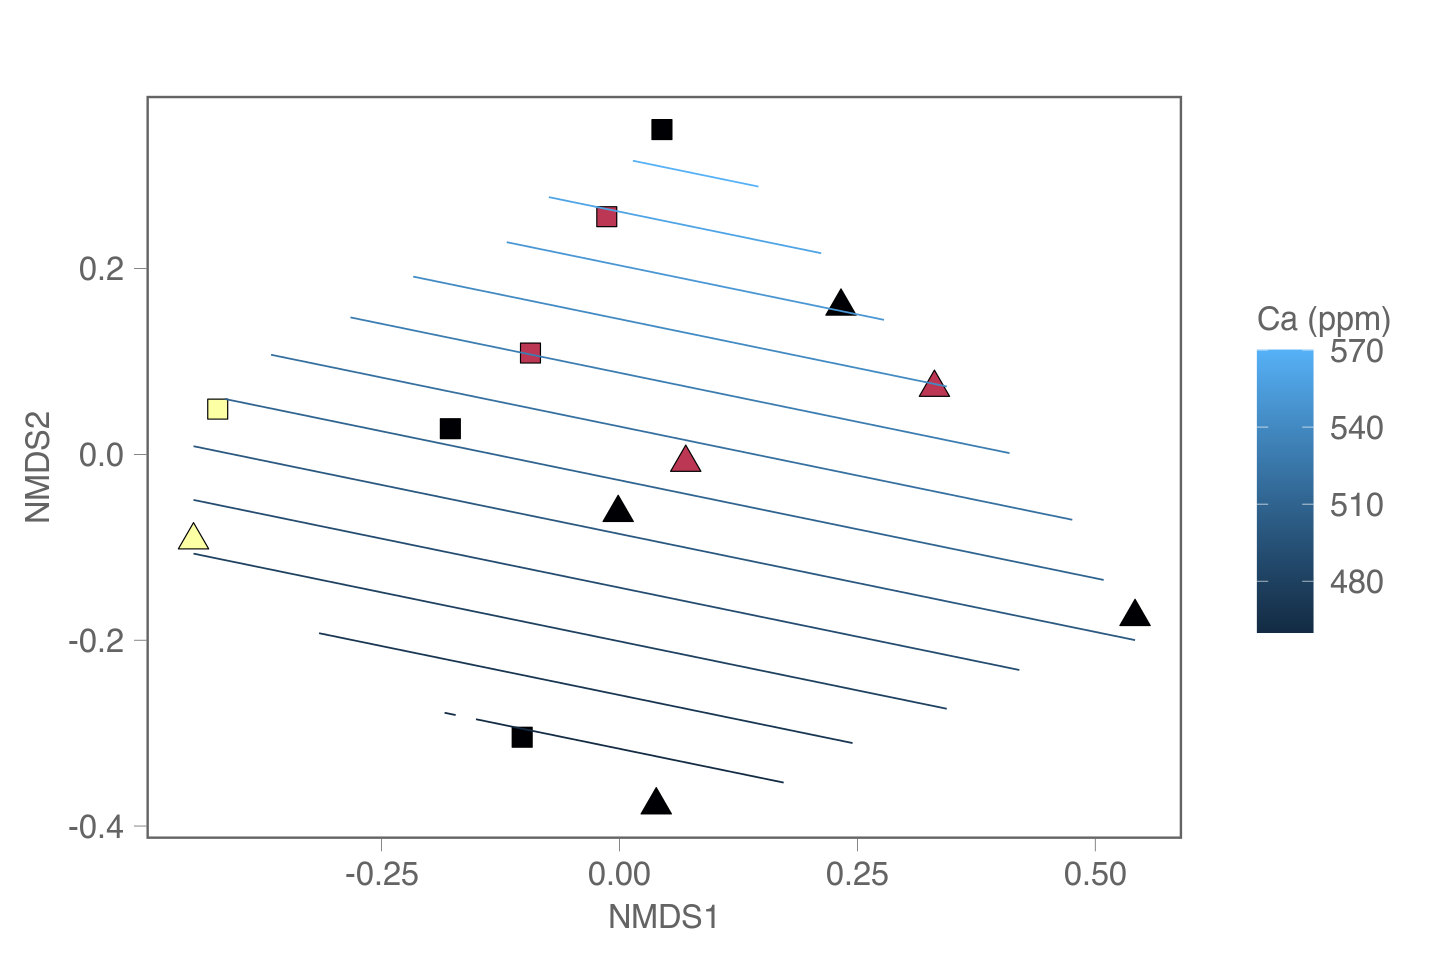

In [217]:
C1 <- nmds_juw_envfit <- ggplot(data = nmds_df1_juw, aes(x = MDS1, y = MDS2)) + 
     
        geom_point(aes(fill = region, shape=type), size = 6, show.legend=FALSE) +
    
        scale_fill_viridis(discrete = T, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
        #geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +

        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(subtitle="",
             shape="Sample type",
             fill="Mixing trends",
             x="NMDS1",
             y="NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab(base_size = 30) + 

        #theme(legend.position = "right") +

        stat_contour(data=ordi_mite_na, aes(x=x, y=y, z=z, colour = after_stat(level)), position ='identity') + labs(color = "Ca (ppm)", size=21) +
        
        theme(legend.key.size = unit(1.2, "cm"))

nmds_juw_envfit

#ggsave("ordi_un_ca.svg", width=12, height=8)

## Sr

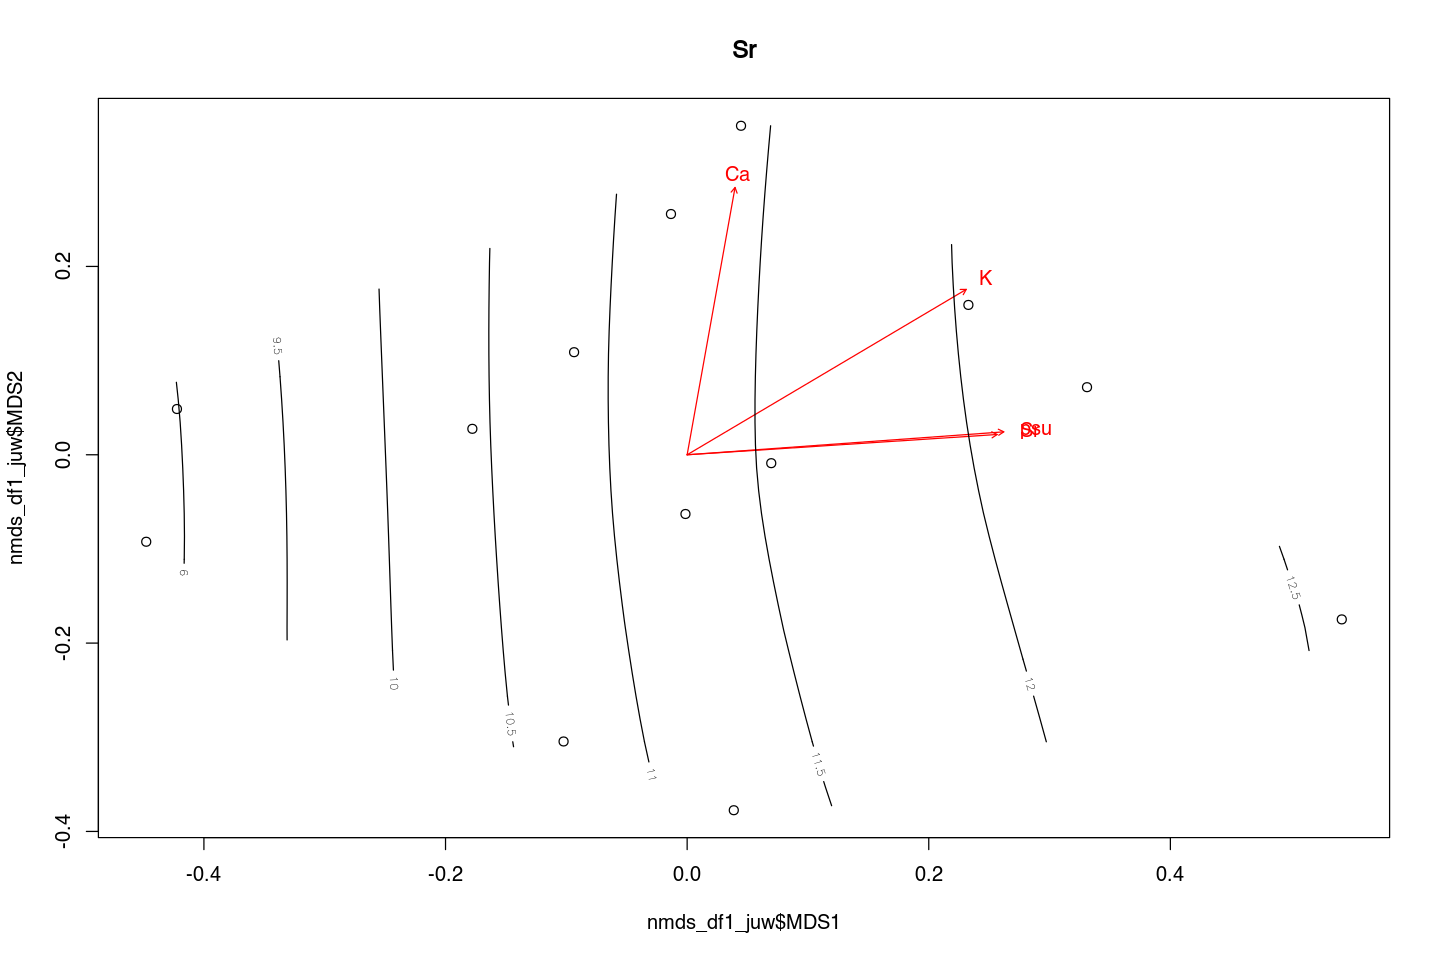

In [218]:
#Ca
env_ordsurf_sr<-ordisurf(prok_nmds_juw$points ~ Sr, nmds_df1_juw, family=gaussian, plot = FALSE, scaling = 10, k=4)

plot(nmds_df1_juw$MDS1,nmds_df1_juw$MDS2, main = "Sr")
plot(env_juw, p.max = 0.05, col = "red")
plot(env_ordsurf_sr, col = "black", add = TRUE)

In [219]:
ordi_grid <- env_ordsurf_sr$grid
str(ordi_grid)
ordi_mite <- expand.grid(x=ordi_grid$x, y=ordi_grid$y)
ordi_mite$z <- as.vector(ordi_grid$z)
ordi_mite_na <- data.frame(na.omit(ordi_mite))

List of 3
 $ x: num [1:31] -0.448 -0.415 -0.382 -0.349 -0.316 ...
 $ y: num [1:31] -0.377 -0.353 -0.329 -0.305 -0.281 ...
 $ z: num [1:31, 1:31] NA NA NA NA NA NA NA NA NA NA ...


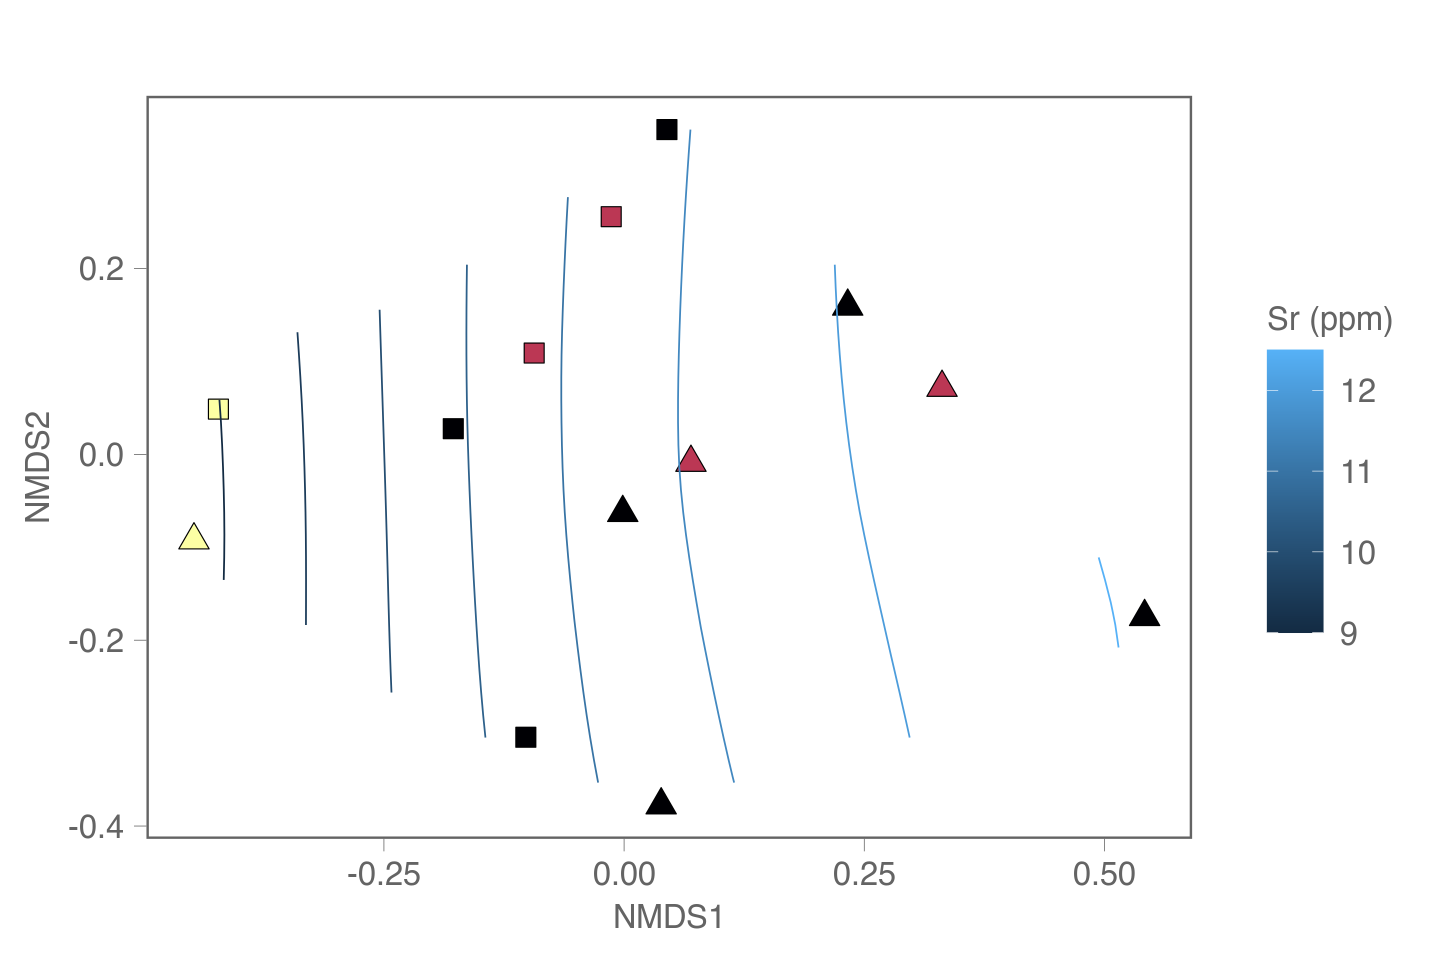

In [221]:
D1 <- nmds_juw_envfit <- ggplot(data = nmds_df1_juw, aes(x = MDS1, y = MDS2)) + 
     
        geom_point(aes(fill = region, shape=type), size = 6, show.legend=FALSE) +
    
        scale_fill_viridis(discrete = T, option="inferno") +
     
        scale_shape_manual(values = c(24,22,23)) + 
     
        #geom_text(aes(label= code), size=5, hjust=0.5, vjust=2.2) +

        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        labs(subtitle="",
             shape="Sample type",
             fill="Mixing trends",
             x="NMDS1",
             y="NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
         theme_glab(base_size = 30) + 

        #theme(legend.position = "right") +

        stat_contour(data=ordi_mite_na, aes(x=x, y=y, z=z, colour = after_stat(level)), position ='identity') + labs(color = "Sr (ppm)", size=21) +
        
        theme(legend.key.size = unit(1.2, "cm"))
nmds_juw_envfit

#ggsave("ordi_un_sr.svg", width=12, height=8)

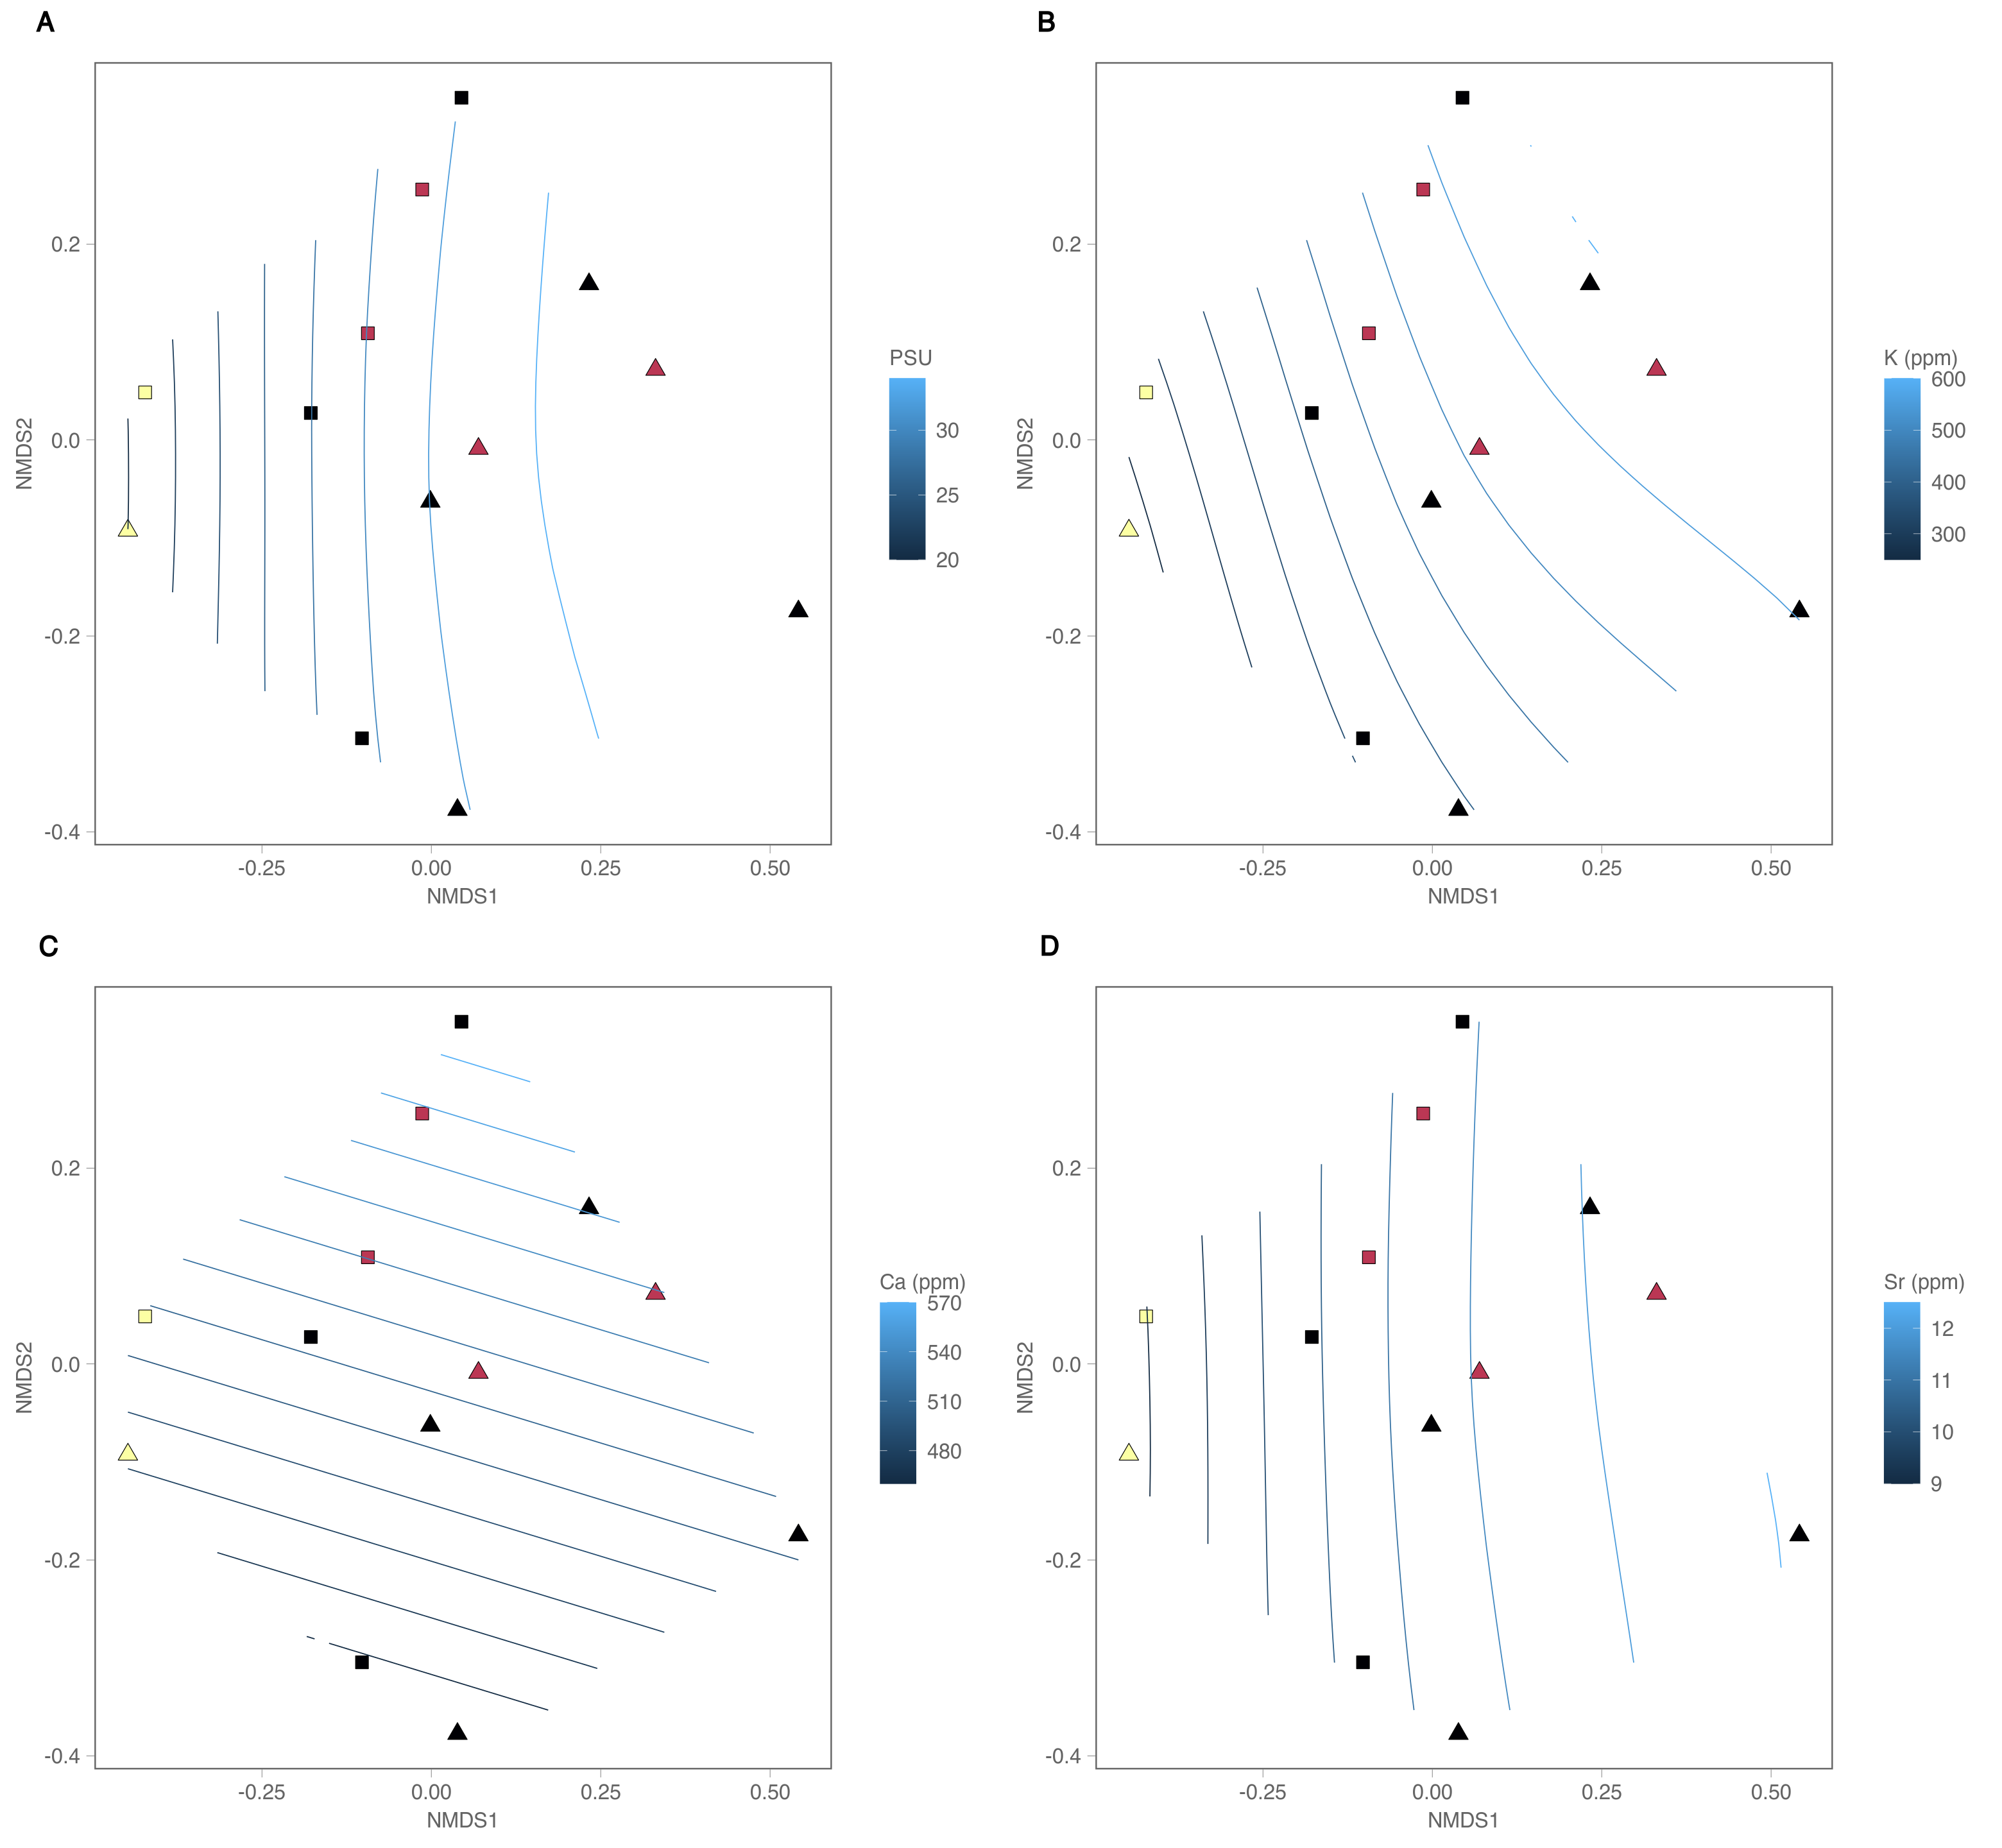

In [222]:
options(repr.plot.width=26, repr.plot.height=24)

ggarrange(A1, B1, 
          C1, D1, 
          labels=c("A", "B", "C", "D"), hjust=-2, 
          font.label = list(size = 25),
          nrow=2,
          ncol=2,
          common.legend = FALSE,
          widths=8,
          heights=8,
          align="hv"
          )

#ggsave("ordisurf_unweighted.svg", width = 26, height = 24) 

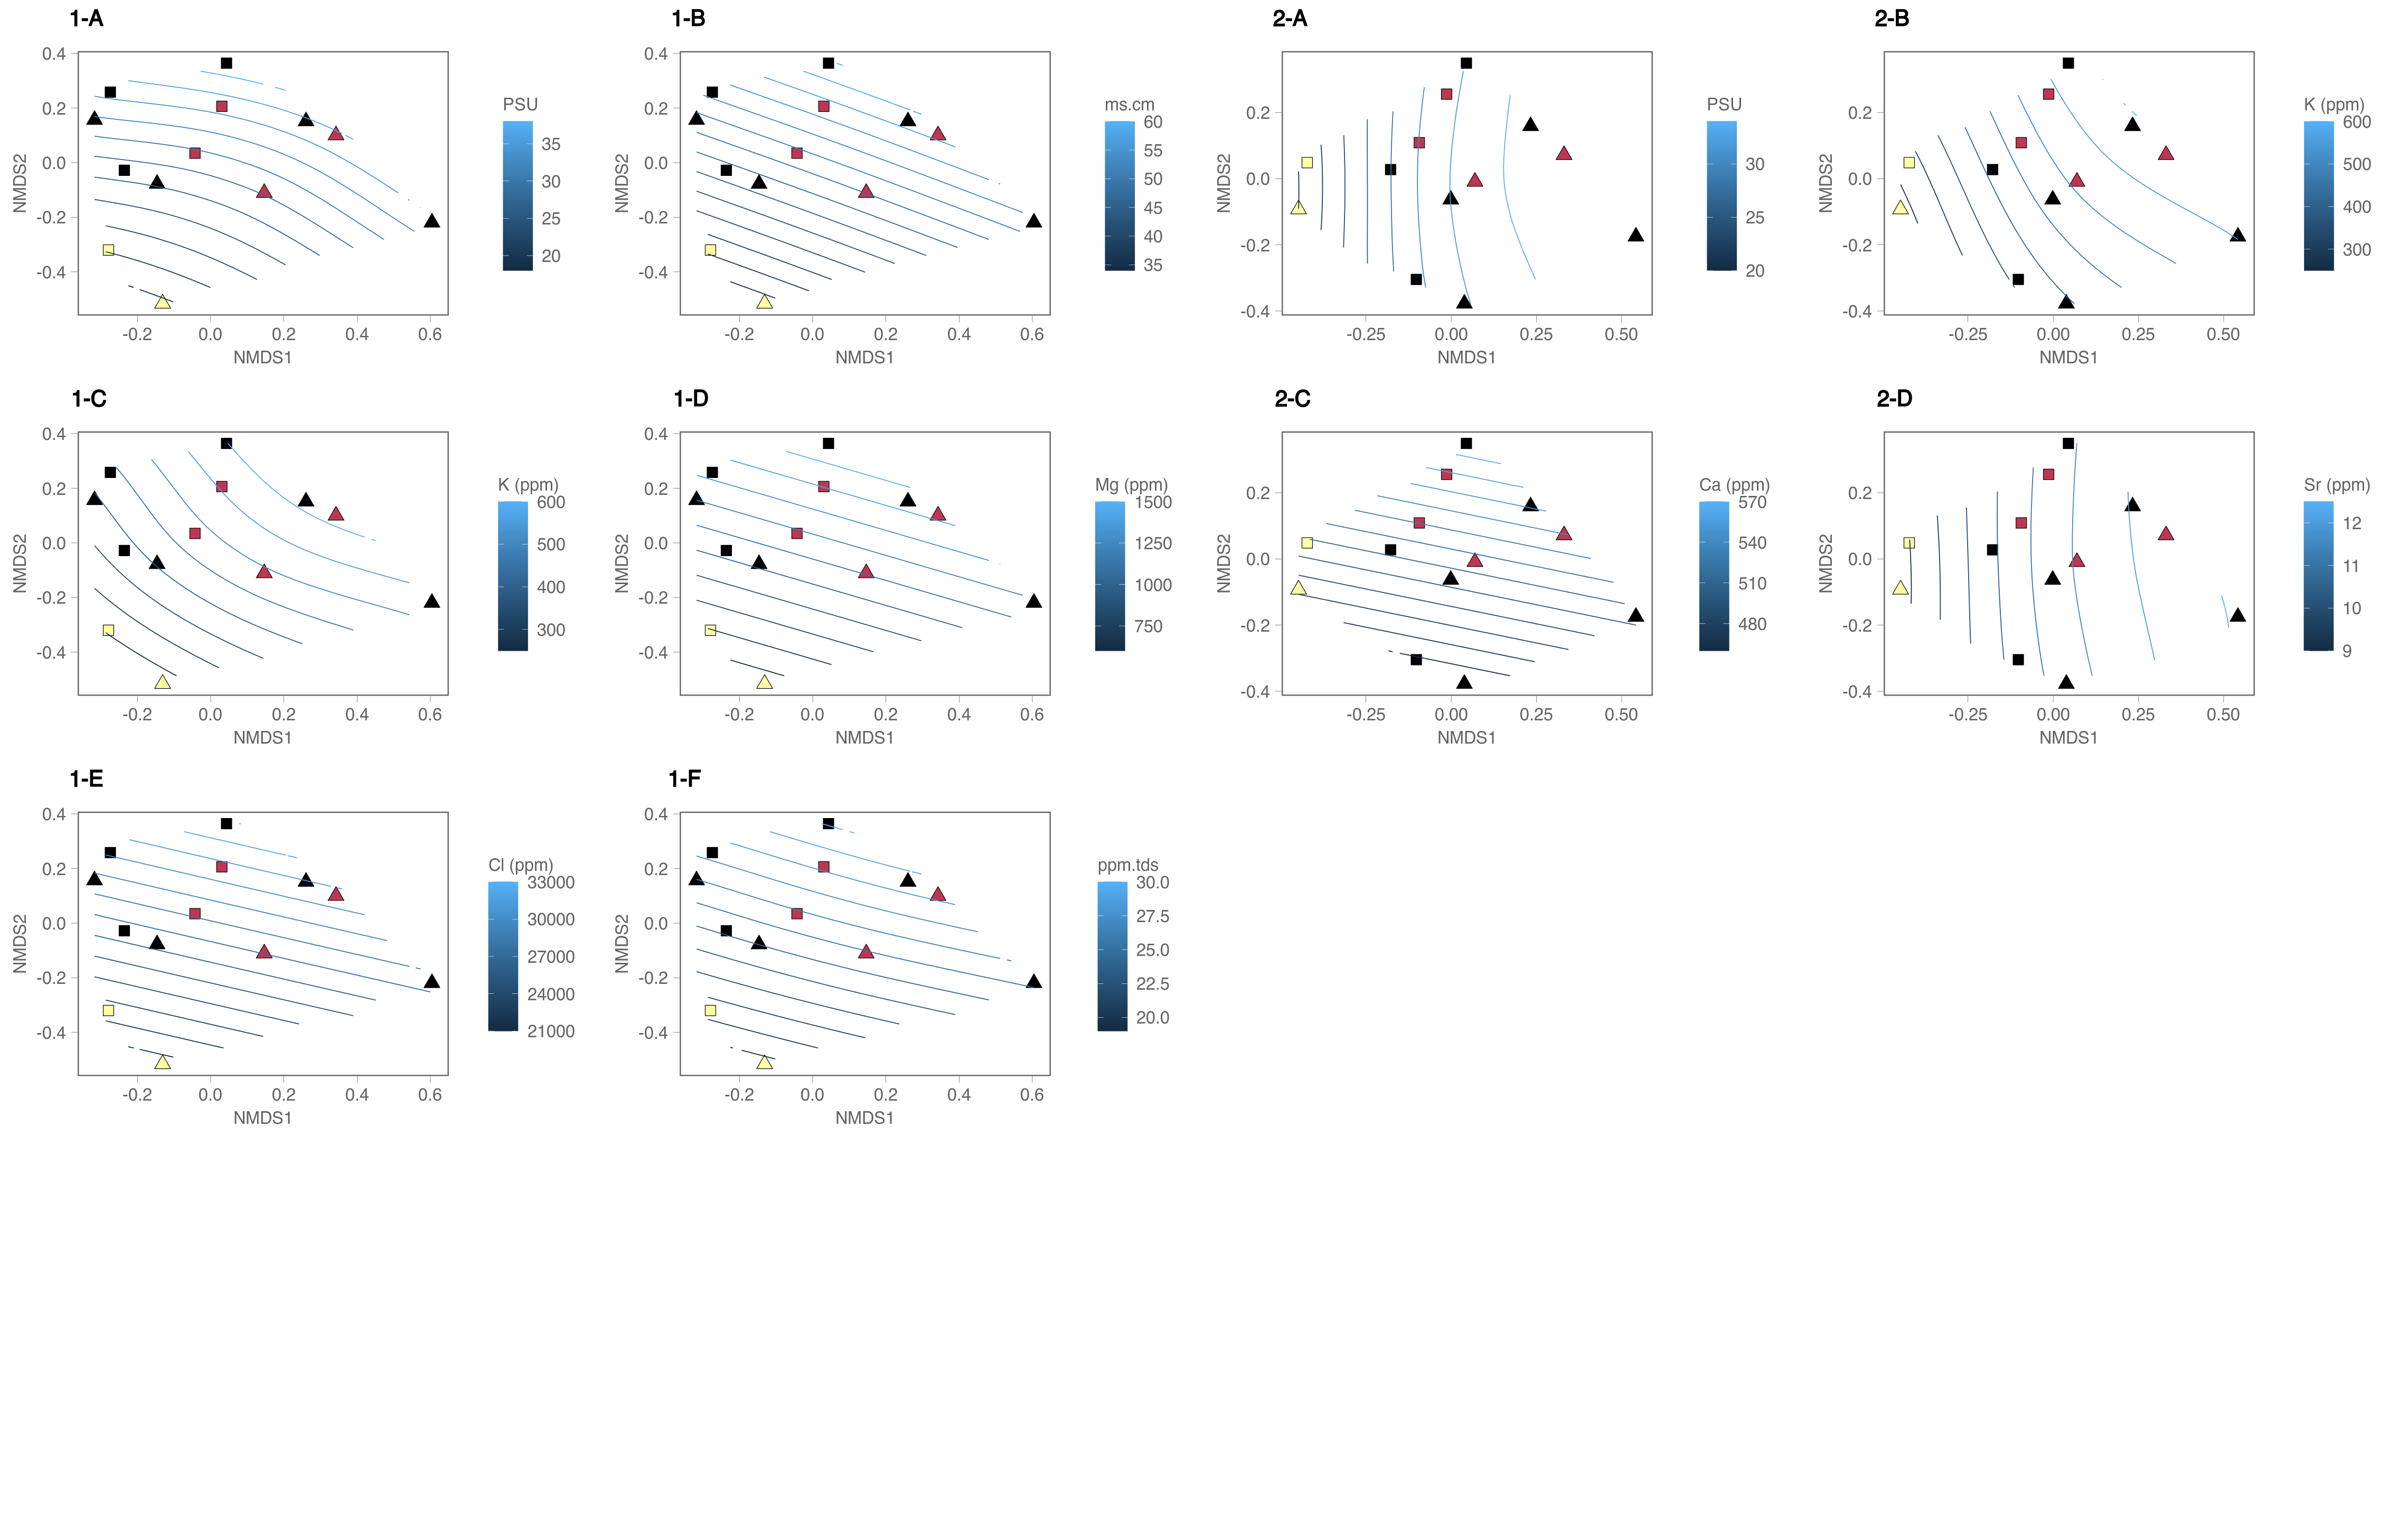

In [253]:
options(repr.plot.width=38, repr.plot.height=24)

ggarrange(A, B, A1, B1, 
          C, D, C1, D1,
          E, F,
          labels=c("1-A", "1-B", "2-A", "2-B", "1-C", "1-D", "2-C","2-D", "1-E", "1-F"), hjust=-2, 
          font.label = list(size = 25),
          nrow=4,
          ncol=4,
          common.legend = FALSE,
          widths=8,
          heights=8,
          align="hv"
          )

In [255]:
ggsave("ordisurf_reaarranged.svg", width = 38,height = 24)

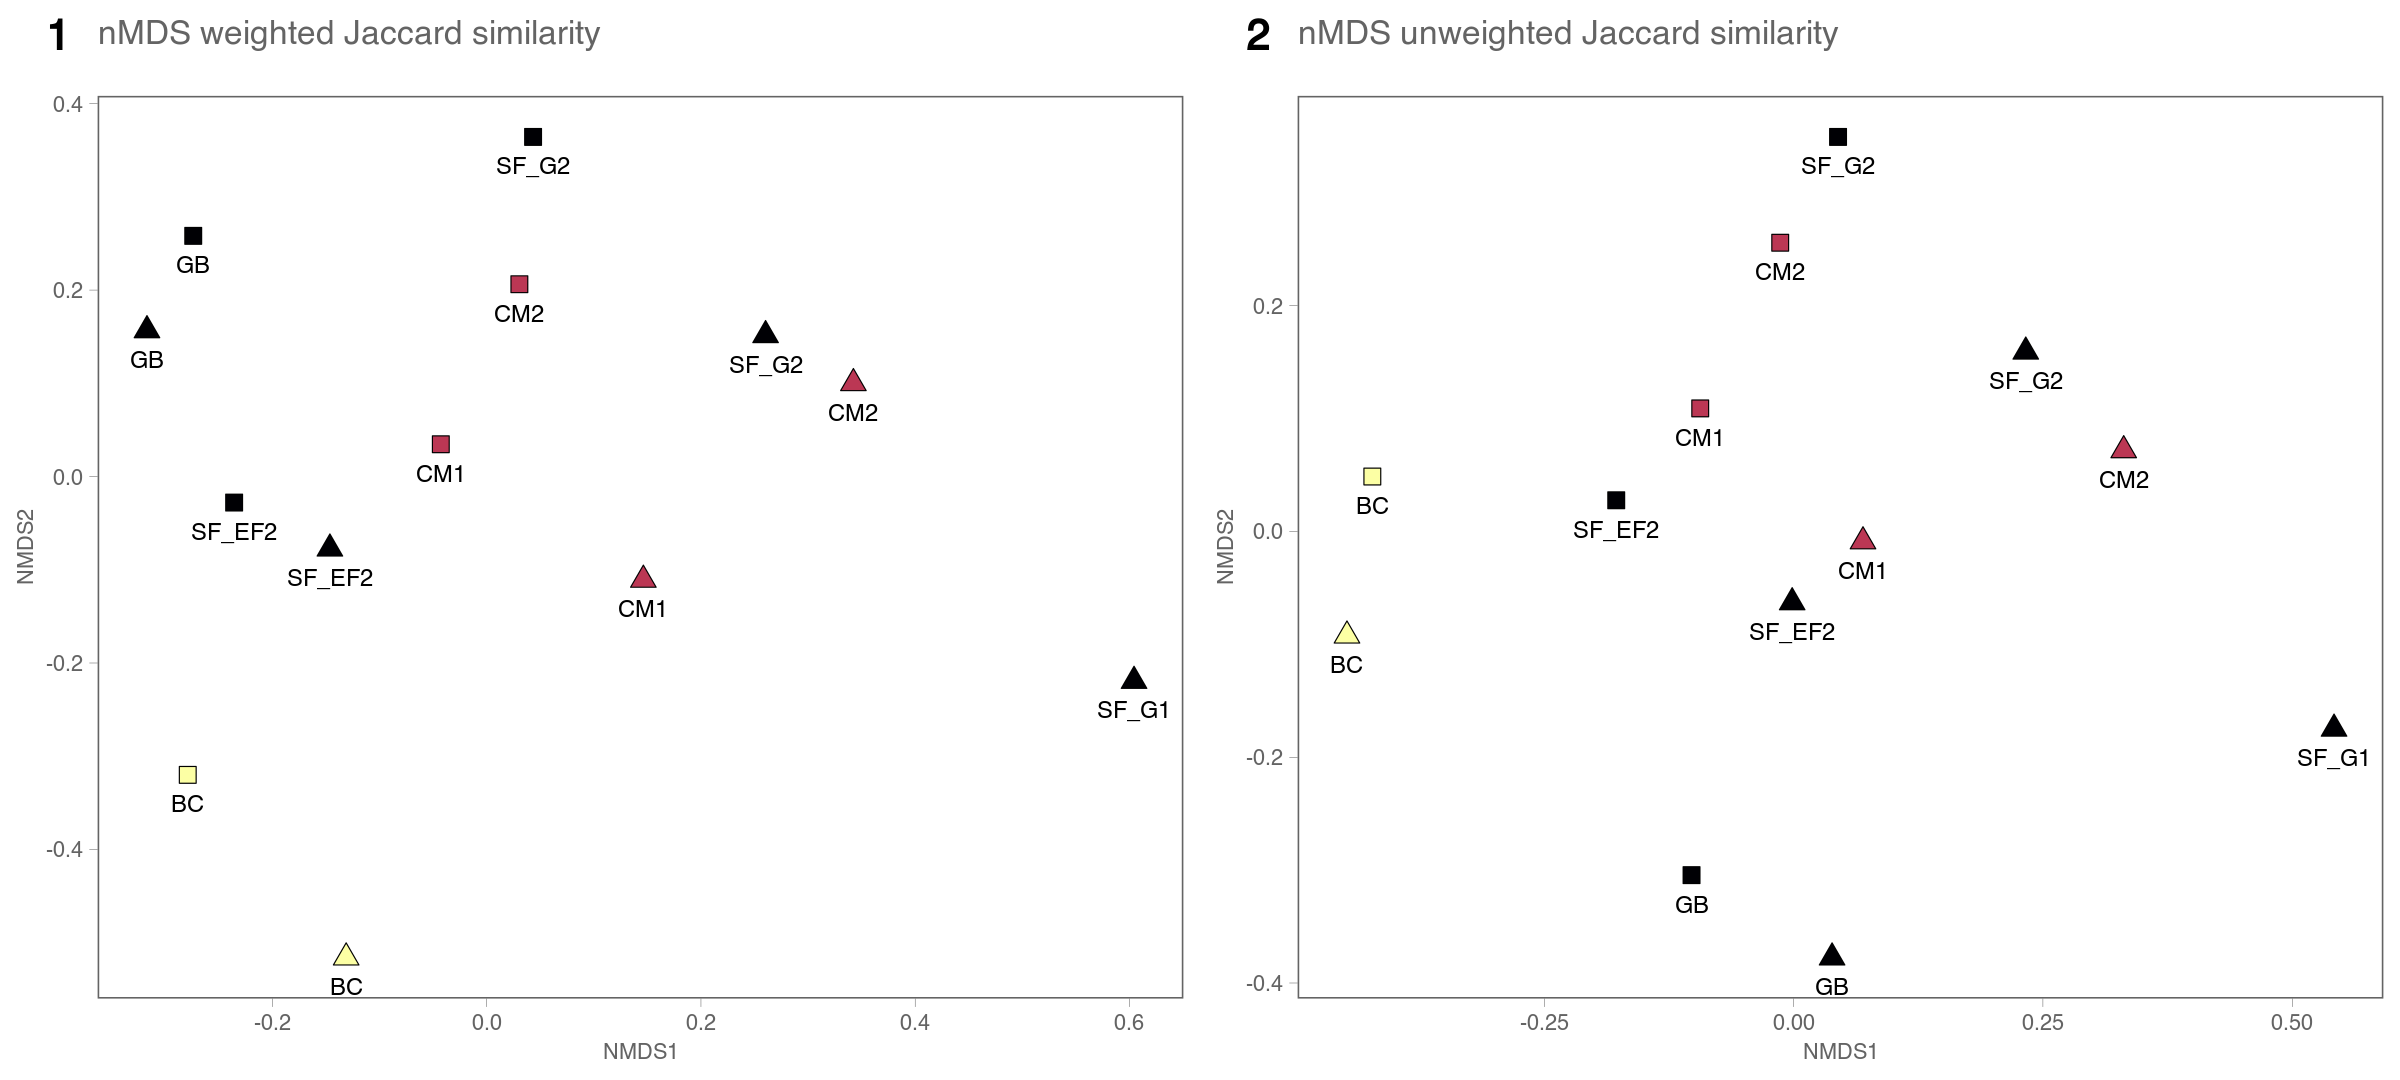

In [256]:
options(repr.plot.width=20, repr.plot.height=9)

ggarrange(W, UW,
          labels=c("1", "2"), hjust=-2, 
          font.label = list(size = 25),
          nrow=1,
          ncol=2,
          common.legend = FALSE,
          widths=8,
          heights=8,
          align="hv"
          )

In [257]:
ggsave("w_and_uw.svg", width = 20,height = 9)

## PCoA Jaccard

### Weighted PCoA Jaccard

In [81]:
prok_pcoa_jw <- ordinate(prok_ndata_no_b,prok_dist_wjac, method = "PCoA")
evals_jw <- prok_pcoa_jw$values$Eigenvalues

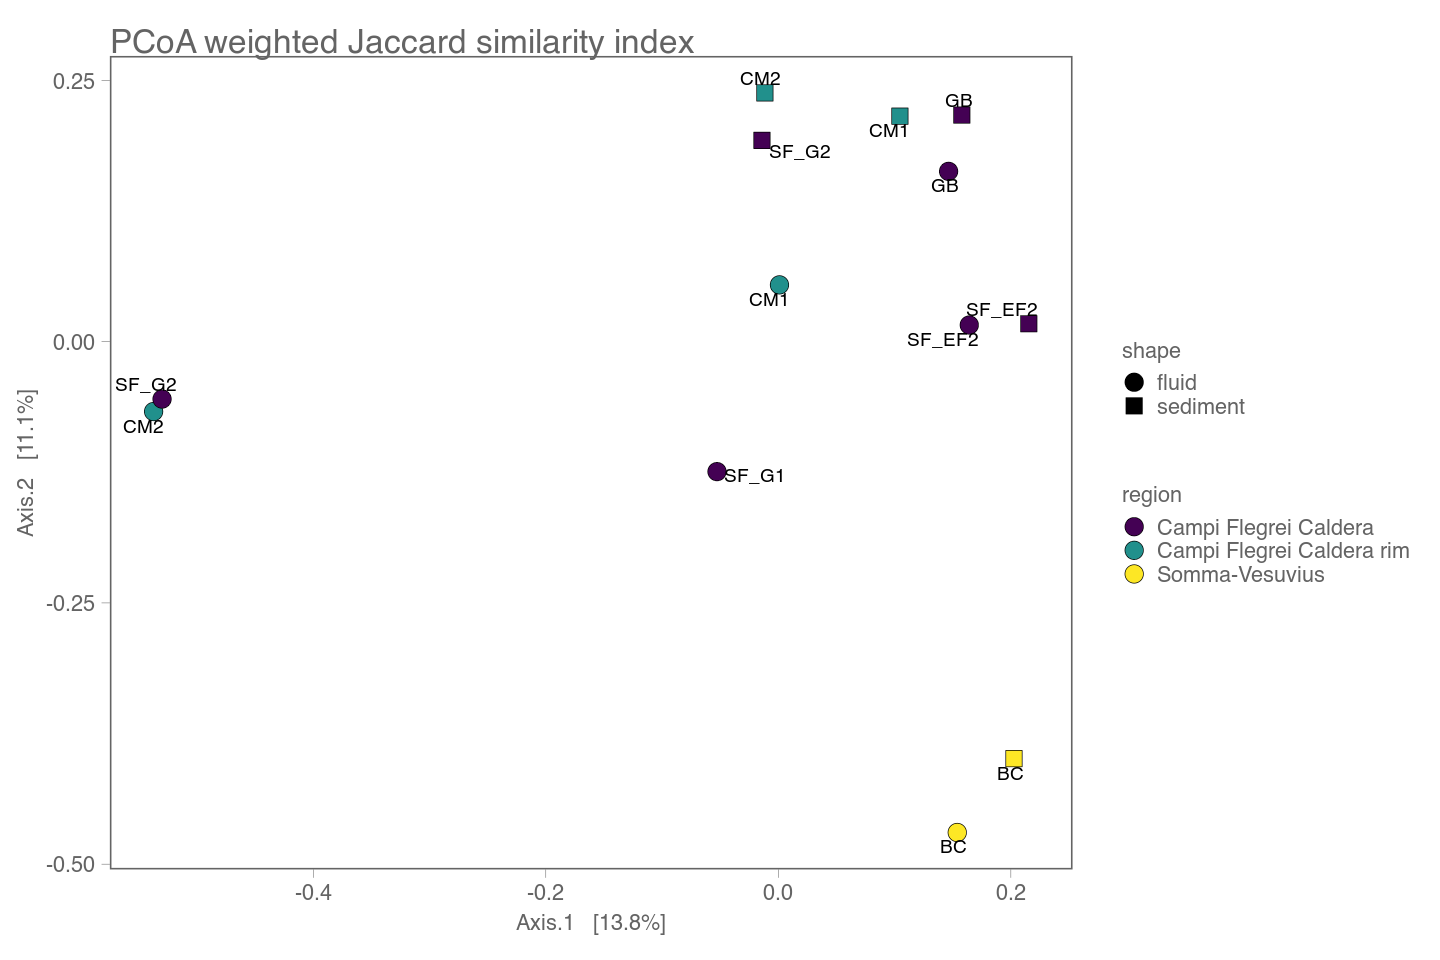

In [83]:
plot_ordination(prok_ndata_no_b, prok_pcoa_jw, type="samples", title="PCoA weighted Jaccard similarity index") +

        coord_fixed(sqrt(evals_jw[2] / evals_jw[1]))  + 

        geom_point(aes(fill=region,shape=type),size=5,color="black",stroke=0.3) + 

        geom_text_repel(aes(label= code), size=4, hjust=1,vjust=0.5) +

        scale_fill_viridis(discrete=TRUE) + scale_shape_manual(values=c(21:23)) +

        theme_glab() + theme(legend.position = "right") +

        guides(fill = guide_legend(override.aes = list(shape = 21) ),
              shape = guide_legend(override.aes = list(fill = "black")))

### Vector Fitting PCoA jaccard weighted

In [87]:
pcoa_prok.v.Wj<-data.frame(prok_pcoa_jw$vectors[,1:2])
pcoa_prok.v.Wj

Axis.1        Axis.2     
1   0.1045456210  0.21592794
16  0.0009553084  0.05444673
11 -0.0115814276  0.23816262
13 -0.5373544471 -0.06678786
17  0.1464328823  0.16307722
F   0.1577960488  0.21696250
10  0.2154174603  0.01725125
18  0.1642321520  0.01601808
14 -0.0527705286 -0.12430406
12 -0.5300953195 -0.05484371
9  -0.0141094601  0.19277286
15  0.1538699278 -0.46969884
A   0.2026617823 -0.39898473

In [88]:
pcoa_df <- sample_data(prok_ndata_no_b)
pcoa_df

code   location       type     region                    lat      long    
1  CM1    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
16 CM1    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
11 CM2    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
13 CM2    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
17 GB     Gulf of Naples fluid    Campi Flegrei Caldera     40.82375 14.07890
F  GB     Gulf of Naples sediment Campi Flegrei Caldera     40.82375 14.07890
10 SF_EF2 Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
18 SF_EF2 Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
14 SF_G1  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
12 SF_G2  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
9  SF_G2  Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
15 BC     Gulf of Naples fluid    Somma-Vesuvius            40.68858 14.45475
A  BC     Gulf of Naples sediment Somma-Vesuvius            40.68858 14.45475
   depth temp psu   do   ⋯ Mg      Ca     Mn       Fe        Zn       As      
1   7.0  26.3 27.54 55.0 ⋯ 1125.29 590.81 0.061217  0.113124 0.456657 0.021972
16  7.0  26.3 27.54 55.0 ⋯ 1125.29 590.81 0.061217  0.113124 0.456657 0.021972
11  8.3  27.0 38.37 92.0 ⋯ 1174.52 557.06 0.003700  0.011037 0.033080 0.020202
13  8.3  27.0 38.37 92.0 ⋯ 1174.52 557.06 0.003700  0.011037 0.033080 0.020202
17  5.4  28.0 35.41 43.0 ⋯ 1372.12 443.86 3.099014 11.123430 0.170947 0.512667
F   5.4  28.0 35.41 43.0 ⋯ 1372.12 443.86 3.099014 11.123430 0.170947 0.512667
10 10.0  34.0 26.50 75.0 ⋯  865.24 450.90 0.007141  0.033976 0.023478 0.010740
18 10.0  34.0 26.50 75.0 ⋯  865.24 450.90 0.007141  0.033976 0.023478 0.010740
14 13.3  71.0 34.06 50.8 ⋯ 1218.43 481.86 1.183603  3.590772 0.186116 1.908748
12 12.9  68.9 34.50 51.8 ⋯ 1774.17 565.06 1.131211  3.361098 0.047900 2.446793
9  12.9  68.9 34.50 51.8 ⋯ 1774.17 565.06 1.131211  3.361098 0.047900 2.446793
15  0.2  26.4 17.65 53.7 ⋯  650.57 497.79 0.047346  0.097862 0.193533 0.011163
A   0.2  26.4 17.65 53.7 ⋯  650.57 497.79 0.047346  0.097862 0.193533 0.011163
   Rb       Sr        Mo       Cs      
1  0.157602 11.402800 0.010804 0.002033
16 0.157602 11.402800 0.010804 0.002033
11 0.147709 10.231950 0.011593 0.005425
13 0.147709 10.231950 0.011593 0.005425
17 3.237141 11.487620 0.000985 0.170143
F  3.237141 11.487620 0.000985 0.170143
10 0.145538 10.712230 0.011988 0.004302
18 0.145538 10.712230 0.011988 0.004302
14 2.430386 13.262330 0.001486 1.729868
12 2.424394 13.074010 0.002394 1.645036
9  2.424394 13.074010 0.002394 1.645036
15 0.120608  8.110929 0.000000 0.006474
A  0.120608  8.110929 0.000000 0.006474

In [90]:
pcoa_df2 <- pcoa_df[,7:31]
pcoa_df2

depth temp psu   do   orp    ph   ms.cm mVph ppt.tds Cl       ⋯ Mg     
1   7.0  26.3 27.54 55.0 -115.4 5.87 56.58 55.6 28.35   31498.70 ⋯ 1125.29
16  7.0  26.3 27.54 55.0 -115.4 5.87 56.58 55.6 28.35   31498.70 ⋯ 1125.29
11  8.3  27.0 38.37 92.0   54.2 6.30 57.54 46.5 28.76   31011.94 ⋯ 1174.52
13  8.3  27.0 38.37 92.0   54.2 6.30 57.54 46.5 28.76   31011.94 ⋯ 1174.52
17  5.4  28.0 35.41 43.0 -145.2 5.33 53.64 83.5 26.80   29581.00 ⋯ 1372.12
F   5.4  28.0 35.41 43.0 -145.2 5.33 53.64 83.5 26.80   29581.00 ⋯ 1372.12
10 10.0  34.0 26.50 75.0 -173.0 5.25    NA 90.0 28.50   31973.57 ⋯  865.24
18 10.0  34.0 26.50 75.0 -173.0 5.25    NA 90.0 28.50   31973.57 ⋯  865.24
14 13.3  71.0 34.06 50.8 -159.0 5.45 51.80 77.8 25.90   28225.83 ⋯ 1218.43
12 12.9  68.9 34.50 51.8 -142.0 5.61 52.00 70.0 26.10   28245.38 ⋯ 1774.17
9  12.9  68.9 34.50 51.8 -142.0 5.61 52.00 70.0 26.10   28245.38 ⋯ 1774.17
15  0.2  26.4 17.65 53.7 -226.2 6.30 28.66 30.5 14.31   14820.82 ⋯  650.57
A   0.2  26.4 17.65 53.7 -226.2 6.30 28.66 30.5 14.31   14820.82 ⋯  650.57
   Ca     Mn       Fe        Zn       As       Rb       Sr        Mo      
1  590.81 0.061217  0.113124 0.456657 0.021972 0.157602 11.402800 0.010804
16 590.81 0.061217  0.113124 0.456657 0.021972 0.157602 11.402800 0.010804
11 557.06 0.003700  0.011037 0.033080 0.020202 0.147709 10.231950 0.011593
13 557.06 0.003700  0.011037 0.033080 0.020202 0.147709 10.231950 0.011593
17 443.86 3.099014 11.123430 0.170947 0.512667 3.237141 11.487620 0.000985
F  443.86 3.099014 11.123430 0.170947 0.512667 3.237141 11.487620 0.000985
10 450.90 0.007141  0.033976 0.023478 0.010740 0.145538 10.712230 0.011988
18 450.90 0.007141  0.033976 0.023478 0.010740 0.145538 10.712230 0.011988
14 481.86 1.183603  3.590772 0.186116 1.908748 2.430386 13.262330 0.001486
12 565.06 1.131211  3.361098 0.047900 2.446793 2.424394 13.074010 0.002394
9  565.06 1.131211  3.361098 0.047900 2.446793 2.424394 13.074010 0.002394
15 497.79 0.047346  0.097862 0.193533 0.011163 0.120608  8.110929 0.000000
A  497.79 0.047346  0.097862 0.193533 0.011163 0.120608  8.110929 0.000000
   Cs      
1  0.002033
16 0.002033
11 0.005425
13 0.005425
17 0.170143
F  0.170143
10 0.004302
18 0.004302
14 1.729868
12 1.645036
9  1.645036
15 0.006474
A  0.006474

In [92]:
pcoa_df3 <- subset(pcoa_df2, select = -c(ms.cm))
pcoa_df3

depth temp psu   do   orp    ph   mVph ppt.tds Cl       Br    ⋯ Mg     
1   7.0  26.3 27.54 55.0 -115.4 5.87 55.6 28.35   31498.70 75.13 ⋯ 1125.29
16  7.0  26.3 27.54 55.0 -115.4 5.87 55.6 28.35   31498.70 75.13 ⋯ 1125.29
11  8.3  27.0 38.37 92.0   54.2 6.30 46.5 28.76   31011.94 74.75 ⋯ 1174.52
13  8.3  27.0 38.37 92.0   54.2 6.30 46.5 28.76   31011.94 74.75 ⋯ 1174.52
17  5.4  28.0 35.41 43.0 -145.2 5.33 83.5 26.80   29581.00 70.63 ⋯ 1372.12
F   5.4  28.0 35.41 43.0 -145.2 5.33 83.5 26.80   29581.00 70.63 ⋯ 1372.12
10 10.0  34.0 26.50 75.0 -173.0 5.25 90.0 28.50   31973.57 74.70 ⋯  865.24
18 10.0  34.0 26.50 75.0 -173.0 5.25 90.0 28.50   31973.57 74.70 ⋯  865.24
14 13.3  71.0 34.06 50.8 -159.0 5.45 77.8 25.90   28225.83 67.24 ⋯ 1218.43
12 12.9  68.9 34.50 51.8 -142.0 5.61 70.0 26.10   28245.38 66.60 ⋯ 1774.17
9  12.9  68.9 34.50 51.8 -142.0 5.61 70.0 26.10   28245.38 66.60 ⋯ 1774.17
15  0.2  26.4 17.65 53.7 -226.2 6.30 30.5 14.31   14820.82 35.59 ⋯  650.57
A   0.2  26.4 17.65 53.7 -226.2 6.30 30.5 14.31   14820.82 35.59 ⋯  650.57
   Ca     Mn       Fe        Zn       As       Rb       Sr        Mo      
1  590.81 0.061217  0.113124 0.456657 0.021972 0.157602 11.402800 0.010804
16 590.81 0.061217  0.113124 0.456657 0.021972 0.157602 11.402800 0.010804
11 557.06 0.003700  0.011037 0.033080 0.020202 0.147709 10.231950 0.011593
13 557.06 0.003700  0.011037 0.033080 0.020202 0.147709 10.231950 0.011593
17 443.86 3.099014 11.123430 0.170947 0.512667 3.237141 11.487620 0.000985
F  443.86 3.099014 11.123430 0.170947 0.512667 3.237141 11.487620 0.000985
10 450.90 0.007141  0.033976 0.023478 0.010740 0.145538 10.712230 0.011988
18 450.90 0.007141  0.033976 0.023478 0.010740 0.145538 10.712230 0.011988
14 481.86 1.183603  3.590772 0.186116 1.908748 2.430386 13.262330 0.001486
12 565.06 1.131211  3.361098 0.047900 2.446793 2.424394 13.074010 0.002394
9  565.06 1.131211  3.361098 0.047900 2.446793 2.424394 13.074010 0.002394
15 497.79 0.047346  0.097862 0.193533 0.011163 0.120608  8.110929 0.000000
A  497.79 0.047346  0.097862 0.193533 0.011163 0.120608  8.110929 0.000000
   Cs      
1  0.002033
16 0.002033
11 0.005425
13 0.005425
17 0.170143
F  0.170143
10 0.004302
18 0.004302
14 1.729868
12 1.645036
9  1.645036
15 0.006474
A  0.006474

In [95]:
envf_Wj <- envfit(pcoa_prok.v.Wj, pcoa_df3, perm = 9999, na.rm = T)

In [96]:
env_jW.adj <- envf_Wj 
pvals.adjW <- p.adjust(env_jW.adj$vectors$pvals)
pvals.adjW <- env_jW.adj$vectors$pvals


***VECTORS

          Axis.1   Axis.2     r2 Pr(>r)    
depth   -0.65265  0.75766 0.4476 0.0535 .  
temp    -0.99761  0.06904 0.1640 0.3853    
psu     -0.56870  0.82255 0.7907 0.0017 ** 
do      -0.95664  0.29126 0.0906 0.6396    
orp     -0.72124  0.69268 0.5318 0.0265 *  
ph      -0.45104 -0.89250 0.2478 0.2498    
mVph     0.21682  0.97621 0.3102 0.1550    
ppt.tds -0.28454  0.95866 0.7858 0.0177 *  
Cl      -0.23785  0.97130 0.7562 0.0199 *  
Br      -0.25035  0.96816 0.7730 0.0177 *  
SO4     -0.16823  0.98575 0.4166 0.0590 .  
Na      -0.25165  0.96782 0.7884 0.0177 *  
NH3     -0.75008  0.66135 0.2128 0.2808    
K       -0.70297  0.71122 0.8072 0.0004 ***
Mg      -0.62438  0.78112 0.6378 0.0091 ** 
Ca      -0.95035  0.31117 0.3033 0.1664    
Mn       0.19660  0.98048 0.1461 0.4673    
Fe       0.26364  0.96462 0.1557 0.4440    
Zn       0.99482  0.10167 0.0738 0.7100    
As      -0.96141  0.27512 0.2007 0.2788    
Rb      -0.27100  0.96258 0.1234 0.5348    
Sr      -0.47332  0

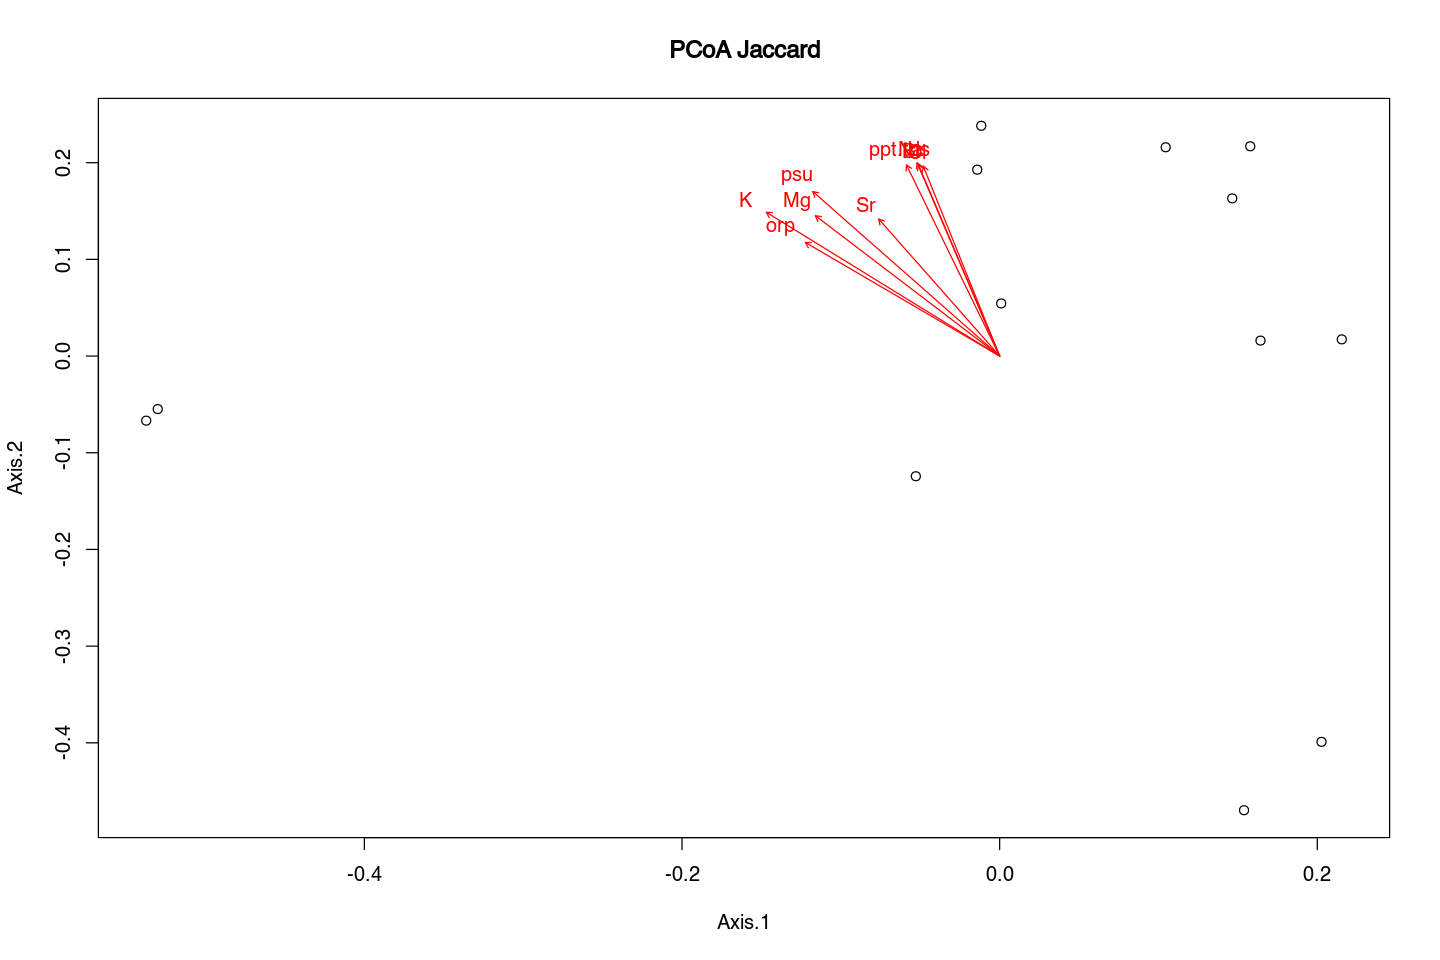

In [97]:
plot(pcoa_prok.v.Wj, main = "PCoA Jaccard")
plot(envf_Wj, p.max = 0.05, col = "red")
env_jW.adj

### Unweighted PCoA Jaccard

In [84]:
prok_pcoa_juw <- ordinate(prok_ndata_no_b,prok_dist_unjac, method = "PCoA")
evals_juw <- prok_pcoa_juw$values$Eigenvalues

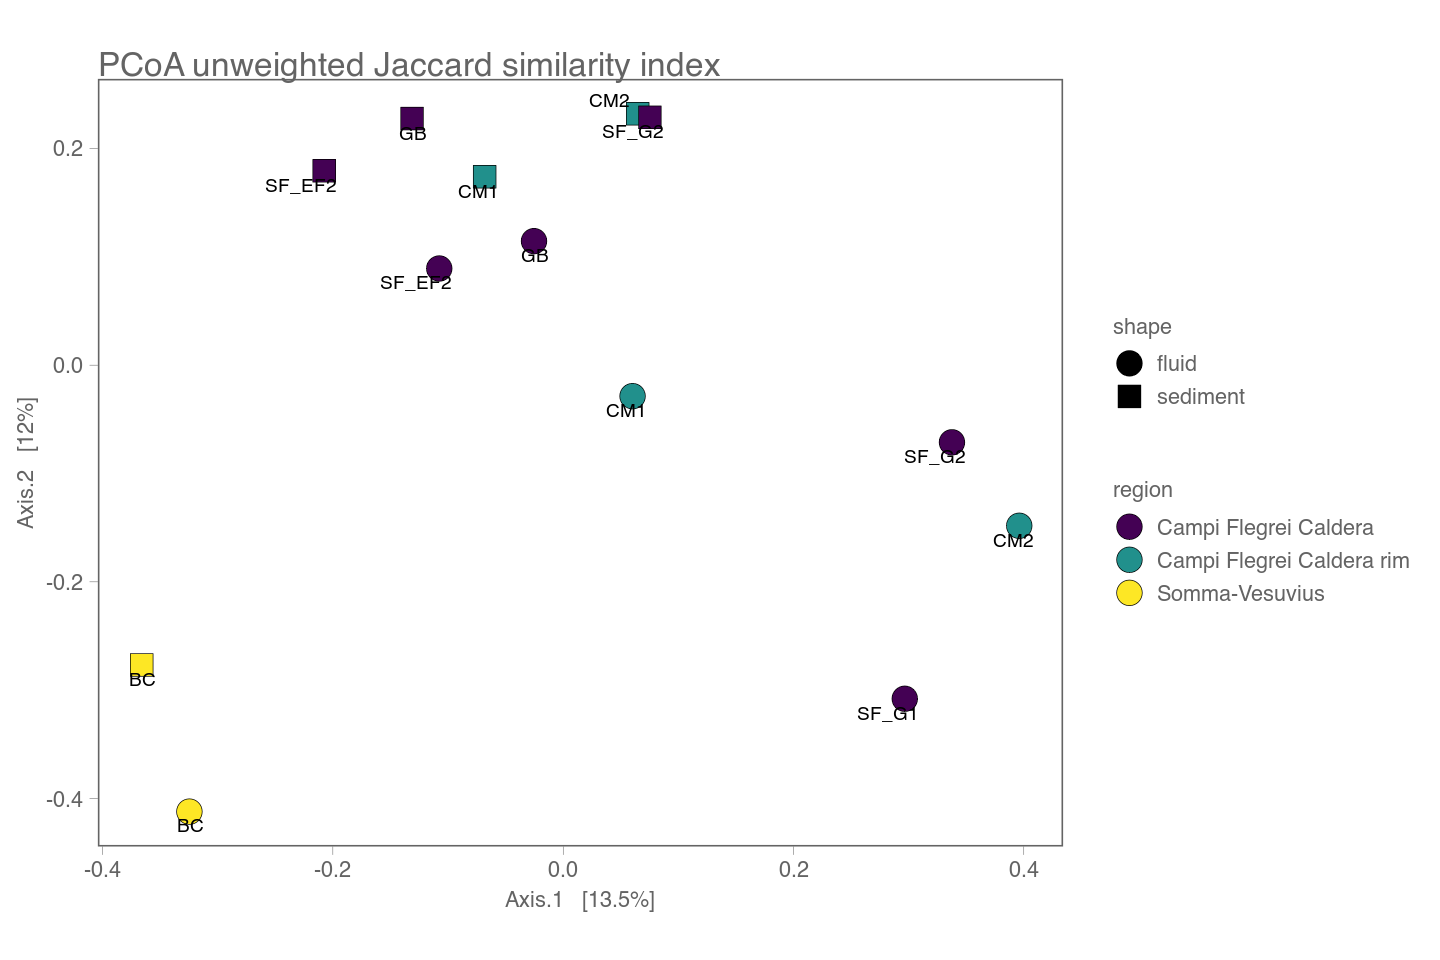

In [85]:
plot_ordination(prok_ndata_no_b, prok_pcoa_juw, type="samples", title="PCoA unweighted Jaccard similarity index") +

        coord_fixed(sqrt(evals_juw[2] / evals_juw[1]))  + 

        geom_point(aes(fill=region,shape=type),size=7,color="black",stroke=0.3) + 

        geom_text_repel(aes(label= code), size=4, hjust=1,vjust=0.4) +

        scale_fill_viridis(discrete=TRUE) + scale_shape_manual(values=c(21:23)) +

        theme_glab() + theme(legend.position = "right") +

        guides(fill = guide_legend(override.aes = list(shape = 21) ),
              shape = guide_legend(override.aes = list(fill = "black")))

In [26]:
save.image("FEAMP20_analysis.Rdata")

# ADONIS

In [62]:
write.csv(data.frame(sample_data(prok_ndata_no_b)),"env_df_adonis_final.csv")

In [63]:
env_df_adonis<-read.csv("env_df_adonis_final.csv",header=TRUE,sep=",",row.names=1)
env_df_adonis

code   location       type     region                    lat      long    
1  CM1    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
16 CM1    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
11 CM2    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
13 CM2    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
17 GB     Gulf of Naples fluid    Campi Flegrei Caldera     40.82375 14.07890
F  GB     Gulf of Naples sediment Campi Flegrei Caldera     40.82375 14.07890
10 SF_EF2 Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
18 SF_EF2 Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
14 SF_G1  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
12 SF_G2  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
9  SF_G2  Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
15 BC     Gulf of Naples fluid    Somma-Vesuvius            40.68858 14.45475
A  BC     Gulf of Naples sediment Somma-Vesuvius            40.68858 14.45475
   depth temp psu   do   ⋯ Mg      Ca     Mn       Fe        Zn       As      
1   7.0  26.3 27.54 55.0 ⋯ 1125.29 590.81 0.061217  0.113124 0.456657 0.021972
16  7.0  26.3 27.54 55.0 ⋯ 1125.29 590.81 0.061217  0.113124 0.456657 0.021972
11  8.3  27.0 38.37 92.0 ⋯ 1174.52 557.06 0.003700  0.011037 0.033080 0.020202
13  8.3  27.0 38.37 92.0 ⋯ 1174.52 557.06 0.003700  0.011037 0.033080 0.020202
17  5.4  28.0 35.41 43.0 ⋯ 1372.12 443.86 3.099014 11.123430 0.170947 0.512667
F   5.4  28.0 35.41 43.0 ⋯ 1372.12 443.86 3.099014 11.123430 0.170947 0.512667
10 10.0  34.0 26.50 75.0 ⋯  865.24 450.90 0.007141  0.033976 0.023478 0.010740
18 10.0  34.0 26.50 75.0 ⋯  865.24 450.90 0.007141  0.033976 0.023478 0.010740
14 13.3  71.0 34.06 50.8 ⋯ 1218.43 481.86 1.183603  3.590772 0.186116 1.908748
12 12.9  68.9 34.50 51.8 ⋯ 1774.17 565.06 1.131211  3.361098 0.047900 2.446793
9  12.9  68.9 34.50 51.8 ⋯ 1774.17 565.06 1.131211  3.361098 0.047900 2.446793
15  0.2  26.4 17.65 53.7 ⋯  650.57 497.79 0.047346  0.097862 0.193533 0.011163
A   0.2  26.4 17.65 53.7 ⋯  650.57 497.79 0.047346  0.097862 0.193533 0.011163
   Rb       Sr        Mo       Cs      
1  0.157602 11.402800 0.010804 0.002033
16 0.157602 11.402800 0.010804 0.002033
11 0.147709 10.231950 0.011593 0.005425
13 0.147709 10.231950 0.011593 0.005425
17 3.237141 11.487620 0.000985 0.170143
F  3.237141 11.487620 0.000985 0.170143
10 0.145538 10.712230 0.011988 0.004302
18 0.145538 10.712230 0.011988 0.004302
14 2.430386 13.262330 0.001486 1.729868
12 2.424394 13.074010 0.002394 1.645036
9  2.424394 13.074010 0.002394 1.645036
15 0.120608  8.110929 0.000000 0.006474
A  0.120608  8.110929 0.000000 0.006474

In [64]:
adn <- adonis(prok_dist_unjac~region, 
    data = env_df_adonis, na.action = FALSE, perm = 9999)
adn

'adonis' will be deprecated: use 'adonis2' instead



$aov.tab
Permutation: free
Number of permutations: 9999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model     R2 Pr(>F)   
region     2    1.0772 0.53860  1.3444 0.2119 0.0057 **
Residuals 10    4.0064 0.40064         0.7881          
Total     12    5.0836                 1.0000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$call
adonis(formula = prok_dist_unjac ~ region, data = env_df_adonis, 
    permutations = 9999, na.action = FALSE)

$coefficients
NULL

$coef.sites
                   [,1]        [,2]        [,3]        [,4]       [,5]
(Intercept)  0.81876010  0.82306497  0.84358208  0.85049051  0.8958361
region1      0.08629237  0.08549218  0.07187734  0.05729676 -0.1092854
region2     -0.18175472 -0.18272200 -0.17935298 -0.17487855  0.0409969
                   [,6]        [,7]        [,8]        [,9]       [,10]
(Intercept)  0.88791516  0.86734354  0.85943724  0.91857198  0.87483683
region1     -0.09576135 -0.09397

In [86]:
adn <- adonis(prok_dist_wjac~region, 
    data = env_df_adonis, na.action = FALSE, perm = 9999)
adn

'adonis' will be deprecated: use 'adonis2' instead



$aov.tab
Permutation: free
Number of permutations: 9999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)  
region     2    1.0915 0.54576  1.2194 0.19606 0.0352 *
Residuals 10    4.4757 0.44757         0.80394         
Total     12    5.5673                 1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$call
adonis(formula = prok_dist_wjac ~ region, data = env_df_adonis, 
    permutations = 9999, na.action = FALSE)

$coefficients
NULL

$coef.sites
                   [,1]        [,2]        [,3]       [,4]        [,5]
(Intercept)  0.86815583  0.88322425  0.88045540  0.8798194  0.92832569
region1      0.08579288  0.08943152  0.07495976  0.0463553 -0.11080273
region2     -0.18863039 -0.18475694 -0.18162234 -0.1610053  0.04837834
                   [,6]        [,7]        [,8]        [,9]       [,10]
(Intercept)  0.92440686  0.90948016  0.91520772  0.94674674  0.89910420
region1     -0.10182200 -0.095739

## Plot the map figure

In [31]:
save.image("FEAMP20_analysis_Barosa_et_al_2024.Rdata")

In [1]:
load("FEAMP20_analysis_Barosa_et_al_2024.Rdata")

In [50]:
library("ggnewscale")
library("scico")
library("marmap")

Registered S3 methods overwritten by 'adehabitatMA':
  method                       from
  print.SpatialPixelsDataFrame sp  
  print.SpatialPixels          sp  


Attaching package: ‘marmap’


The following object is masked from ‘package:grDevices’:

    as.raster




In [1]:
getNOAA.bathy(lon1=13.8,lon2=14.6,lat1=40.5,lat2=40.9, res = 10, keep = TRUE) -> a
plot(a, image=TRUE, deep=-6000, shallow=0, step=1000, lwd=2)

ERROR: Error in getNOAA.bathy(lon1 = 13.8, lon2 = 14.6, lat1 = 40.5, lat2 = 40.9, : could not find function "getNOAA.bathy"


In [54]:
lit_points <- read.csv("geological map/feamp20_literature.csv",header=T, sep=",")
points <- as.data.frame(unique(lit_points))

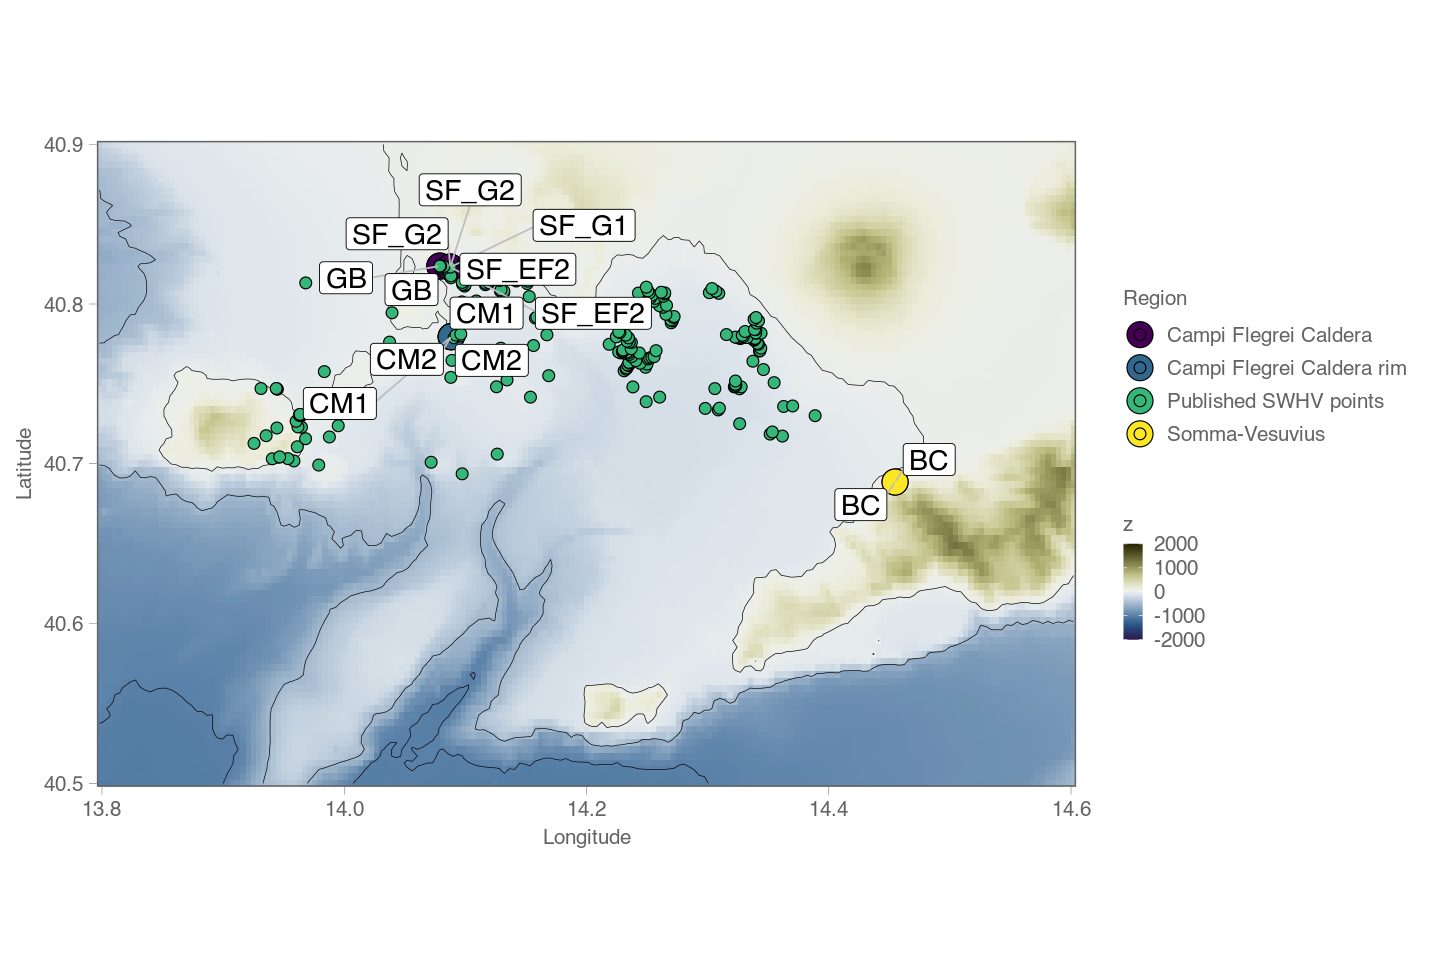

In [91]:
ggplot(a, aes(x=x, y=y)) +
  coord_quickmap() +
  geom_raster(aes(fill=z)) +
  scale_fill_scico(palette = "broc", limits = c(-2000, 2000)) +

  geom_contour(aes(z=z),
               breaks=c(0, -500, -1000, -2000, -10000), colour="grey3", size=0.2) +
  scale_x_continuous(expand=c(0,0)) +
  scale_y_continuous(expand=c(0,0)) +

  new_scale_fill() +
  geom_point(data = sample_data(prok_ndata_no_b), aes(y=lat, x=long, fill=region), shape = 21, size = 7) +
  guides(color = guide_legend(override.aes = list(size = 8))) +
  scale_fill_viridis(discrete=TRUE) +

  geom_point(data = points, aes(y=lat, x=long, fill="Published SWHV points"), shape = 21, size =3) +

  geom_label_repel(data = sample_data(prok_ndata_no_b), size = 6, segment.color ="grey",
               aes(x = long, y = lat, label = code), max.overlaps = 30) +

  labs(title = "",
       fill = "Region",
       x = "Longitude",
       y = "Latitude",
       z="Elevation (m)") +

theme_glab(base_size = 19)

ggsave("Figure_1A-map_revised_2.svg", width = 12, height = 8)

 ## Supplementary figure 1 -Inspecting the covariance among the envioronmental variables

In [6]:
library(corrplot)
library(RColorBrewer)
library(magrittr)

corrplot 0.92 loaded


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [84]:
env_pca<-read.csv("env_df_adonis_final.csv",header=TRUE,sep=",",row.names=1)
env_pca

code   location       type     region                    lat      long    
1  CM1    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
16 CM1    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
11 CM2    Gulf of Naples sediment Campi Flegrei Caldera rim 40.77955 14.08835
13 CM2    Gulf of Naples fluid    Campi Flegrei Caldera rim 40.77955 14.08835
17 GB     Gulf of Naples fluid    Campi Flegrei Caldera     40.82375 14.07890
F  GB     Gulf of Naples sediment Campi Flegrei Caldera     40.82375 14.07890
10 SF_EF2 Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
18 SF_EF2 Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
14 SF_G1  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
12 SF_G2  Gulf of Naples fluid    Campi Flegrei Caldera     40.82306 14.08750
9  SF_G2  Gulf of Naples sediment Campi Flegrei Caldera     40.82306 14.08750
15 BC     Gulf of Naples fluid    Somma-Vesuvius            40.68858 14.45475
A  BC     Gulf of Naples sediment Somma-Vesuvius            40.68858 14.45475
   depth temp psu   do   ⋯ Mg      Ca     Mn       Fe        Zn       As      
1   7.0  26.3 27.54 55.0 ⋯ 1125.29 590.81 0.061217  0.113124 0.456657 0.021972
16  7.0  26.3 27.54 55.0 ⋯ 1125.29 590.81 0.061217  0.113124 0.456657 0.021972
11  8.3  27.0 38.37 92.0 ⋯ 1174.52 557.06 0.003700  0.011037 0.033080 0.020202
13  8.3  27.0 38.37 92.0 ⋯ 1174.52 557.06 0.003700  0.011037 0.033080 0.020202
17  5.4  28.0 35.41 43.0 ⋯ 1372.12 443.86 3.099014 11.123430 0.170947 0.512667
F   5.4  28.0 35.41 43.0 ⋯ 1372.12 443.86 3.099014 11.123430 0.170947 0.512667
10 10.0  34.0 26.50 75.0 ⋯  865.24 450.90 0.007141  0.033976 0.023478 0.010740
18 10.0  34.0 26.50 75.0 ⋯  865.24 450.90 0.007141  0.033976 0.023478 0.010740
14 13.3  71.0 34.06 50.8 ⋯ 1218.43 481.86 1.183603  3.590772 0.186116 1.908748
12 12.9  68.9 34.50 51.8 ⋯ 1774.17 565.06 1.131211  3.361098 0.047900 2.446793
9  12.9  68.9 34.50 51.8 ⋯ 1774.17 565.06 1.131211  3.361098 0.047900 2.446793
15  0.2  26.4 17.65 53.7 ⋯  650.57 497.79 0.047346  0.097862 0.193533 0.011163
A   0.2  26.4 17.65 53.7 ⋯  650.57 497.79 0.047346  0.097862 0.193533 0.011163
   Rb       Sr        Mo       Cs      
1  0.157602 11.402800 0.010804 0.002033
16 0.157602 11.402800 0.010804 0.002033
11 0.147709 10.231950 0.011593 0.005425
13 0.147709 10.231950 0.011593 0.005425
17 3.237141 11.487620 0.000985 0.170143
F  3.237141 11.487620 0.000985 0.170143
10 0.145538 10.712230 0.011988 0.004302
18 0.145538 10.712230 0.011988 0.004302
14 2.430386 13.262330 0.001486 1.729868
12 2.424394 13.074010 0.002394 1.645036
9  2.424394 13.074010 0.002394 1.645036
15 0.120608  8.110929 0.000000 0.006474
A  0.120608  8.110929 0.000000 0.006474

In [104]:
env_pca<-read.csv("env_for_pca.csv",header=TRUE,sep=",",row.names=1)
env_pca <- env_pca[2:25]
summary(env_pca)

     depth             temp            psu              do       
 Min.   : 0.200   Min.   :26.30   Min.   :17.65   Min.   :43.00  
 1st Qu.: 5.400   1st Qu.:26.40   1st Qu.:26.50   1st Qu.:51.80  
 Median : 8.300   Median :28.00   Median :34.06   Median :53.70  
 Mean   : 7.762   Mean   :37.86   Mean   :30.31   Mean   :60.91  
 3rd Qu.:10.000   3rd Qu.:34.00   3rd Qu.:35.41   3rd Qu.:75.00  
 Max.   :13.300   Max.   :71.00   Max.   :38.37   Max.   :92.00  
      orp               ph             mVph          ppt.tds     
 Min.   :-226.2   Min.   :5.250   Min.   :30.50   Min.   :14.31  
 1st Qu.:-173.0   1st Qu.:5.330   1st Qu.:46.50   1st Qu.:26.10  
 Median :-145.2   Median :5.610   Median :70.00   Median :26.80  
 Mean   :-127.2   Mean   :5.752   Mean   :63.85   Mean   :25.50  
 3rd Qu.:-115.4   3rd Qu.:6.300   3rd Qu.:83.50   3rd Qu.:28.50  
 Max.   :  54.2   Max.   :6.300   Max.   :90.00   Max.   :28.76  
       Cl              Br             SO4             Na       
 Min.   :148

In [101]:
library(corrplot)

In [105]:
cor_env<-cor(env_pca)

In [122]:
svg(file = "Supplementary_figure_1.svg")

corrplot(cor_env, type = 'lower', order = 'hclust', tl.col = 'black',
         cl.ratio = 0.1, tl.srt = 45, col = c('#B35806','#E08214','#FDB863',
                                              '#FEE0B6','#D8DAEB','#B2ABD2',
                                              '#8073AC','#542788'))

dev.off()

png 
  2